In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [3]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  
year_month                                         
1950-01-01                NaN                 NaN  
1950-02-01                NaN                 NaN  
1950-03-01                NaN                 NaN  
1950-04-01                NaN                 NaN  
1950-05-01                NaN                 NaN  
...                       ...                 ...  
2019-08-01                NaN                 NaN  
2019-09-01                NaN                 NaN  
2019-10-01                NaN                 NaN  
2019-11-01                NaN                 NaN  
2019-12-01                NaN                 NaN  

[840 rows x 12 columns]

In [4]:
df['Abstraction'] = w['Usage']
df['D4N0834'] = w[' D4N0834']
df['D4N0111'] = v[' D4N0111']
df['D4N0122'] = v[' D4N0122']
df['D4N0037'] = v[' D4N0037']
df['D4N0115'] = z[' D4N0115']
df['D4N0110'] = z[' D4N0110']
df['D4N0112'] = z[' D4N0112']

In [5]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0834  D4N0111  D4N0122  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0037  D4N0115  D4N0110  D4N0112  
year_month                                      
1950-01-01      NaN      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN      NaN  
1950-05-01      NaN   

In [6]:
df = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110','D4N0112' ,'Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [7]:
df

D4N0834  D4N0111  D4N0122  D4N0037  D4N0115  D4N0110  D4N0112  \
year_month                                                                  
1950-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2019-08-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-09-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-10-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-11-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-12-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            Temperature  precip_trend  Discharge  Abstraction  
year_month                                                     
1950-01-01        23.90           NaN        NaN          NaN  
1950-02-01        25.10           NaN        NaN          NaN  
1950-03-01        23.75           NaN        NaN          NaN  
1950-04-01        19.65           NaN        NaN          NaN  
1950-05-01        14.60           NaN        NaN          NaN  
...                 ...           ...        ...          ...  
2019-08-01          NaN           NaN        NaN          NaN  
2019-09-01          NaN           NaN        NaN          NaN  
2019-10-01          NaN           NaN        NaN          NaN  
2019-11-01          NaN           NaN        NaN          NaN  
2019-12-01          NaN           NaN        NaN          NaN  

[840 rows x 11 columns]

In [8]:
f = lambda x: -x; 
gwls = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110', 'D4N0112']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [9]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0834    D4N0111    D4N0122    D4N0037    D4N0115    D4N0110    D4N0112
0 1986-09-01 1976-01-01 1975-05-01 1973-08-01 1975-05-01 1976-11-01 1977-01-01
1 2005-01-01 2009-11-01 2003-11-01 2012-02-01 2005-03-01 2000-01-01 2003-08-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [10]:

gwls = gwls[gwls.index > '1976-12-01']  
gwls = gwls[gwls.index < '2003-09-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

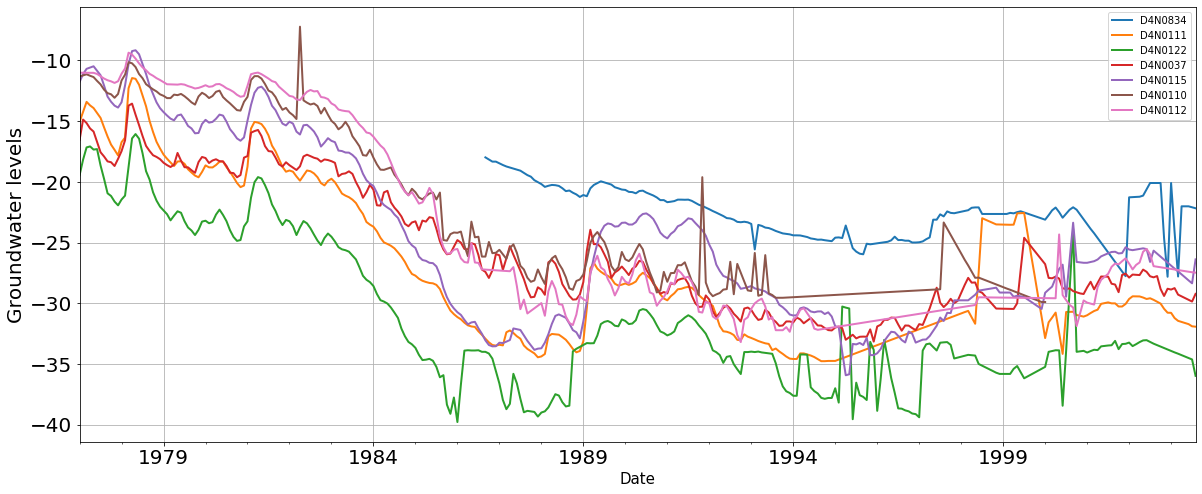

In [11]:
#visual illustration just to show all groundwater levels 

gwls.plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [12]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0834    D4N0111    D4N0122    D4N0037    D4N0115    D4N0110  \
year_month                                                                     
1977-01-01        NaN -15.070000 -19.460000 -16.560000 -11.775000 -11.330000   
1977-02-01        NaN -14.250000 -18.180000 -14.876667 -11.130000 -11.235424   
1977-03-01        NaN -13.420000 -17.170000 -15.163750 -10.700000 -11.150000   
1977-04-01        NaN -13.710000 -17.090000 -15.610000 -10.593279 -11.270000   
1977-05-01        NaN -13.930000 -17.350000 -15.865000 -10.490000 -11.380000   
...               ...        ...        ...        ...        ...        ...   
2003-04-01 -22.020000 -31.540978 -34.275808 -29.436494 -27.627096        NaN   
2003-05-01 -22.020000 -31.629022 -34.392575 -29.576111 -27.868713        NaN   
2003-06-01 -22.020000 -31.720000 -34.513234 -29.720383 -28.118383        NaN   
2003-07-01 -22.098689 -31.900000 -34.630000 -29.860000 -28.360000        NaN   
2003-08-01 -22.180000 -31.930000 -35.980000 -29.228333 -26.390000        NaN   

              D4N0112  Temperature  precip_trend  Discharge   Abstraction  
year_month                                                                 
1977-01-01 -11.020000          NaN     49.508333      1.041  4.364772e+05  
1977-02-01 -11.022583        24.40     51.341667      1.092  4.364772e+05  
1977-03-01 -11.024917        20.70     51.983333        NaN  4.364772e+05  
1977-04-01 -11.027500        19.60     48.604167        NaN  4.364772e+05  
1977-05-01 -11.030000          NaN     48.808333      1.406  4.364772e+05  
...               ...          ...           ...        ...           ...  
2003-04-01 -27.313055        19.50     37.863225      0.485  2.735368e+06  
2003-05-01 -27.358202        13.35     41.904891      0.475  2.735368e+06  
2003-06-01 -27.404853        10.25     42.054891      0.458  2.735368e+06  
2003-07-01 -27.450000        10.60     41.096558      0.438  2.735368e+06  
2003-08-01 -27.480000        11.75     42.721558      0.423  2.735368e+06  

[320 rows x 11 columns]

### Reframing length of dataset based on bhid D4N0115 start and end dates 

In [13]:
pima = gwls.filter(['D4N0112', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
#pima = pima[pima.index > '1975-04-01']  
#pima = pima[pima.index < '2005-04-01'] 

In [14]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0112          0
Temperature     13
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [15]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

In [16]:
pima.to_excel('/Users/yolanda/Downloads/BHID_D4N0112.xlsx')

#### Calculating start and end dates for new dataframa

In [17]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0112 Temperature precip_trend  Discharge Abstraction
0 1977-01-01  1977-01-01   1977-01-01 1977-01-01  1977-01-01
1 2003-08-01  2003-08-01   2003-08-01 2003-08-01  2003-08-01

### Mutual information stats

In [18]:
from sklearn.feature_selection import mutual_info_regression

In [21]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0112']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [22]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.000000
precip_trend    0.300423
Discharge       0.573776
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [23]:
precip1  = pima.filter(['D4N0112', 'precip_trend'])
discha1 = pima.filter(['D4N0112', 'Discharge'])
temp1   = pima.filter(['D4N0112', 'Temperature'])
abstr1   = pima.filter(['D4N0112', 'Abstraction'])

In [24]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip = precip1.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip1[[ 'precip_trend']].shift(t) for t in lags for col in precip1})
# disharge
discha = discha1.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha1[[ 'Discharge']].shift(t) for t in lags for col in discha1})
# temperature
temp = temp1.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp1[[ 'Temperature']].shift(t) for t in lags for col in temp1})
# abstraction
abstr = abstr1.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr1[[ 'Abstraction']].shift(t) for t in lags for col in abstr1})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

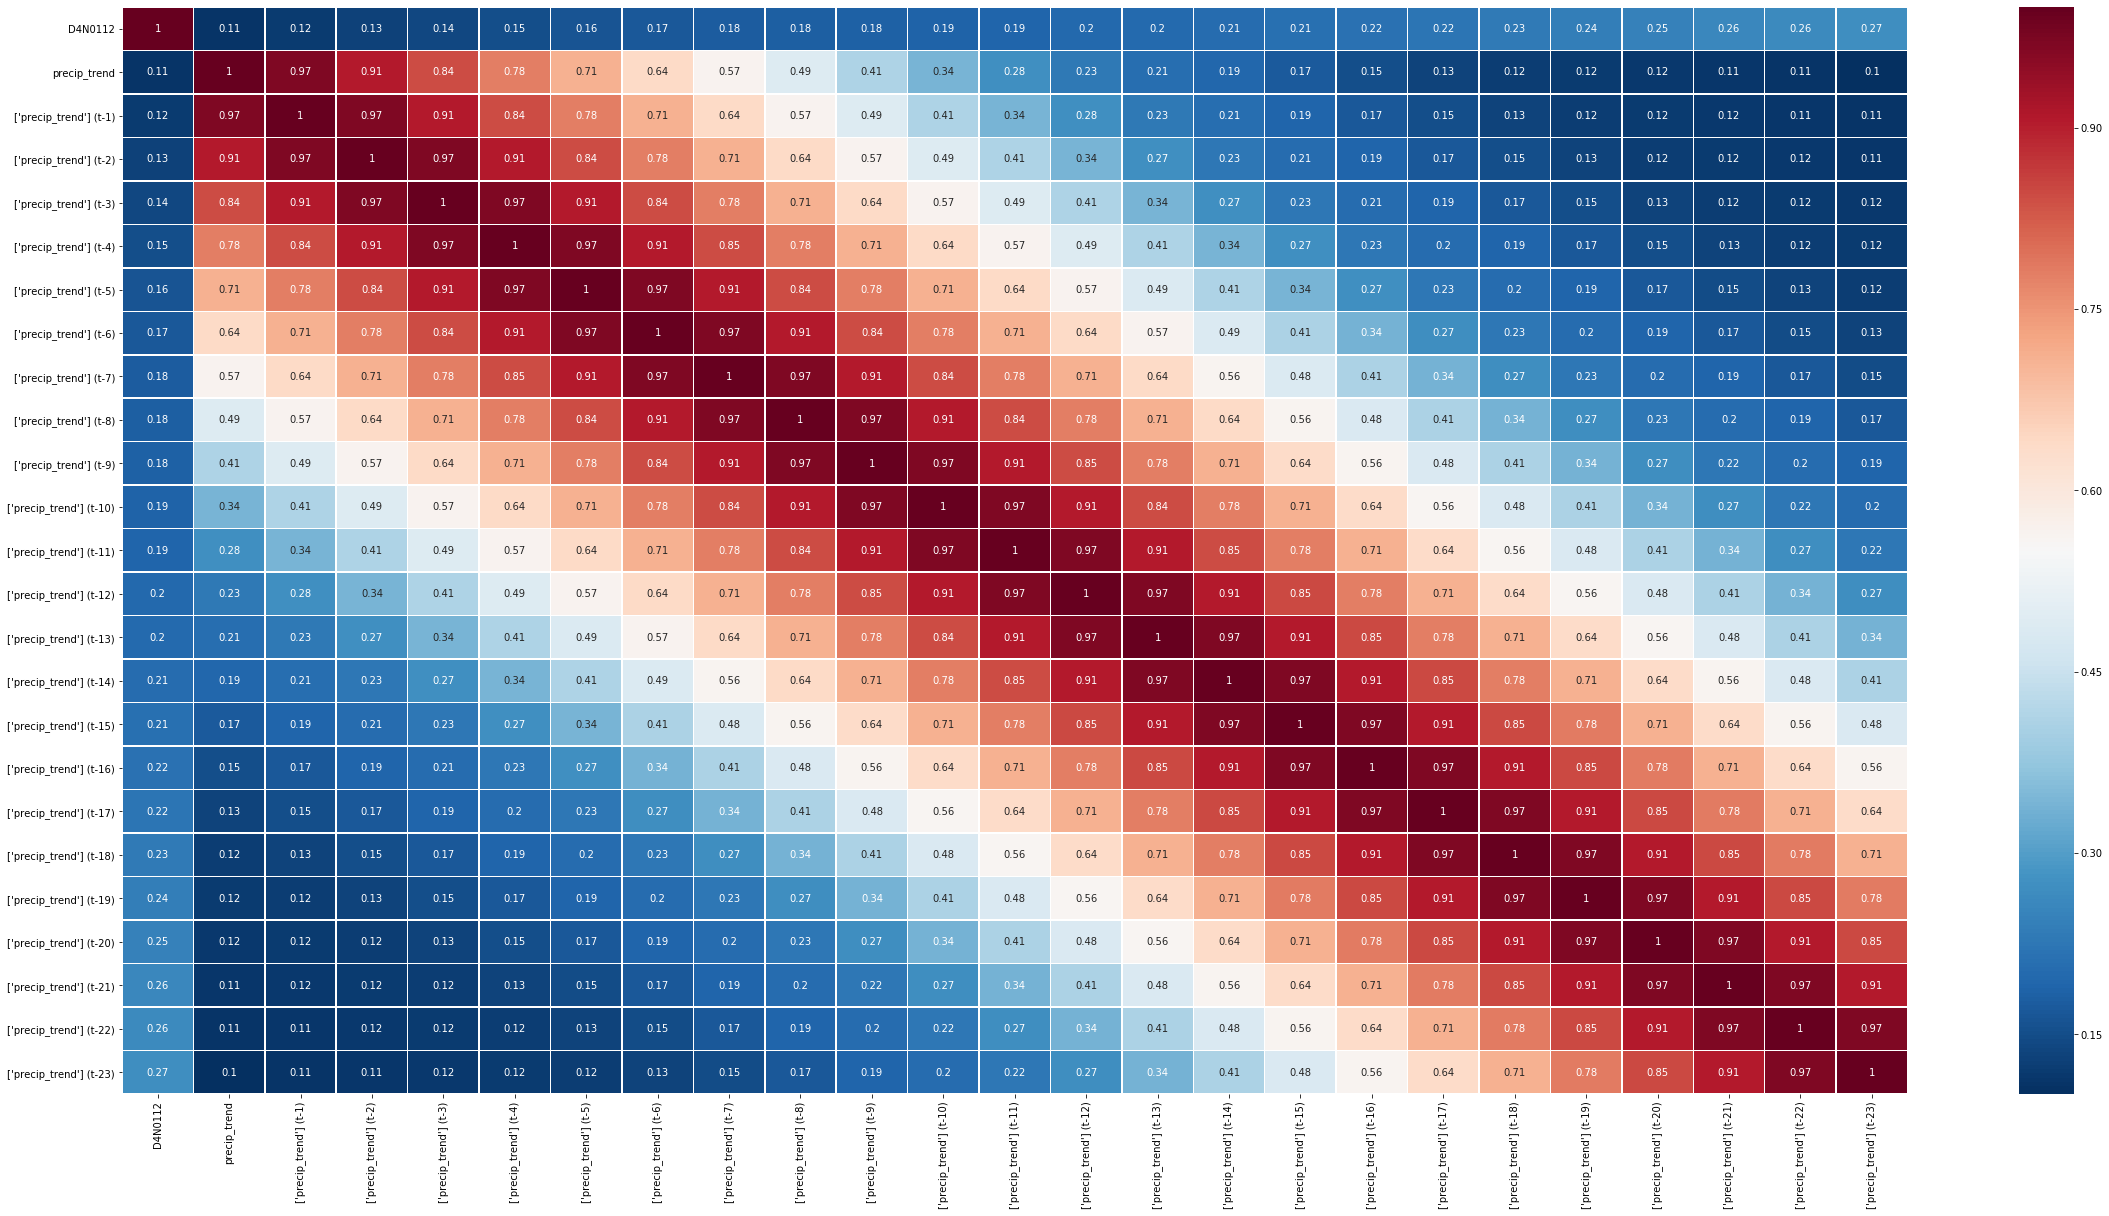

In [25]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip.corr(method = 'spearman')
corrm2 = precip.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Discharge

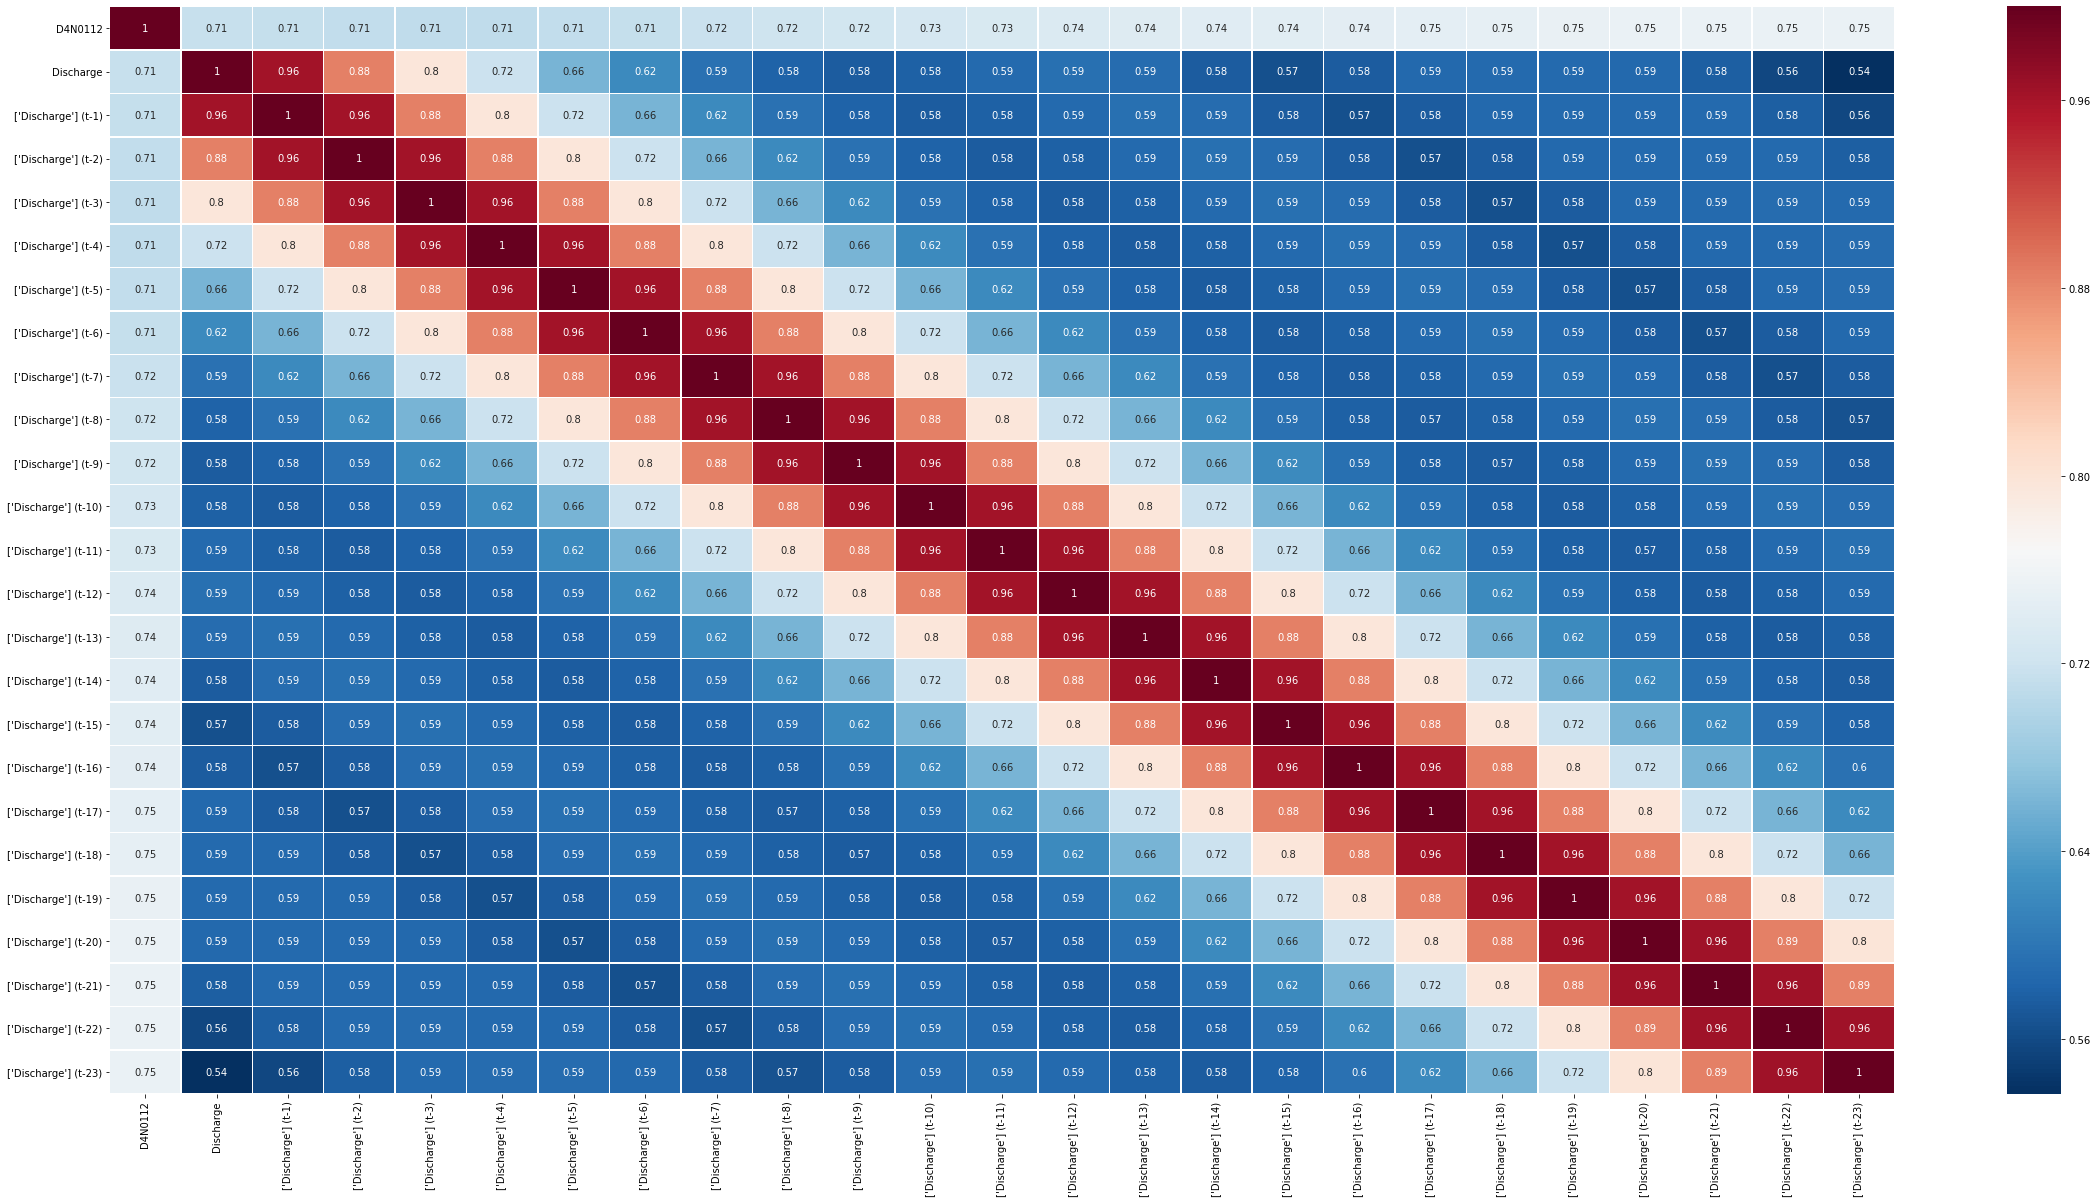

In [26]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = discha.corr(method = 'spearman')
corrm2 = discha.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

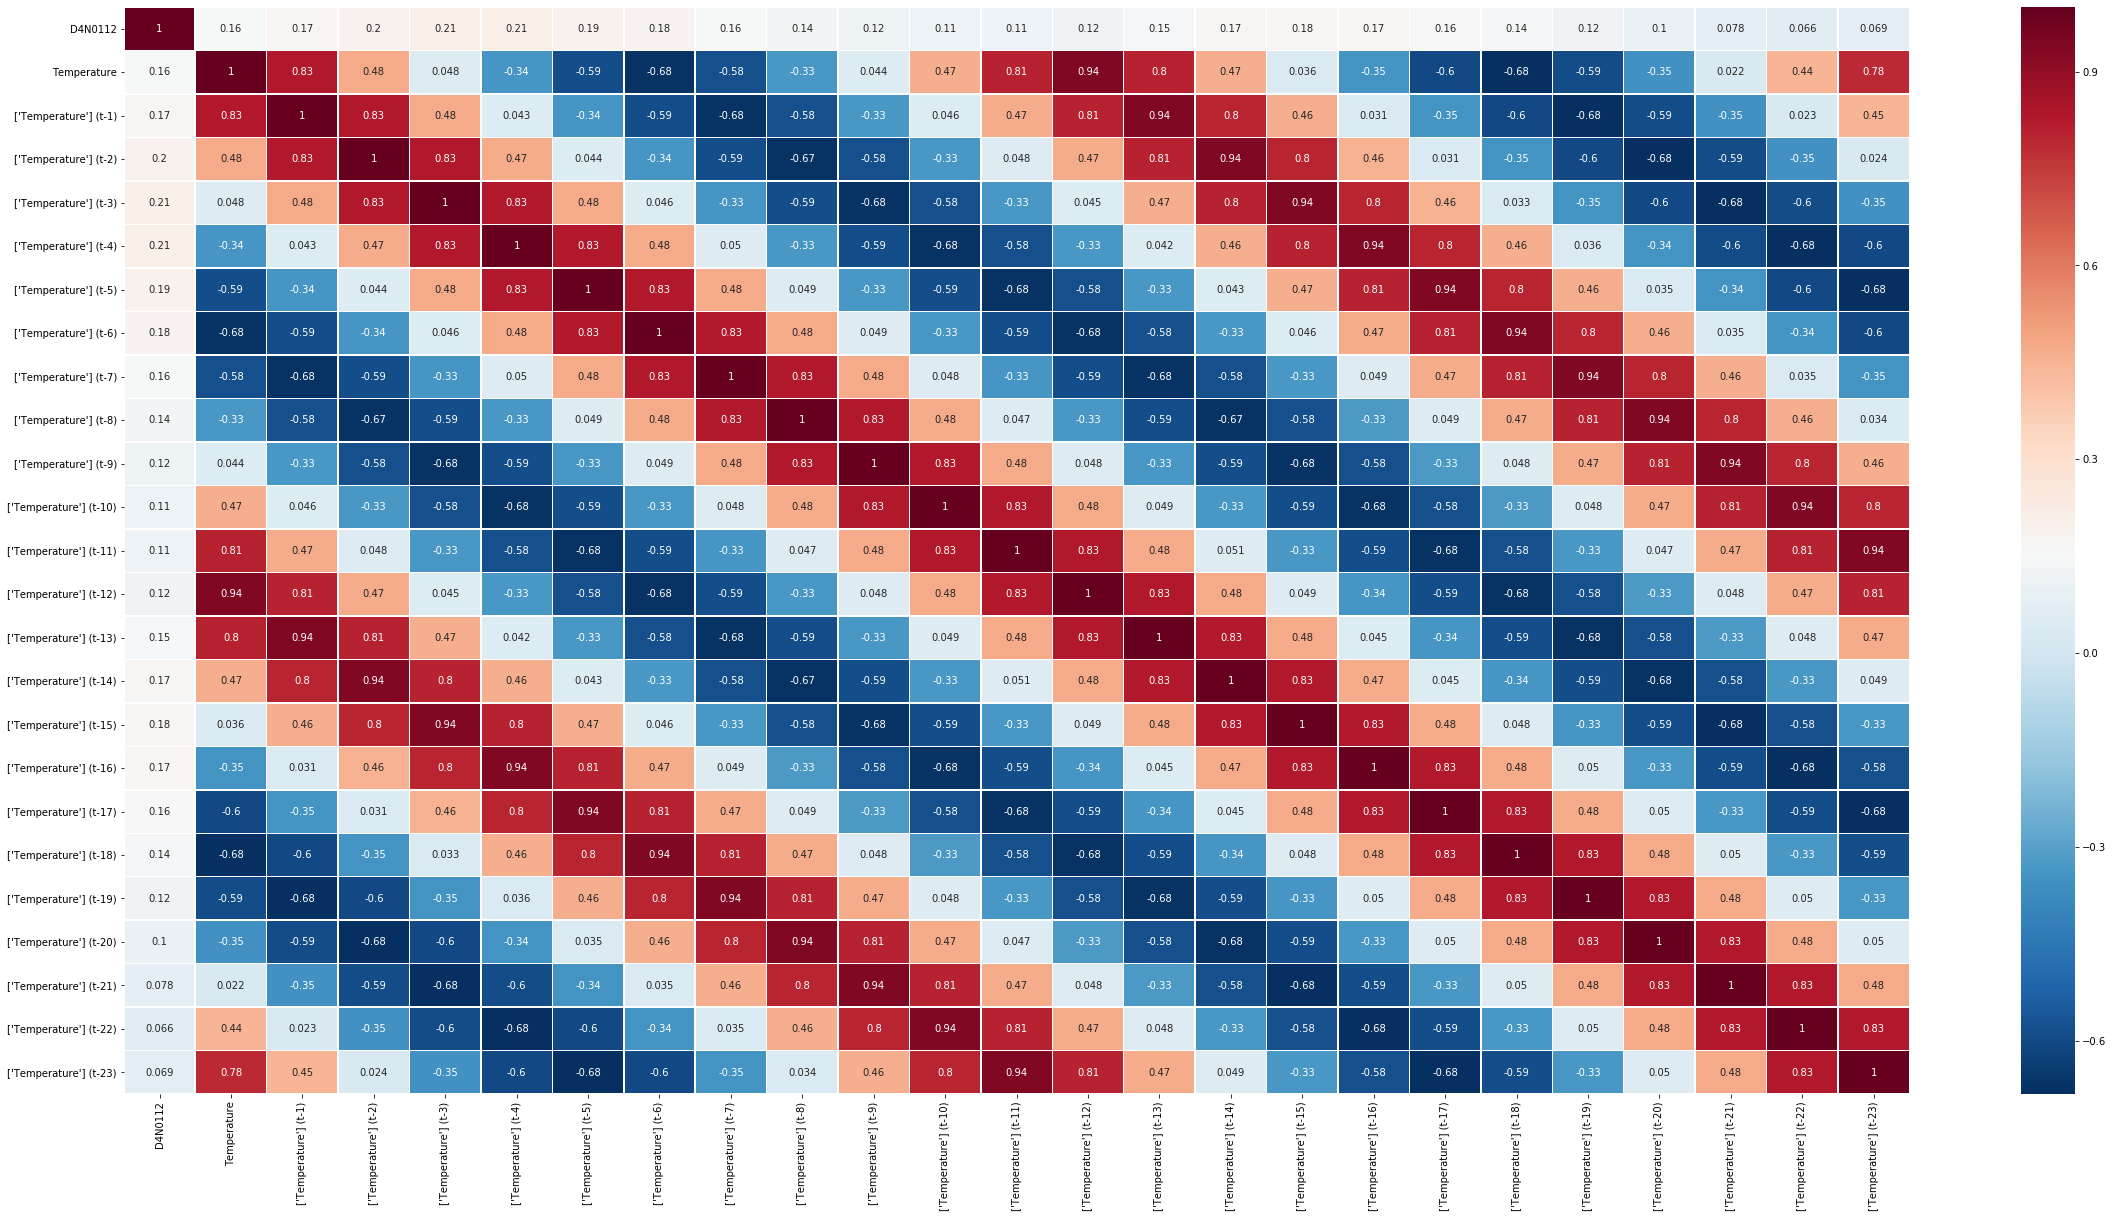

In [27]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp.corr(method = 'spearman')
corrm2 = temp.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [28]:
#pima=pima.drop(['Temperature (t-3)'], axis=1)
#pima=pima.drop(['precip_trend (t-5)'], axis=1)
#pima

In [29]:
pima['Temperature (t-3)'] = pima.Temperature.shift(0)
pima['precip_trend (t-5)'] = pima.precip_trend.shift(3)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0112  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-01-01 -11.020000    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01 -11.022583    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -11.024917    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -11.027500    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -11.030000    16.231148     48.808333   1.406000  4.364772e+05   
...               ...          ...           ...        ...           ...   
2003-04-01 -27.313055    19.500000     37.863225   0.485000  2.735368e+06   
2003-05-01 -27.358202    13.350000     41.904891   0.475000  2.735368e+06   
2003-06-01 -27.404853    10.250000     42.054891   0.458000  2.735368e+06   
2003-07-01 -27.450000    10.600000     41.096558   0.438000  2.735368e+06   
2003-08-01 -27.480000    11.750000     42.721558   0.423000  2.735368e+06   

            Temperature (t-3)  precip_trend (t-5)  
year_month                                         
1977-01-01          24.400000                 NaN  
1977-02-01          24.400000                 NaN  
1977-03-01          20.700000                 NaN  
1977-04-01          19.600000           49.508333  
1977-05-01          16.231148           51.341667  
...                       ...                 ...  
2003-04-01          19.500000           32.424909  
2003-05-01          13.350000           32.096558  
2003-06-01          10.250000           33.704891  
2003-07-01          10.600000           37.863225  
2003-08-01          11.750000           41.904891  

[320 rows x 7 columns]

In [43]:
X = pima[['Temperature (t-3)', 'precip_trend (t-5)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0112']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [44]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [45]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.000000
precip_trend (t-5)    0.302709
Discharge             0.790619
Abstraction           1.000000
dtype: float64

Text(0, 0.5, 'Groundwater levels')

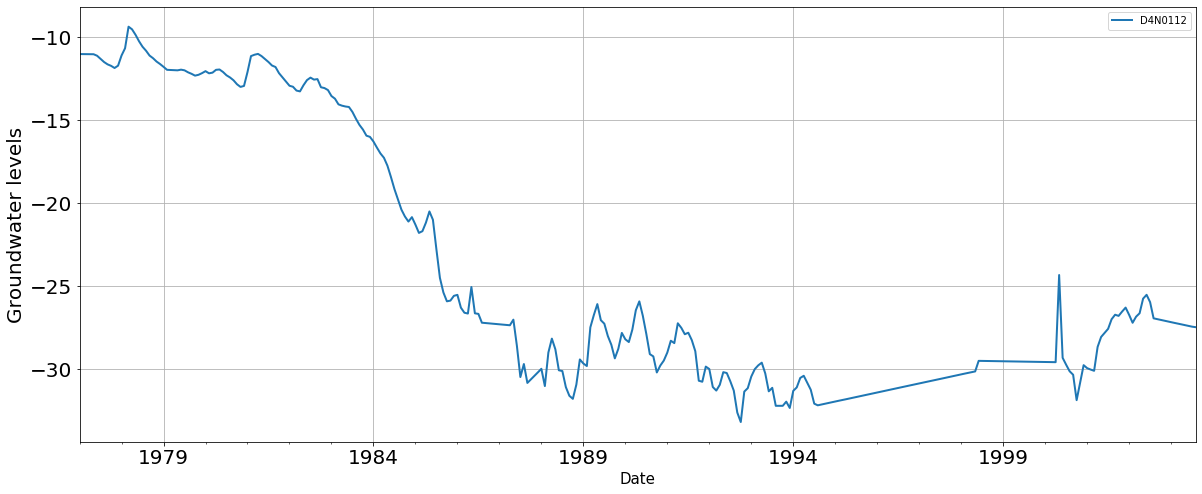

In [33]:
pima[['D4N0112']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [34]:
pima = pima[pima.index < '1994-06-01'] 

### Model Parameters

In [35]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-5)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [36]:
pima

D4N0112  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-01-01 -11.020000    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01 -11.022583    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -11.024917    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -11.027500    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -11.030000    16.231148     48.808333   1.406000  4.364772e+05   
...               ...          ...           ...        ...           ...   
1994-01-01 -31.320000    20.450000     40.490703   0.169000  1.435465e+06   
1994-02-01 -31.110000    20.150000     41.004508   0.188000  1.435465e+06   
1994-03-01 -30.540000    20.100000     37.244672   0.260000  1.435465e+06   
1994-04-01 -30.410000    17.250000     31.490505   0.363000  1.435465e+06   
1994-05-01 -30.823115    13.050000     27.482172   0.342000  1.435465e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1977-01-01          24.400000                 NaN               NaN   
1977-02-01          24.400000                 NaN               NaN   
1977-03-01          20.700000                 NaN               NaN   
1977-04-01          19.600000           49.508333          4.922138   
1977-05-01          16.231148           51.341667          4.957793   
...                       ...                 ...               ...   
1994-01-01          20.450000           39.513822          4.701643   
1994-02-01          20.150000           39.661158          4.705273   
1994-03-01          20.100000           40.043276          4.714627   
1994-04-01          17.250000           40.490703          4.725469   
1994-05-01          13.050000           41.004508          4.737777   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1977-01-01         4.234749       1.713440        13.986494  
1977-02-01         4.234749       1.738121        13.986494  
1977-03-01         4.077312       1.784261        13.986494  
1977-04-01         4.025291       1.832978        13.986494  
1977-05-01         3.846719       1.877966        13.986494  
...                     ...            ...              ...  
1994-01-01         4.065725       1.156149        15.177000  
1994-02-01         4.051640       1.172271        15.177000  
1994-03-01         4.049273       1.231112        15.177000  
1994-04-01         3.904165       1.309688        15.177000  
1994-05-01         3.642622       1.294161        15.177000  

[209 rows x 11 columns]

In [37]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0112.shift(obs)
pima.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [38]:
pima

D4N0112  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-01-01 -11.020000    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01 -11.022583    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -11.024917    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -11.027500    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -11.030000    16.231148     48.808333   1.406000  4.364772e+05   
...               ...          ...           ...        ...           ...   
1994-01-01 -31.320000    20.450000     40.490703   0.169000  1.435465e+06   
1994-02-01 -31.110000    20.150000     41.004508   0.188000  1.435465e+06   
1994-03-01 -30.540000    20.100000     37.244672   0.260000  1.435465e+06   
1994-04-01 -30.410000    17.250000     31.490505   0.363000  1.435465e+06   
1994-05-01 -30.823115    13.050000     27.482172   0.342000  1.435465e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1977-01-01          24.400000            0.000000          0.000000   
1977-02-01          24.400000            0.000000          0.000000   
1977-03-01          20.700000            0.000000          0.000000   
1977-04-01          19.600000           49.508333          4.922138   
1977-05-01          16.231148           51.341667          4.957793   
...                       ...                 ...               ...   
1994-01-01          20.450000           39.513822          4.701643   
1994-02-01          20.150000           39.661158          4.705273   
1994-03-01          20.100000           40.043276          4.714627   
1994-04-01          17.250000           40.490703          4.725469   
1994-05-01          13.050000           41.004508          4.737777   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1977-01-01         4.234749       1.713440        13.986494   0.000000   
1977-02-01         4.234749       1.738121        13.986494 -11.020000   
1977-03-01         4.077312       1.784261        13.986494 -11.022583   
1977-04-01         4.025291       1.832978        13.986494 -11.024917   
1977-05-01         3.846719       1.877966        13.986494 -11.027500   
...                     ...            ...              ...        ...   
1994-01-01         4.065725       1.156149        15.177000 -32.350000   
1994-02-01         4.051640       1.172271        15.177000 -31.320000   
1994-03-01         4.049273       1.231112        15.177000 -31.110000   
1994-04-01         3.904165       1.309688        15.177000 -30.540000   
1994-05-01         3.642622       1.294161        15.177000 -30.410000   

                  t_2        t_3    t_4  
year_month                               
1977-01-01   0.000000   0.000000   0.00  
1977-02-01   0.000000   0.000000   0.00  
1977-03-01 -11.020000   0.000000   0.00  
1977-04-01 -11.022583 -11.020000   0.00  
1977-05-01 -11.024917 -11.022583 -11.02  
...               ...        ...    ...  
1994-01-01 -31.970000 -32.220000 -32.22  
1994-02-01 -32.350000 -31.970000 -32.22  
1994-03-01 -31.320000 -32.350000 -31.97  
1994-04-01 -31.110000 -31.320000 -32.35  
1994-05-01 -30.540000 -31.110000 -31.32  

[209 rows x 15 columns]

In [39]:
pima.shape

(209, 15)

In [46]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0112']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [47]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0112']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.000000
precip_trend_log    0.238210
Discharge_log       0.554035
Abstraction_log     0.694429
t_1                 1.000000
t_2                 0.789005
dtype: float64

In [48]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0112'].values
y = y.reshape(-1,1)

In [49]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(175, 6) (175, 1)
(34, 6) (34, 1)


In [50]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [51]:
y_test[0]

array([-0.834686])

### LSTM

In [56]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [57]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(34, 6)

    #running function
    gwl = -0.834686
    test_forecast = X_test
    steps_ahead = 34
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(175, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 175 samples, validate on 34 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/175 [===============>..............] - ETA: 1s - loss: 0.8250 - mean_squared_error: 0.8250
Epoch 00001: val_loss improved from inf to 1.12078, saving model to model.h5
175/175 [==============================] - 2s 14ms/sample - loss: 0.8017 - mean_squared_error: 0.8017 - val_loss: 1.1208 - val_mean_squared_error: 1.1208
Epoch 2/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.6810 - mean_squared_error: 0.6810
Epoch 00002: val_loss improved from 1.12078 to 1.05148, saving model to model.h5
175/175 [==============================] - 0s 338us/sample - loss: 0.6920 - mean_squared_error: 0.6920 - val_loss: 1.0515 - val_mean_squared_error: 1.0515
Epoch 3/1000
 96/175 [==============

175/175 [==============================] - 0s 439us/sample - loss: 0.1270 - mean_squared_error: 0.1270 - val_loss: 0.3172 - val_mean_squared_error: 0.3172
Epoch 23/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 00023: val_loss improved from 0.31723 to 0.28740, saving model to model.h5
175/175 [==============================] - 0s 322us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.2874 - val_mean_squared_error: 0.2874
Epoch 24/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 00024: val_loss improved from 0.28740 to 0.25967, saving model to model.h5
175/175 [==============================] - 0s 268us/sample - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.2597 - val_mean_squared_error: 0.2597
Epoch 25/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0946 - mean_squared_error: 0.0946
Epoch 00025: val_loss improved from 0.25967 to

 96/175 [===============>..............] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00046: val_loss improved from 0.01859 to 0.01806, saving model to model.h5
175/175 [==============================] - 0s 462us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 47/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00047: val_loss improved from 0.01806 to 0.01731, saving model to model.h5
175/175 [==============================] - 0s 348us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 48/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00048: val_loss did not improve from 0.01731
175/175 [==============================] - 0s 133us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 49/

Epoch 71/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00071: val_loss did not improve from 0.01419
175/175 [==============================] - 0s 192us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 72/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00072: val_loss did not improve from 0.01419
175/175 [==============================] - 0s 172us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 73/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00073: val_loss improved from 0.01419 to 0.01402, saving model to model.h5
175/175 [==============================] - 0s 382us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 74/1000
 96/175 [==

Epoch 96/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00096: val_loss did not improve from 0.01283
175/175 [==============================] - 0s 170us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 97/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00097: val_loss did not improve from 0.01283
175/175 [==============================] - 0s 172us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 98/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00098: val_loss improved from 0.01283 to 0.01266, saving model to model.h5
175/175 [==============================] - 0s 253us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 99/1000
 96/175 [==

Epoch 121/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00121: val_loss improved from 0.01165 to 0.01160, saving model to model.h5
175/175 [==============================] - 0s 531us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 122/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00122: val_loss improved from 0.01160 to 0.01154, saving model to model.h5
175/175 [==============================] - 0s 447us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 123/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00123: val_loss did not improve from 0.01154
175/175 [==============================] - 0s 172us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0116 - val_mean_squared_error:

175/175 [==============================] - 0s 229us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 146/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00146: val_loss improved from 0.01088 to 0.01073, saving model to model.h5
175/175 [==============================] - 0s 225us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 147/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00147: val_loss did not improve from 0.01073
175/175 [==============================] - 0s 176us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 148/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00148: val_loss improved from 0.01073 to 0.01068, saving model to m

 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00170: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 121us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 171/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00171: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 414us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 172/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00172: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 177us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 173/1000
 96/175 [===============>..............] - ETA: 0s -

 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00195: val_loss did not improve from 0.00957
175/175 [==============================] - 0s 139us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 196/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00196: val_loss did not improve from 0.00957
175/175 [==============================] - 0s 137us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 197/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00197: val_loss did not improve from 0.00957
175/175 [==============================] - 0s 128us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 198/1000
 96/175 [===============>..............] - ETA: 0s -

Epoch 221/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00221: val_loss improved from 0.00943 to 0.00936, saving model to model.h5
175/175 [==============================] - 0s 497us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 222/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00222: val_loss improved from 0.00936 to 0.00912, saving model to model.h5
175/175 [==============================] - 0s 235us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 223/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00223: val_loss did not improve from 0.00912
175/175 [==============================] - 0s 107us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0102 - val_mean_squared_error:

Epoch 247/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00247: val_loss did not improve from 0.00881
175/175 [==============================] - 0s 132us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 248/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00248: val_loss did not improve from 0.00881
175/175 [==============================] - 0s 160us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 249/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00249: val_loss did not improve from 0.00881
175/175 [==============================] - 0s 214us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 250/1000
 96/175 [===============>............

Epoch 273/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00273: val_loss did not improve from 0.00870
175/175 [==============================] - 0s 146us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 274/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00274: val_loss did not improve from 0.00870
175/175 [==============================] - 0s 141us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 275/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00275: val_loss did not improve from 0.00870
175/175 [==============================] - 0s 164us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 276/1000
 96/175 [===============>............

Epoch 299/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00299: val_loss did not improve from 0.00870
175/175 [==============================] - 0s 131us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 300/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00300: val_loss did not improve from 0.00870
175/175 [==============================] - 0s 137us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 301/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00301: val_loss did not improve from 0.00870
175/175 [==============================] - 0s 134us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 302/1000
 96/175 [===============>............

Epoch 325/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00325: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 142us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 326/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00326: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 126us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 327/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00327: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 228us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 328/1000
 96/175 [===============>............

Epoch 351/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00351: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 212us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 352/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00352: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 279us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 353/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00353: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 363us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 354/1000
 96/175 [===============>............

Epoch 377/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00377: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 156us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 378/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00378: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 115us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 379/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00379: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 222us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 380/1000
 96/175 [===============>............

Epoch 403/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00403: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 125us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 404/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00404: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 144us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 405/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00405: val_loss did not improve from 0.00839
175/175 [==============================] - 0s 147us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 406/1000
 96/175 [===============>............

 96/175 [===============>..............] - ETA: 0s - loss: 0.1617 - mean_squared_error: 0.1617
Epoch 00020: val_loss improved from 0.43768 to 0.40543, saving model to model.h5
175/175 [==============================] - 0s 319us/sample - loss: 0.1641 - mean_squared_error: 0.1641 - val_loss: 0.4054 - val_mean_squared_error: 0.4054
Epoch 21/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1537 - mean_squared_error: 0.1537
Epoch 00021: val_loss improved from 0.40543 to 0.37278, saving model to model.h5
175/175 [==============================] - 0s 210us/sample - loss: 0.1500 - mean_squared_error: 0.1500 - val_loss: 0.3728 - val_mean_squared_error: 0.3728
Epoch 22/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1427 - mean_squared_error: 0.1427
Epoch 00022: val_loss improved from 0.37278 to 0.34015, saving model to model.h5
175/175 [==============================] - 0s 229us/sample - loss: 0.1374 - mean_squared_error: 0.1374 - val_loss: 0.3401 - val_mean_s

Epoch 44/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00044: val_loss improved from 0.02553 to 0.02321, saving model to model.h5
175/175 [==============================] - 0s 360us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 45/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00045: val_loss improved from 0.02321 to 0.02253, saving model to model.h5
175/175 [==============================] - 0s 257us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 46/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00046: val_loss improved from 0.02253 to 0.02133, saving model to model.h5
175/175 [==============================] - 0s 291us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.021

 96/175 [===============>..............] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00068: val_loss improved from 0.01707 to 0.01707, saving model to model.h5
175/175 [==============================] - 0s 419us/sample - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 69/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00069: val_loss improved from 0.01707 to 0.01695, saving model to model.h5
175/175 [==============================] - 0s 298us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 70/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00070: val_loss improved from 0.01695 to 0.01694, saving model to model.h5
175/175 [==============================] - 0s 273us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0169 - val_mean_s

 96/175 [===============>..............] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00092: val_loss improved from 0.01545 to 0.01532, saving model to model.h5
175/175 [==============================] - 0s 251us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 93/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00093: val_loss did not improve from 0.01532
175/175 [==============================] - 0s 153us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 94/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00094: val_loss improved from 0.01532 to 0.01518, saving model to model.h5
175/175 [==============================] - 0s 236us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 95/

Epoch 117/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00117: val_loss did not improve from 0.01400
175/175 [==============================] - 0s 196us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 118/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00118: val_loss improved from 0.01400 to 0.01384, saving model to model.h5
175/175 [==============================] - 0s 485us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 119/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00119: val_loss improved from 0.01384 to 0.01377, saving model to model.h5
175/175 [==============================] - 0s 351us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0138 - val_mean_squared_error:

175/175 [==============================] - 0s 293us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 142/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00142: val_loss improved from 0.01277 to 0.01277, saving model to model.h5
175/175 [==============================] - 0s 618us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 143/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00143: val_loss did not improve from 0.01277
175/175 [==============================] - 0s 163us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 144/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00144: val_loss did not improve from 0.01277
175/175 [=============

 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00166: val_loss improved from 0.01191 to 0.01188, saving model to model.h5
175/175 [==============================] - 0s 261us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 167/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00167: val_loss improved from 0.01188 to 0.01178, saving model to model.h5
175/175 [==============================] - 0s 262us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 168/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00168: val_loss did not improve from 0.01178
175/175 [==============================] - 0s 128us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 1

 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00191: val_loss did not improve from 0.01127
175/175 [==============================] - 0s 141us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 192/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00192: val_loss improved from 0.01127 to 0.01108, saving model to model.h5
175/175 [==============================] - 0s 218us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 193/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00193: val_loss improved from 0.01108 to 0.01108, saving model to model.h5
175/175 [==============================] - 0s 214us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1

 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00216: val_loss did not improve from 0.01045
175/175 [==============================] - 0s 171us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 217/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00217: val_loss did not improve from 0.01045
175/175 [==============================] - 0s 161us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 218/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00218: val_loss did not improve from 0.01045
175/175 [==============================] - 0s 178us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 219/1000
 96/175 [===============>..............] - ETA: 0s -

Epoch 242/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00242: val_loss did not improve from 0.00995
175/175 [==============================] - 0s 156us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 243/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00243: val_loss did not improve from 0.00995
175/175 [==============================] - 0s 174us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 244/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00244: val_loss did not improve from 0.00995
175/175 [==============================] - 0s 277us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 245/1000
 96/175 [===============>............

Epoch 268/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00268: val_loss did not improve from 0.00967
175/175 [==============================] - 0s 195us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 269/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00269: val_loss did not improve from 0.00967
175/175 [==============================] - 0s 148us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 270/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00270: val_loss did not improve from 0.00967
175/175 [==============================] - 0s 148us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 271/1000
 96/175 [===============>............

Epoch 294/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00294: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 167us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 295/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00295: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 164us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 296/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00296: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 147us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 297/1000
 96/175 [===============>............

Epoch 320/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00320: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 148us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 321/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00321: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 196us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 322/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00322: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 192us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 323/1000
 96/175 [===============>............

Epoch 346/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00346: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 140us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 347/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00347: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 123us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 348/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00348: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 143us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 349/1000
 96/175 [===============>............

Epoch 372/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00372: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 227us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 373/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00373: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 138us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 374/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00374: val_loss did not improve from 0.00914
175/175 [==============================] - 0s 147us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 375/1000
 96/175 [===============>............

 96/175 [===============>..............] - ETA: 0s - loss: 0.5077 - mean_squared_error: 0.5077
Epoch 00006: val_loss improved from 0.95859 to 0.92086, saving model to model.h5
175/175 [==============================] - 0s 359us/sample - loss: 0.5008 - mean_squared_error: 0.5008 - val_loss: 0.9209 - val_mean_squared_error: 0.9209
Epoch 7/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4831 - mean_squared_error: 0.4831
Epoch 00007: val_loss improved from 0.92086 to 0.88599, saving model to model.h5
175/175 [==============================] - 0s 283us/sample - loss: 0.4703 - mean_squared_error: 0.4703 - val_loss: 0.8860 - val_mean_squared_error: 0.8860
Epoch 8/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4315 - mean_squared_error: 0.4315
Epoch 00008: val_loss improved from 0.88599 to 0.85135, saving model to model.h5
175/175 [==============================] - 0s 267us/sample - loss: 0.4340 - mean_squared_error: 0.4340 - val_loss: 0.8513 - val_mean_squ

Epoch 30/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 00030: val_loss improved from 0.22276 to 0.19950, saving model to model.h5
175/175 [==============================] - 0s 300us/sample - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.1995 - val_mean_squared_error: 0.1995
Epoch 31/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00031: val_loss improved from 0.19950 to 0.17705, saving model to model.h5
175/175 [==============================] - 0s 397us/sample - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.1770 - val_mean_squared_error: 0.1770
Epoch 32/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0766 - mean_squared_error: 0.0766
Epoch 00032: val_loss improved from 0.17705 to 0.15569, saving model to model.h5
175/175 [==============================] - 0s 326us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.155

Epoch 54/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00054: val_loss did not improve from 0.01904
175/175 [==============================] - 0s 142us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 55/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00055: val_loss improved from 0.01904 to 0.01793, saving model to model.h5
175/175 [==============================] - 0s 223us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 56/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00056: val_loss improved from 0.01793 to 0.01763, saving model to model.h5
175/175 [==============================] - 0s 229us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0176 - val_mean_squared_error: 0.

Epoch 79/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00079: val_loss did not improve from 0.01441
175/175 [==============================] - 0s 151us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 80/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00080: val_loss improved from 0.01441 to 0.01435, saving model to model.h5
175/175 [==============================] - 0s 250us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 81/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00081: val_loss did not improve from 0.01435
175/175 [==============================] - 0s 223us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 82/1000
 96/175 [==

Epoch 104/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00104: val_loss did not improve from 0.01326
175/175 [==============================] - 0s 142us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 105/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00105: val_loss did not improve from 0.01326
175/175 [==============================] - 0s 169us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 106/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00106: val_loss did not improve from 0.01326
175/175 [==============================] - 0s 160us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 107/1000
 96/175 [===============>............

 96/175 [===============>..............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00129: val_loss did not improve from 0.01206
175/175 [==============================] - 0s 134us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 130/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00130: val_loss improved from 0.01206 to 0.01194, saving model to model.h5
175/175 [==============================] - 0s 294us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 131/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00131: val_loss improved from 0.01194 to 0.01191, saving model to model.h5
175/175 [==============================] - 0s 351us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 1

 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00154: val_loss did not improve from 0.01140
175/175 [==============================] - 0s 168us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 155/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00155: val_loss did not improve from 0.01140
175/175 [==============================] - 0s 133us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 156/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00156: val_loss did not improve from 0.01140
175/175 [==============================] - 0s 131us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 157/1000
 96/175 [===============>..............] - ETA: 0s -

 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00179: val_loss did not improve from 0.01075
175/175 [==============================] - 0s 233us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 180/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00180: val_loss did not improve from 0.01075
175/175 [==============================] - 0s 221us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 181/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00181: val_loss did not improve from 0.01075
175/175 [==============================] - 0s 237us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 182/1000
 96/175 [===============>..............] - ETA: 0s -

 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00204: val_loss did not improve from 0.01011
175/175 [==============================] - 0s 151us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 205/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00205: val_loss did not improve from 0.01011
175/175 [==============================] - 0s 221us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 206/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00206: val_loss did not improve from 0.01011
175/175 [==============================] - 0s 175us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 207/1000
 96/175 [===============>..............] - ETA: 0s -

Epoch 230/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00230: val_loss did not improve from 0.00980
175/175 [==============================] - 0s 163us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 231/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00231: val_loss did not improve from 0.00980
175/175 [==============================] - 0s 138us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 232/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00232: val_loss improved from 0.00980 to 0.00976, saving model to model.h5
175/175 [==============================] - 0s 330us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 233/1000
 96/175

Epoch 256/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00256: val_loss did not improve from 0.00972
175/175 [==============================] - 0s 151us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 257/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00257: val_loss improved from 0.00972 to 0.00939, saving model to model.h5
175/175 [==============================] - 0s 278us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 258/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00258: val_loss did not improve from 0.00939
175/175 [==============================] - 0s 147us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 259/1000
 96/175

Epoch 282/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00282: val_loss did not improve from 0.00939
175/175 [==============================] - 0s 143us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 283/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00283: val_loss did not improve from 0.00939
175/175 [==============================] - 0s 157us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 284/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00284: val_loss did not improve from 0.00939
175/175 [==============================] - 0s 173us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 285/1000
 96/175 [===============>............

Epoch 308/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00308: val_loss did not improve from 0.00939
175/175 [==============================] - 0s 250us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 309/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00309: val_loss did not improve from 0.00939
175/175 [==============================] - 0s 218us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 310/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00310: val_loss did not improve from 0.00939
175/175 [==============================] - 0s 344us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 311/1000
 96/175 [===============>............

Epoch 334/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00334: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 583us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 335/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00335: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 443us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 336/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00336: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 640us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 337/1000
 96/175 [===============>............

Epoch 360/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00360: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 210us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 361/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 00361: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 221us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 362/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00362: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 216us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 363/1000
 96/175 [===============>............

Epoch 386/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00386: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 221us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 387/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00387: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 136us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 388/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00388: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 127us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 389/1000
 96/175 [===============>............

Epoch 412/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00412: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 142us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 413/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00413: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 140us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 414/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00414: val_loss did not improve from 0.00903
175/175 [==============================] - 0s 156us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 415/1000
 96/175 [===============>............

Epoch 10/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3820 - mean_squared_error: 0.3820
Epoch 00010: val_loss improved from 0.85100 to 0.81610, saving model to model.h5
175/175 [==============================] - 0s 271us/sample - loss: 0.4136 - mean_squared_error: 0.4136 - val_loss: 0.8161 - val_mean_squared_error: 0.8161
Epoch 11/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3688 - mean_squared_error: 0.3688
Epoch 00011: val_loss improved from 0.81610 to 0.78262, saving model to model.h5
175/175 [==============================] - 0s 266us/sample - loss: 0.3832 - mean_squared_error: 0.3832 - val_loss: 0.7826 - val_mean_squared_error: 0.7826
Epoch 12/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3520 - mean_squared_error: 0.3520
Epoch 00012: val_loss improved from 0.78262 to 0.75000, saving model to model.h5
175/175 [==============================] - 0s 217us/sample - loss: 0.3569 - mean_squared_error: 0.3569 - val_loss: 0.750

Epoch 34/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00034: val_loss improved from 0.13505 to 0.11869, saving model to model.h5
175/175 [==============================] - 0s 308us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.1187 - val_mean_squared_error: 0.1187
Epoch 35/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0661 - mean_squared_error: 0.0661
Epoch 00035: val_loss improved from 0.11869 to 0.10283, saving model to model.h5
175/175 [==============================] - 0s 222us/sample - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 36/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00036: val_loss improved from 0.10283 to 0.08742, saving model to model.h5
175/175 [==============================] - 0s 228us/sample - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.087

Epoch 58/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00058: val_loss did not improve from 0.01599
175/175 [==============================] - 0s 189us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 59/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00059: val_loss did not improve from 0.01599
175/175 [==============================] - 0s 133us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 60/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00060: val_loss improved from 0.01599 to 0.01589, saving model to model.h5
175/175 [==============================] - 0s 235us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 61/1000
 96/175 [==

Epoch 83/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00083: val_loss improved from 0.01477 to 0.01469, saving model to model.h5
175/175 [==============================] - 0s 233us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 84/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00084: val_loss improved from 0.01469 to 0.01468, saving model to model.h5
175/175 [==============================] - 0s 280us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 85/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00085: val_loss improved from 0.01468 to 0.01451, saving model to model.h5
175/175 [==============================] - 0s 265us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.014

175/175 [==============================] - 0s 218us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 108/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00108: val_loss did not improve from 0.01324
175/175 [==============================] - 0s 120us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 109/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00109: val_loss improved from 0.01324 to 0.01319, saving model to model.h5
175/175 [==============================] - 0s 207us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 110/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00110: val_loss improved from 0.01319 to 0.01312, saving model to m

 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00132: val_loss did not improve from 0.01231
175/175 [==============================] - 0s 193us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 133/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00133: val_loss improved from 0.01231 to 0.01230, saving model to model.h5
175/175 [==============================] - 0s 286us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 134/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00134: val_loss did not improve from 0.01230
175/175 [==============================] - 0s 118us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 135/1000
 96/175 [=============

 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00157: val_loss did not improve from 0.01152
175/175 [==============================] - 0s 165us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 158/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00158: val_loss did not improve from 0.01152
175/175 [==============================] - 0s 152us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 159/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00159: val_loss improved from 0.01152 to 0.01140, saving model to model.h5
175/175 [==============================] - 0s 279us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 160/1000
 96/175 [=============

 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00182: val_loss did not improve from 0.01061
175/175 [==============================] - 0s 129us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 183/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00183: val_loss did not improve from 0.01061
175/175 [==============================] - 0s 145us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 184/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00184: val_loss did not improve from 0.01061
175/175 [==============================] - 0s 124us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 185/1000
 96/175 [===============>..............] - ETA: 0s -

Epoch 208/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00208: val_loss did not improve from 0.01014
175/175 [==============================] - 0s 189us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 209/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00209: val_loss did not improve from 0.01014
175/175 [==============================] - 0s 194us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 210/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00210: val_loss did not improve from 0.01014
175/175 [==============================] - 0s 115us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 211/1000
 96/175 [===============>............

Epoch 234/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00234: val_loss did not improve from 0.00974
175/175 [==============================] - 0s 125us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 235/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00235: val_loss did not improve from 0.00974
175/175 [==============================] - 0s 116us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 236/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00236: val_loss did not improve from 0.00974
175/175 [==============================] - 0s 124us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 237/1000
 96/175 [===============>............

Epoch 260/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00260: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 139us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 261/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00261: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 269us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 262/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00262: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 230us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 263/1000
 96/175 [===============>............

Epoch 286/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00286: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 135us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 287/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00287: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 110us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 288/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00288: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 129us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 289/1000
 96/175 [===============>............

Epoch 312/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00312: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 122us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 313/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00313: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 124us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 314/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00314: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 138us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 315/1000
 96/175 [===============>............

Epoch 338/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00338: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 240us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 339/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00339: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 166us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 340/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00340: val_loss did not improve from 0.00948
175/175 [==============================] - 0s 162us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 341/1000
 96/175 [===============>............

Epoch 10/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2318 - mean_squared_error: 0.2318
Epoch 00010: val_loss improved from 0.59754 to 0.56348, saving model to model.h5
175/175 [==============================] - 0s 359us/sample - loss: 0.2409 - mean_squared_error: 0.2409 - val_loss: 0.5635 - val_mean_squared_error: 0.5635
Epoch 11/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2150 - mean_squared_error: 0.2150
Epoch 00011: val_loss improved from 0.56348 to 0.52970, saving model to model.h5
175/175 [==============================] - 0s 212us/sample - loss: 0.2222 - mean_squared_error: 0.2222 - val_loss: 0.5297 - val_mean_squared_error: 0.5297
Epoch 12/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2155 - mean_squared_error: 0.2155
Epoch 00012: val_loss improved from 0.52970 to 0.49952, saving model to model.h5
175/175 [==============================] - 0s 245us/sample - loss: 0.1979 - mean_squared_error: 0.1979 - val_loss: 0.499

Epoch 34/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00034: val_loss improved from 0.04962 to 0.04389, saving model to model.h5
175/175 [==============================] - 0s 213us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 35/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00035: val_loss improved from 0.04389 to 0.04018, saving model to model.h5
175/175 [==============================] - 0s 222us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 36/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00036: val_loss improved from 0.04018 to 0.03619, saving model to model.h5
175/175 [==============================] - 0s 229us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.036

 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00058: val_loss did not improve from 0.01633
175/175 [==============================] - 0s 233us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 59/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00059: val_loss did not improve from 0.01633
175/175 [==============================] - 0s 142us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 60/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00060: val_loss improved from 0.01633 to 0.01604, saving model to model.h5
175/175 [==============================] - 0s 257us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 61/1000
 96/175 [===============>

Epoch 83/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00083: val_loss improved from 0.01425 to 0.01407, saving model to model.h5
175/175 [==============================] - 0s 231us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 84/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00084: val_loss improved from 0.01407 to 0.01402, saving model to model.h5
175/175 [==============================] - 0s 236us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 85/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00085: val_loss did not improve from 0.01402
175/175 [==============================] - 0s 159us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0141 - val_mean_squared_error: 0.

Epoch 108/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00108: val_loss improved from 0.01291 to 0.01283, saving model to model.h5
175/175 [==============================] - 0s 302us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 109/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00109: val_loss improved from 0.01283 to 0.01269, saving model to model.h5
175/175 [==============================] - 0s 229us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 110/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00110: val_loss improved from 0.01269 to 0.01265, saving model to model.h5
175/175 [==============================] - 0s 255us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.

Epoch 133/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00133: val_loss did not improve from 0.01180
175/175 [==============================] - 0s 173us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 134/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00134: val_loss improved from 0.01180 to 0.01163, saving model to model.h5
175/175 [==============================] - 0s 311us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 135/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00135: val_loss improved from 0.01163 to 0.01162, saving model to model.h5
175/175 [==============================] - 0s 496us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0116 - val_mean_squared_error:

 96/175 [===============>..............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00158: val_loss did not improve from 0.01107
175/175 [==============================] - 0s 162us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 159/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00159: val_loss did not improve from 0.01107
175/175 [==============================] - 0s 172us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 160/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00160: val_loss did not improve from 0.01107
175/175 [==============================] - 0s 163us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 161/1000
 96/175 [===============>..............] - ETA: 0s -

Epoch 184/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00184: val_loss did not improve from 0.01056
175/175 [==============================] - 0s 179us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 185/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00185: val_loss did not improve from 0.01056
175/175 [==============================] - 0s 197us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 186/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00186: val_loss did not improve from 0.01056
175/175 [==============================] - 0s 483us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 187/1000
 96/175 [===============>............

Epoch 210/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00210: val_loss did not improve from 0.01022
175/175 [==============================] - 0s 139us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 211/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00211: val_loss did not improve from 0.01022
175/175 [==============================] - 0s 194us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 212/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00212: val_loss did not improve from 0.01022
175/175 [==============================] - 0s 225us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 213/1000
 96/175 [===============>............

Epoch 236/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00236: val_loss did not improve from 0.00990
175/175 [==============================] - 0s 141us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 237/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00237: val_loss did not improve from 0.00990
175/175 [==============================] - 0s 119us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 238/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00238: val_loss did not improve from 0.00990
175/175 [==============================] - 0s 125us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 239/1000
 96/175 [===============>............

Epoch 262/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00262: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 239us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 263/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00263: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 272us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 264/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00264: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 209us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 265/1000
 96/175 [===============>............

Epoch 288/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00288: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 292us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 289/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00289: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 188us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 290/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00290: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 140us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 291/1000
 96/175 [===============>............

Epoch 314/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00314: val_loss improved from 0.00971 to 0.00969, saving model to model.h5
175/175 [==============================] - 0s 232us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 315/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00315: val_loss did not improve from 0.00969
175/175 [==============================] - 0s 129us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 316/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00316: val_loss did not improve from 0.00969
175/175 [==============================] - 0s 127us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 317/1000
 96/175

Epoch 340/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00340: val_loss did not improve from 0.00969
175/175 [==============================] - 0s 163us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 341/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00341: val_loss did not improve from 0.00969
175/175 [==============================] - 0s 115us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 342/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00342: val_loss did not improve from 0.00969
175/175 [==============================] - 0s 135us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 343/1000
 96/175 [===============>............

Epoch 366/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00366: val_loss did not improve from 0.00959
175/175 [==============================] - 0s 135us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 367/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00367: val_loss did not improve from 0.00959
175/175 [==============================] - 0s 131us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 368/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00368: val_loss did not improve from 0.00959
175/175 [==============================] - 0s 117us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 369/1000
 96/175 [===============>............

Epoch 392/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00392: val_loss did not improve from 0.00946
175/175 [==============================] - 0s 141us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 393/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00393: val_loss did not improve from 0.00946
175/175 [==============================] - 0s 135us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 394/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00394: val_loss did not improve from 0.00946
175/175 [==============================] - 0s 132us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 395/1000
 96/175 [===============>............

Epoch 418/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00418: val_loss did not improve from 0.00946
175/175 [==============================] - 0s 147us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 419/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00419: val_loss did not improve from 0.00946
175/175 [==============================] - 0s 129us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 420/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00420: val_loss did not improve from 0.00946
175/175 [==============================] - 0s 128us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 421/1000
 96/175 [===============>............

Epoch 444/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 00444: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 222us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 445/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00445: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 425us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 446/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00446: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 170us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 447/1000
 96/175 [===============>............

Epoch 470/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00470: val_loss did not improve from 0.00893
175/175 [==============================] - 0s 192us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 471/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00471: val_loss did not improve from 0.00893
175/175 [==============================] - 0s 137us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 472/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00472: val_loss did not improve from 0.00893
175/175 [==============================] - 0s 121us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 473/1000
 96/175 [===============>............

Epoch 496/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00496: val_loss did not improve from 0.00848
175/175 [==============================] - 0s 139us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 497/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00497: val_loss did not improve from 0.00848
175/175 [==============================] - 0s 140us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 498/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00498: val_loss did not improve from 0.00848
175/175 [==============================] - 0s 123us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 499/1000
 96/175 [===============>............

Epoch 522/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00522: val_loss did not improve from 0.00848
175/175 [==============================] - 0s 185us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 523/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00523: val_loss did not improve from 0.00848
175/175 [==============================] - 0s 146us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 524/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00524: val_loss did not improve from 0.00848
175/175 [==============================] - 0s 147us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 525/1000
 96/175 [===============>............

Epoch 548/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00548: val_loss did not improve from 0.00848
175/175 [==============================] - 0s 140us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 549/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00549: val_loss did not improve from 0.00848
175/175 [==============================] - 0s 123us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 550/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00550: val_loss did not improve from 0.00848
175/175 [==============================] - 0s 181us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 551/1000
 96/175 [===============>............

Epoch 574/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00574: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 199us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 575/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00575: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 153us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 576/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00576: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 139us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 577/1000
 96/175 [===============>............

Epoch 600/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00600: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 131us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 601/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00601: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 135us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 602/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00602: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 219us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 603/1000
 96/175 [===============>............

Epoch 626/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00626: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 134us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 627/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00627: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 118us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 628/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00628: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 131us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 629/1000
 96/175 [===============>............

Epoch 652/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00652: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 122us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 653/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00653: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 133us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 654/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00654: val_loss did not improve from 0.00786
175/175 [==============================] - 0s 119us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 655/1000
 96/175 [===============>............

 96/175 [===============>..............] - ETA: 0s - loss: 0.4627 - mean_squared_error: 0.4627
Epoch 00006: val_loss improved from 0.81458 to 0.77264, saving model to model.h5
175/175 [==============================] - 0s 216us/sample - loss: 0.4313 - mean_squared_error: 0.4313 - val_loss: 0.7726 - val_mean_squared_error: 0.7726
Epoch 7/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4131 - mean_squared_error: 0.4131
Epoch 00007: val_loss improved from 0.77264 to 0.73458, saving model to model.h5
175/175 [==============================] - 0s 273us/sample - loss: 0.3954 - mean_squared_error: 0.3954 - val_loss: 0.7346 - val_mean_squared_error: 0.7346
Epoch 8/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4002 - mean_squared_error: 0.4002
Epoch 00008: val_loss improved from 0.73458 to 0.69813, saving model to model.h5
175/175 [==============================] - 0s 308us/sample - loss: 0.3628 - mean_squared_error: 0.3628 - val_loss: 0.6981 - val_mean_squ

Epoch 30/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 00030: val_loss improved from 0.12059 to 0.10628, saving model to model.h5
175/175 [==============================] - 0s 340us/sample - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 31/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0496 - mean_squared_error: 0.0496
Epoch 00031: val_loss improved from 0.10628 to 0.09185, saving model to model.h5
175/175 [==============================] - 0s 202us/sample - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.0919 - val_mean_squared_error: 0.0919
Epoch 32/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00032: val_loss improved from 0.09185 to 0.07929, saving model to model.h5
175/175 [==============================] - 0s 209us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.079

Epoch 54/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00054: val_loss did not improve from 0.01748
175/175 [==============================] - 0s 142us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 55/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00055: val_loss improved from 0.01748 to 0.01748, saving model to model.h5
175/175 [==============================] - 0s 203us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 56/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00056: val_loss improved from 0.01748 to 0.01699, saving model to model.h5
175/175 [==============================] - 0s 276us/sample - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0170 - val_mean_squared_error: 0.

Epoch 79/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00079: val_loss improved from 0.01540 to 0.01527, saving model to model.h5
175/175 [==============================] - 0s 209us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 80/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00080: val_loss did not improve from 0.01527
175/175 [==============================] - 0s 111us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 81/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00081: val_loss did not improve from 0.01527
175/175 [==============================] - 0s 108us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 82/1000
 96/175 [==

Epoch 104/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00104: val_loss did not improve from 0.01370
175/175 [==============================] - 0s 162us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 105/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00105: val_loss did not improve from 0.01370
175/175 [==============================] - 0s 136us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 106/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00106: val_loss improved from 0.01370 to 0.01344, saving model to model.h5
175/175 [==============================] - 0s 243us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 107/1000
 96/175

 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00129: val_loss did not improve from 0.01231
175/175 [==============================] - 0s 154us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 130/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00130: val_loss did not improve from 0.01231
175/175 [==============================] - 0s 187us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 131/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00131: val_loss improved from 0.01231 to 0.01221, saving model to model.h5
175/175 [==============================] - 0s 207us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 132/1000
 96/175 [=============

Epoch 155/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00155: val_loss did not improve from 0.01149
175/175 [==============================] - 0s 199us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 156/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00156: val_loss did not improve from 0.01149
175/175 [==============================] - 0s 127us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 157/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00157: val_loss did not improve from 0.01149
175/175 [==============================] - 0s 127us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 158/1000
 96/175 [===============>............

Epoch 181/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00181: val_loss did not improve from 0.01106
175/175 [==============================] - 0s 153us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 182/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00182: val_loss improved from 0.01106 to 0.01060, saving model to model.h5
175/175 [==============================] - 0s 304us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 183/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00183: val_loss did not improve from 0.01060
175/175 [==============================] - 0s 120us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 184/1000
 96/175

Epoch 207/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00207: val_loss did not improve from 0.01041
175/175 [==============================] - 0s 132us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 208/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00208: val_loss did not improve from 0.01041
175/175 [==============================] - 0s 120us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 209/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00209: val_loss did not improve from 0.01041
175/175 [==============================] - 0s 117us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 210/1000
 96/175 [===============>............

Epoch 233/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00233: val_loss did not improve from 0.01041
175/175 [==============================] - 0s 136us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 234/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00234: val_loss did not improve from 0.01041
175/175 [==============================] - 0s 120us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 235/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00235: val_loss improved from 0.01041 to 0.00983, saving model to model.h5
175/175 [==============================] - 0s 226us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 236/1000
 96/175

Epoch 259/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00259: val_loss did not improve from 0.00983
175/175 [==============================] - 0s 141us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 260/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00260: val_loss did not improve from 0.00983
175/175 [==============================] - 0s 137us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 261/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00261: val_loss did not improve from 0.00983
175/175 [==============================] - 0s 135us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 262/1000
 96/175 [===============>............

Epoch 285/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00285: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 138us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 286/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00286: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 148us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 287/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00287: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 140us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 288/1000
 96/175 [===============>............

Epoch 311/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00311: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 141us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 312/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00312: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 116us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 313/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00313: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 118us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 314/1000
 96/175 [===============>............

Epoch 337/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00337: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 156us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 338/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00338: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 142us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 339/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00339: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 159us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 340/1000
 96/175 [===============>............

Epoch 363/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00363: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 128us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 364/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00364: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 122us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 365/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00365: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 210us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 366/1000
 96/175 [===============>............

Epoch 389/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00389: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 199us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 390/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00390: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 138us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 391/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00391: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 244us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 392/1000
 96/175 [===============>............

Epoch 415/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00415: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 188us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 416/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00416: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 266us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 417/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00417: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 320us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 418/1000
 96/175 [===============>............

Epoch 441/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00441: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 199us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 442/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00442: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 192us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 443/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00443: val_loss did not improve from 0.00942
175/175 [==============================] - 0s 195us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 444/1000
 96/175 [===============>............

Epoch 5/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.5809 - mean_squared_error: 0.5809
Epoch 00005: val_loss improved from 1.00902 to 0.96246, saving model to model.h5
175/175 [==============================] - 0s 225us/sample - loss: 0.5801 - mean_squared_error: 0.5801 - val_loss: 0.9625 - val_mean_squared_error: 0.9625
Epoch 6/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.5454 - mean_squared_error: 0.5454
Epoch 00006: val_loss improved from 0.96246 to 0.92074, saving model to model.h5
175/175 [==============================] - 0s 355us/sample - loss: 0.5355 - mean_squared_error: 0.5355 - val_loss: 0.9207 - val_mean_squared_error: 0.9207
Epoch 7/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.5372 - mean_squared_error: 0.5372
Epoch 00007: val_loss improved from 0.92074 to 0.88077, saving model to model.h5
175/175 [==============================] - 0s 251us/sample - loss: 0.4951 - mean_squared_error: 0.4951 - val_loss: 0.8808 -

Epoch 29/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0774 - mean_squared_error: 0.0774
Epoch 00029: val_loss improved from 0.24394 to 0.21993, saving model to model.h5
175/175 [==============================] - 0s 264us/sample - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.2199 - val_mean_squared_error: 0.2199
Epoch 30/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00030: val_loss improved from 0.21993 to 0.19651, saving model to model.h5
175/175 [==============================] - 0s 329us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.1965 - val_mean_squared_error: 0.1965
Epoch 31/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 00031: val_loss improved from 0.19651 to 0.17536, saving model to model.h5
175/175 [==============================] - 0s 234us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.175

Epoch 53/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00053: val_loss improved from 0.02193 to 0.02079, saving model to model.h5
175/175 [==============================] - 0s 314us/sample - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 54/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00054: val_loss did not improve from 0.02079
175/175 [==============================] - 0s 120us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 55/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00055: val_loss improved from 0.02079 to 0.01919, saving model to model.h5
175/175 [==============================] - 0s 268us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0192 - val_mean_squared_error: 0.

 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00078: val_loss did not improve from 0.01555
175/175 [==============================] - 0s 176us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 79/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00079: val_loss improved from 0.01555 to 0.01551, saving model to model.h5
175/175 [==============================] - 0s 484us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 80/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00080: val_loss did not improve from 0.01551
175/175 [==============================] - 0s 151us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 81/1000
 96/175 [===============>

 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00103: val_loss improved from 0.01384 to 0.01342, saving model to model.h5
175/175 [==============================] - 0s 564us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 104/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00104: val_loss did not improve from 0.01342
175/175 [==============================] - 0s 191us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 105/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00105: val_loss did not improve from 0.01342
175/175 [==============================] - 0s 135us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 106/1000
 96/175 [=============

 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00128: val_loss improved from 0.01214 to 0.01212, saving model to model.h5
175/175 [==============================] - 0s 335us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 129/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00129: val_loss did not improve from 0.01212
175/175 [==============================] - 0s 154us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 130/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00130: val_loss did not improve from 0.01212
175/175 [==============================] - 0s 366us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 131/1000
 96/175 [=============

175/175 [==============================] - 0s 356us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 154/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00154: val_loss did not improve from 0.01124
175/175 [==============================] - 0s 246us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 155/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00155: val_loss did not improve from 0.01124
175/175 [==============================] - 0s 324us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 156/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00156: val_loss did not improve from 0.01124
175/175 [==============================] - 0s 139us/

 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00179: val_loss improved from 0.01080 to 0.01065, saving model to model.h5
175/175 [==============================] - 0s 381us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 180/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00180: val_loss did not improve from 0.01065
175/175 [==============================] - 0s 280us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 181/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00181: val_loss did not improve from 0.01065
175/175 [==============================] - 0s 198us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 182/1000
 96/175 [=============

Epoch 205/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00205: val_loss did not improve from 0.01004
175/175 [==============================] - 0s 187us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 206/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00206: val_loss did not improve from 0.01004
175/175 [==============================] - 0s 161us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 207/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00207: val_loss did not improve from 0.01004
175/175 [==============================] - 0s 159us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 208/1000
 96/175 [===============>............

Epoch 231/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00231: val_loss did not improve from 0.00992
175/175 [==============================] - 0s 191us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 232/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00232: val_loss did not improve from 0.00992
175/175 [==============================] - 0s 148us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 233/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00233: val_loss did not improve from 0.00992
175/175 [==============================] - 0s 137us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 234/1000
 96/175 [===============>............

Epoch 257/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00257: val_loss did not improve from 0.00985
175/175 [==============================] - 0s 166us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 258/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00258: val_loss did not improve from 0.00985
175/175 [==============================] - 0s 207us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 259/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00259: val_loss did not improve from 0.00985
175/175 [==============================] - 0s 198us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 260/1000
 96/175 [===============>............

Epoch 283/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00283: val_loss did not improve from 0.00958
175/175 [==============================] - 0s 210us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 284/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00284: val_loss did not improve from 0.00958
175/175 [==============================] - 0s 134us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 285/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00285: val_loss did not improve from 0.00958
175/175 [==============================] - 0s 189us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 286/1000
 96/175 [===============>............

Epoch 309/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00309: val_loss did not improve from 0.00957
175/175 [==============================] - 0s 239us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 310/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00310: val_loss did not improve from 0.00957
175/175 [==============================] - 0s 213us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 311/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00311: val_loss improved from 0.00957 to 0.00896, saving model to model.h5
175/175 [==============================] - 0s 312us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 312/1000
 96/175

Epoch 335/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00335: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 226us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 336/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00336: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 179us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 337/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00337: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 206us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 338/1000
 96/175 [===============>............

Epoch 361/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00361: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 188us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 362/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00362: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 178us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 363/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00363: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 304us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 364/1000
 96/175 [===============>............

Epoch 387/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00387: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 152us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 388/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00388: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 149us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 389/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00389: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 160us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 390/1000
 96/175 [===============>............

Epoch 2/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.7863 - mean_squared_error: 0.7863
Epoch 00002: val_loss improved from 1.20131 to 1.13120, saving model to model.h5
175/175 [==============================] - 0s 309us/sample - loss: 0.7826 - mean_squared_error: 0.7826 - val_loss: 1.1312 - val_mean_squared_error: 1.1312
Epoch 3/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.7119 - mean_squared_error: 0.7119
Epoch 00003: val_loss improved from 1.13120 to 1.07043, saving model to model.h5
175/175 [==============================] - 0s 240us/sample - loss: 0.7153 - mean_squared_error: 0.7153 - val_loss: 1.0704 - val_mean_squared_error: 1.0704
Epoch 4/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.6697 - mean_squared_error: 0.6697
Epoch 00004: val_loss improved from 1.07043 to 1.01962, saving model to model.h5
175/175 [==============================] - 0s 215us/sample - loss: 0.6533 - mean_squared_error: 0.6533 - val_loss: 1.0196 -

Epoch 26/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 00026: val_loss improved from 0.28341 to 0.25491, saving model to model.h5
175/175 [==============================] - 0s 274us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.2549 - val_mean_squared_error: 0.2549
Epoch 27/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 00027: val_loss improved from 0.25491 to 0.22867, saving model to model.h5
175/175 [==============================] - 0s 278us/sample - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 28/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 00028: val_loss improved from 0.22867 to 0.20445, saving model to model.h5
175/175 [==============================] - 0s 205us/sample - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.204

Epoch 50/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00050: val_loss improved from 0.02067 to 0.02045, saving model to model.h5
175/175 [==============================] - 0s 225us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 51/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00051: val_loss improved from 0.02045 to 0.02007, saving model to model.h5
175/175 [==============================] - 0s 216us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 52/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00052: val_loss improved from 0.02007 to 0.02002, saving model to model.h5
175/175 [==============================] - 0s 218us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.020

Epoch 75/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00075: val_loss improved from 0.01814 to 0.01777, saving model to model.h5
175/175 [==============================] - 0s 231us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 76/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00076: val_loss did not improve from 0.01777
175/175 [==============================] - 0s 110us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 77/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00077: val_loss improved from 0.01777 to 0.01767, saving model to model.h5
175/175 [==============================] - 0s 227us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0177 - val_mean_squared_error: 0.

175/175 [==============================] - 0s 233us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 100/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00100: val_loss did not improve from 0.01523
175/175 [==============================] - 0s 138us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 101/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00101: val_loss improved from 0.01523 to 0.01516, saving model to model.h5
175/175 [==============================] - 0s 280us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 102/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00102: val_loss improved from 0.01516 to 0.01498, saving model to m

Epoch 125/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00125: val_loss improved from 0.01362 to 0.01338, saving model to model.h5
175/175 [==============================] - 0s 250us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 126/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00126: val_loss improved from 0.01338 to 0.01331, saving model to model.h5
175/175 [==============================] - 0s 257us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 127/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00127: val_loss did not improve from 0.01331
175/175 [==============================] - 0s 124us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0134 - val_mean_squared_error:

Epoch 150/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00150: val_loss did not improve from 0.01212
175/175 [==============================] - 0s 148us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 151/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00151: val_loss improved from 0.01212 to 0.01199, saving model to model.h5
175/175 [==============================] - 0s 224us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 152/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00152: val_loss did not improve from 0.01199
175/175 [==============================] - 0s 128us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 153/1000
 96/175

Epoch 175/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00175: val_loss improved from 0.01106 to 0.01104, saving model to model.h5
175/175 [==============================] - 0s 272us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 176/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00176: val_loss improved from 0.01104 to 0.01100, saving model to model.h5
175/175 [==============================] - 0s 301us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 177/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00177: val_loss did not improve from 0.01100
175/175 [==============================] - 0s 186us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0114 - val_mean_squared_error:

 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00200: val_loss did not improve from 0.01041
175/175 [==============================] - 0s 159us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 201/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00201: val_loss did not improve from 0.01041
175/175 [==============================] - 0s 235us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 202/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00202: val_loss improved from 0.01041 to 0.01034, saving model to model.h5
175/175 [==============================] - 0s 371us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 203/1000
 96/175 [=============

Epoch 226/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00226: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 180us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 227/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00227: val_loss improved from 0.01006 to 0.00988, saving model to model.h5
175/175 [==============================] - 0s 238us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 228/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00228: val_loss did not improve from 0.00988
175/175 [==============================] - 0s 130us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 229/1000
 96/175

Epoch 252/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00252: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 157us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 253/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00253: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 148us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 254/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00254: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 152us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 255/1000
 96/175 [===============>............

Epoch 278/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00278: val_loss did not improve from 0.00920
175/175 [==============================] - 0s 161us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 279/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00279: val_loss did not improve from 0.00920
175/175 [==============================] - 0s 220us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 280/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00280: val_loss did not improve from 0.00920
175/175 [==============================] - 0s 383us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 281/1000
 96/175 [===============>............

Epoch 304/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00304: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 166us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 305/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00305: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 144us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 306/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00306: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 173us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 307/1000
 96/175 [===============>............

Epoch 330/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00330: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 172us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 331/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00331: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 149us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 332/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 00332: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 191us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 333/1000
 96/175 [===============>............

Epoch 356/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00356: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 153us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 357/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00357: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 125us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 358/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00358: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 141us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 359/1000
 96/175 [===============>............

Epoch 382/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00382: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 128us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 383/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00383: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 138us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 384/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00384: val_loss did not improve from 0.00896
175/175 [==============================] - 0s 123us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 385/1000
 96/175 [===============>............

Epoch 408/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00408: val_loss did not improve from 0.00860
175/175 [==============================] - 0s 116us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 409/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00409: val_loss did not improve from 0.00860
175/175 [==============================] - 0s 128us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 410/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00410: val_loss did not improve from 0.00860
175/175 [==============================] - 0s 126us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 411/1000
 96/175 [===============>............

Epoch 434/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00434: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 116us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 435/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00435: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 128us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 436/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00436: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 178us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 437/1000
 96/175 [===============>............

Epoch 460/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00460: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 243us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 461/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00461: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 144us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 462/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00462: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 147us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 463/1000
 96/175 [===============>............

Epoch 486/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00486: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 124us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 487/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00487: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 144us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 488/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00488: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 119us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 489/1000
 96/175 [===============>............

Epoch 512/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00512: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 126us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 513/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 00513: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 133us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 514/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00514: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 117us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 515/1000
 96/175 [===============>............

Epoch 12/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4222 - mean_squared_error: 0.4222
Epoch 00012: val_loss improved from 0.84936 to 0.81840, saving model to model.h5
175/175 [==============================] - 0s 282us/sample - loss: 0.4068 - mean_squared_error: 0.4068 - val_loss: 0.8184 - val_mean_squared_error: 0.8184
Epoch 13/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4037 - mean_squared_error: 0.4037
Epoch 00013: val_loss improved from 0.81840 to 0.78780, saving model to model.h5
175/175 [==============================] - 0s 233us/sample - loss: 0.3843 - mean_squared_error: 0.3843 - val_loss: 0.7878 - val_mean_squared_error: 0.7878
Epoch 14/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3468 - mean_squared_error: 0.3468
Epoch 00014: val_loss improved from 0.78780 to 0.75663, saving model to model.h5
175/175 [==============================] - 0s 246us/sample - loss: 0.3561 - mean_squared_error: 0.3561 - val_loss: 0.756

Epoch 36/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00036: val_loss improved from 0.15413 to 0.13538, saving model to model.h5
175/175 [==============================] - 0s 233us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 37/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00037: val_loss improved from 0.13538 to 0.11839, saving model to model.h5
175/175 [==============================] - 0s 227us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.1184 - val_mean_squared_error: 0.1184
Epoch 38/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00038: val_loss improved from 0.11839 to 0.10254, saving model to model.h5
175/175 [==============================] - 0s 215us/sample - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.102

Epoch 60/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00060: val_loss improved from 0.01812 to 0.01798, saving model to model.h5
175/175 [==============================] - 0s 201us/sample - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 61/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00061: val_loss improved from 0.01798 to 0.01775, saving model to model.h5
175/175 [==============================] - 0s 219us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 62/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00062: val_loss improved from 0.01775 to 0.01754, saving model to model.h5
175/175 [==============================] - 0s 259us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.017

175/175 [==============================] - 0s 275us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 85/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00085: val_loss improved from 0.01646 to 0.01626, saving model to model.h5
175/175 [==============================] - 0s 233us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 86/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00086: val_loss did not improve from 0.01626
175/175 [==============================] - 0s 125us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 87/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00087: val_loss improved from 0.01626 to 0.01611, saving model to mode

Epoch 109/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00109: val_loss improved from 0.01447 to 0.01439, saving model to model.h5
175/175 [==============================] - 0s 326us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 110/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00110: val_loss improved from 0.01439 to 0.01431, saving model to model.h5
175/175 [==============================] - 0s 242us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 111/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00111: val_loss did not improve from 0.01431
175/175 [==============================] - 0s 136us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0145 - val_mean_squared_error:

175/175 [==============================] - 0s 232us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 134/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00134: val_loss did not improve from 0.01278
175/175 [==============================] - 0s 136us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 135/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00135: val_loss improved from 0.01278 to 0.01275, saving model to model.h5
175/175 [==============================] - 0s 232us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 136/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00136: val_loss improved from 0.01275 to 0.01262, saving model to m

 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00158: val_loss improved from 0.01181 to 0.01166, saving model to model.h5
175/175 [==============================] - 0s 257us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 159/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00159: val_loss did not improve from 0.01166
175/175 [==============================] - 0s 124us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 160/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00160: val_loss improved from 0.01166 to 0.01159, saving model to model.h5
175/175 [==============================] - 0s 246us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 1

 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00183: val_loss did not improve from 0.01091
175/175 [==============================] - 0s 164us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 184/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00184: val_loss did not improve from 0.01091
175/175 [==============================] - 0s 148us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 185/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00185: val_loss did not improve from 0.01091
175/175 [==============================] - 0s 118us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 186/1000
 96/175 [===============>..............] - ETA: 0s -

 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00208: val_loss did not improve from 0.01024
175/175 [==============================] - 0s 133us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 209/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00209: val_loss did not improve from 0.01024
175/175 [==============================] - 0s 132us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 210/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00210: val_loss did not improve from 0.01024
175/175 [==============================] - 0s 160us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 211/1000
 96/175 [===============>..............] - ETA: 0s -

Epoch 234/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00234: val_loss did not improve from 0.01010
175/175 [==============================] - 0s 184us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 235/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00235: val_loss did not improve from 0.01010
175/175 [==============================] - 0s 198us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 236/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00236: val_loss did not improve from 0.01010
175/175 [==============================] - 0s 197us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 237/1000
 96/175 [===============>............

Epoch 260/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00260: val_loss did not improve from 0.00977
175/175 [==============================] - 0s 317us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 261/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00261: val_loss did not improve from 0.00977
175/175 [==============================] - 0s 169us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 262/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00262: val_loss did not improve from 0.00977
175/175 [==============================] - 0s 229us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 263/1000
 96/175 [===============>............

Epoch 286/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00286: val_loss improved from 0.00952 to 0.00945, saving model to model.h5
175/175 [==============================] - 0s 210us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 287/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00287: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 117us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 288/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00288: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 128us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 289/1000
 96/175

Epoch 312/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00312: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 142us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 313/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00313: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 126us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 314/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00314: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 185us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 315/1000
 96/175 [===============>............

Epoch 338/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00338: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 144us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 339/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00339: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 118us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 340/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00340: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 118us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 341/1000
 96/175 [===============>............

Epoch 364/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00364: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 133us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 365/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00365: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 132us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 366/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00366: val_loss did not improve from 0.00945
175/175 [==============================] - 0s 120us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 367/1000
 96/175 [===============>............

Epoch 4/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.5627 - mean_squared_error: 0.5627
Epoch 00004: val_loss improved from 0.95682 to 0.91080, saving model to model.h5
175/175 [==============================] - 0s 205us/sample - loss: 0.5572 - mean_squared_error: 0.5572 - val_loss: 0.9108 - val_mean_squared_error: 0.9108
Epoch 5/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.5037 - mean_squared_error: 0.5037
Epoch 00005: val_loss improved from 0.91080 to 0.86784, saving model to model.h5
175/175 [==============================] - 0s 256us/sample - loss: 0.5170 - mean_squared_error: 0.5170 - val_loss: 0.8678 - val_mean_squared_error: 0.8678
Epoch 6/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4923 - mean_squared_error: 0.4923
Epoch 00006: val_loss improved from 0.86784 to 0.82893, saving model to model.h5
175/175 [==============================] - 0s 195us/sample - loss: 0.4735 - mean_squared_error: 0.4735 - val_loss: 0.8289 -

Epoch 28/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 00028: val_loss improved from 0.19986 to 0.17790, saving model to model.h5
175/175 [==============================] - 0s 287us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.1779 - val_mean_squared_error: 0.1779
Epoch 29/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0616 - mean_squared_error: 0.0616
Epoch 00029: val_loss improved from 0.17790 to 0.15650, saving model to model.h5
175/175 [==============================] - 0s 224us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 30/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00030: val_loss improved from 0.15650 to 0.13705, saving model to model.h5
175/175 [==============================] - 0s 346us/sample - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.137

Epoch 52/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00052: val_loss improved from 0.01778 to 0.01768, saving model to model.h5
175/175 [==============================] - 0s 253us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 53/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00053: val_loss improved from 0.01768 to 0.01680, saving model to model.h5
175/175 [==============================] - 0s 229us/sample - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 54/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00054: val_loss improved from 0.01680 to 0.01621, saving model to model.h5
175/175 [==============================] - 0s 282us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.016

Epoch 77/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00077: val_loss did not improve from 0.01394
175/175 [==============================] - 0s 125us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 78/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00078: val_loss improved from 0.01394 to 0.01379, saving model to model.h5
175/175 [==============================] - 0s 244us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 79/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00079: val_loss did not improve from 0.01379
175/175 [==============================] - 0s 118us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 80/1000
 96/175 [==

Epoch 102/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00102: val_loss improved from 0.01281 to 0.01259, saving model to model.h5
175/175 [==============================] - 0s 237us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 103/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00103: val_loss improved from 0.01259 to 0.01256, saving model to model.h5
175/175 [==============================] - 0s 249us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 104/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00104: val_loss did not improve from 0.01256
175/175 [==============================] - 0s 125us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0126 - val_mean_squared_error:

Epoch 127/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00127: val_loss improved from 0.01166 to 0.01163, saving model to model.h5
175/175 [==============================] - 0s 217us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 128/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00128: val_loss improved from 0.01163 to 0.01161, saving model to model.h5
175/175 [==============================] - 0s 223us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 129/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00129: val_loss did not improve from 0.01161
175/175 [==============================] - 0s 126us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0123 - val_mean_squared_error:

Epoch 152/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00152: val_loss did not improve from 0.01075
175/175 [==============================] - 0s 158us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 153/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00153: val_loss did not improve from 0.01075
175/175 [==============================] - 0s 165us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 154/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00154: val_loss improved from 0.01075 to 0.01067, saving model to model.h5
175/175 [==============================] - 0s 272us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 155/1000
 96/175

 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00177: val_loss did not improve from 0.01008
175/175 [==============================] - 0s 141us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 178/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00178: val_loss did not improve from 0.01008
175/175 [==============================] - 0s 137us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 179/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00179: val_loss did not improve from 0.01008
175/175 [==============================] - 0s 141us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 180/1000
 96/175 [===============>..............] - ETA: 0s -

Epoch 203/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00203: val_loss did not improve from 0.00966
175/175 [==============================] - 0s 134us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 204/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00204: val_loss did not improve from 0.00966
175/175 [==============================] - 0s 136us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 205/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00205: val_loss did not improve from 0.00966
175/175 [==============================] - 0s 141us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 206/1000
 96/175 [===============>............

Epoch 229/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00229: val_loss did not improve from 0.00939
175/175 [==============================] - 0s 172us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 230/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00230: val_loss improved from 0.00939 to 0.00906, saving model to model.h5
175/175 [==============================] - 0s 216us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 231/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00231: val_loss did not improve from 0.00906
175/175 [==============================] - 0s 156us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 232/1000
 96/175

Epoch 255/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00255: val_loss did not improve from 0.00906
175/175 [==============================] - 0s 196us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 256/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00256: val_loss did not improve from 0.00906
175/175 [==============================] - 0s 157us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 257/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00257: val_loss did not improve from 0.00906
175/175 [==============================] - 0s 179us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 258/1000
 96/175 [===============>............

Epoch 281/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00281: val_loss did not improve from 0.00906
175/175 [==============================] - 0s 342us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 282/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00282: val_loss did not improve from 0.00906
175/175 [==============================] - 0s 394us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 283/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00283: val_loss did not improve from 0.00906
175/175 [==============================] - 0s 225us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 284/1000
 96/175 [===============>............

Epoch 307/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00307: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 150us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 308/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00308: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 125us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 309/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00309: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 138us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 310/1000
 96/175 [===============>............

Epoch 333/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00333: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 117us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 334/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00334: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 115us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 335/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00335: val_loss did not improve from 0.00899
175/175 [==============================] - 0s 136us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 336/1000
 96/175 [===============>............

Epoch 359/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00359: val_loss improved from 0.00899 to 0.00879, saving model to model.h5
175/175 [==============================] - 0s 223us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 360/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00360: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 127us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 361/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00361: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 142us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 362/1000
 96/175

Epoch 385/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00385: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 146us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 386/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00386: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 144us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 387/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00387: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 114us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 388/1000
 96/175 [===============>............

Epoch 411/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00411: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 125us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 412/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00412: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 131us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 413/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00413: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 119us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 414/1000
 96/175 [===============>............

Epoch 437/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00437: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 156us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 438/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00438: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 128us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 439/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00439: val_loss did not improve from 0.00879
175/175 [==============================] - 0s 144us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 440/1000
 96/175 [===============>............

In [58]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.010      0.101    0.360     0.082
1   Iteration_2     0.011      0.104    0.320     0.084
2   Iteration_3     0.010      0.101    0.367     0.082
3   Iteration_4     0.011      0.107    0.291     0.086
4   Iteration_5     0.012      0.110    0.249     0.090
5   Iteration_6     0.013      0.112    0.218     0.092
6   Iteration_7     0.011      0.107    0.286     0.088
7   Iteration_8     0.014      0.119    0.115     0.097
8   Iteration_9     0.013      0.113    0.208     0.091
9  Iteration_10     0.011      0.103    0.343     0.084

In [59]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:175, 6].values

In [60]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[175:209, 6].values

In [61]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:175]

a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[175:209]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.005
Root mean squared error is: 0.072
Mean absolute error is: 0.051
R^2 score is:  0.994

The model performance for the test set
--------------------------------------
R^2 score is:  0.276
Mean squared error is: 0.012
Root mean squared error is: 0.108
Mean absolute error is: 0.088
Stdv    0.009
dtype: float32


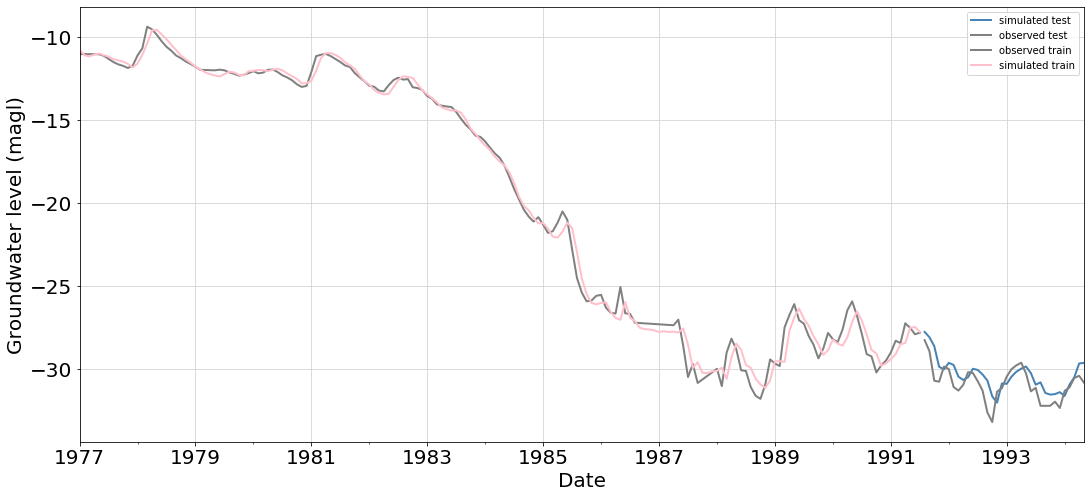

In [62]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima1.iloc[175:209].index)
df1['observed test']      = pima['D4N0112'].iloc[175:209].values

df2 = pd.DataFrame(train_inverse_trans[6].values, columns = ['simulated train'],index =pima1.iloc[0:175].index)
df2['observed train'] = pima['D4N0112'].iloc[0:175].values

out_df = df2.append(df1, sort=True)




#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed train'].plot(color='grey', linewidth=2)
out_df['simulated train'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [60]:
y_lstm = out_df['simulated test']

### GRU

In [63]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [65]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(34,6)

    #running function
    gwl = -0.834686
    test_forecast = X_test
    steps_ahead = 34
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(175, 6)
Train on 175 samples, validate on 34 samples
Epoch 1/1000
 96/175 [===============>..............] - ETA: 2s - loss: 0.7462 - mean_squared_error: 0.7462
Epoch 00001: val_loss improved from inf to 0.85616, saving model to model.h5
175/175 [==============================] - 5s 31ms/sample - loss: 0.6701 - mean_squared_error: 0.6701 - val_loss: 0.8562 - val_mean_squared_error: 0.8562
Epoch 2/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.6483 - mean_squared_error: 0.6483
Epoch 00002: val_loss improved from 0.85616 to 0.79217, saving model to model.h5
175/175 [==============================] - 0s 217us/sample - loss: 0.5825 - mean_squared_error: 0.5825 - val_loss: 0.7922 - val_mean_squared_error: 0.7922
Epoch 3/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.5124 - mean_squared_error: 0.5124
Epoch 00003: val_loss improved from 0.79217 to 0.74267, saving model to model.h5
175/175 [==============================] - 0s 214us/sample 

Epoch 25/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00025: val_loss improved from 0.17761 to 0.16072, saving model to model.h5
175/175 [==============================] - 0s 196us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.1607 - val_mean_squared_error: 0.1607
Epoch 26/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00026: val_loss improved from 0.16072 to 0.14561, saving model to model.h5
175/175 [==============================] - 0s 188us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.1456 - val_mean_squared_error: 0.1456
Epoch 27/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00027: val_loss improved from 0.14561 to 0.12999, saving model to model.h5
175/175 [==============================] - 0s 232us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.130

Epoch 49/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00049: val_loss improved from 0.01675 to 0.01601, saving model to model.h5
175/175 [==============================] - 0s 302us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 50/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00050: val_loss did not improve from 0.01601
175/175 [==============================] - 0s 139us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 51/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00051: val_loss did not improve from 0.01601
175/175 [==============================] - 0s 139us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 52/1000
 96/175 [==

 96/175 [===============>..............] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00074: val_loss did not improve from 0.01292
175/175 [==============================] - 0s 139us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 75/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00075: val_loss did not improve from 0.01292
175/175 [==============================] - 0s 189us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 76/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00076: val_loss did not improve from 0.01292
175/175 [==============================] - 0s 129us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 77/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 100/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00100: val_loss did not improve from 0.01167
175/175 [==============================] - 0s 145us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 101/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00101: val_loss did not improve from 0.01167
175/175 [==============================] - 0s 136us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 102/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00102: val_loss did not improve from 0.01167
175/175 [==============================] - 0s 192us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 103/1000
 96/175 [===============>............

Epoch 126/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00126: val_loss did not improve from 0.01153
175/175 [==============================] - 0s 198us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 127/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00127: val_loss did not improve from 0.01153
175/175 [==============================] - 0s 126us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 128/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00128: val_loss did not improve from 0.01153
175/175 [==============================] - 0s 143us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 129/1000
 96/175 [===============>............

Epoch 152/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00152: val_loss did not improve from 0.01147
175/175 [==============================] - 0s 100us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 153/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00153: val_loss did not improve from 0.01147
175/175 [==============================] - 0s 228us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 154/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00154: val_loss did not improve from 0.01147
175/175 [==============================] - 0s 150us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 155/1000
 96/175 [===============>............

Epoch 178/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00178: val_loss did not improve from 0.01047
175/175 [==============================] - 0s 98us/sample - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 179/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00179: val_loss did not improve from 0.01047
175/175 [==============================] - 0s 103us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 180/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00180: val_loss did not improve from 0.01047
175/175 [==============================] - 0s 280us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 181/1000
 96/175 [===============>.............

Epoch 204/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00204: val_loss did not improve from 0.01040
175/175 [==============================] - 0s 139us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 205/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00205: val_loss did not improve from 0.01040
175/175 [==============================] - 0s 128us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 206/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00206: val_loss did not improve from 0.01040
175/175 [==============================] - 0s 135us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 207/1000
 96/175 [===============>............

Epoch 230/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00230: val_loss did not improve from 0.01027
175/175 [==============================] - 0s 100us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 231/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00231: val_loss did not improve from 0.01027
175/175 [==============================] - 0s 121us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 232/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00232: val_loss did not improve from 0.01027
175/175 [==============================] - 0s 122us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 233/1000
 96/175 [===============>............

Epoch 256/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00256: val_loss did not improve from 0.01027
175/175 [==============================] - 0s 192us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 257/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00257: val_loss did not improve from 0.01027
175/175 [==============================] - 0s 98us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 258/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00258: val_loss did not improve from 0.01027
175/175 [==============================] - 0s 93us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 259/1000
 96/175 [===============>..............

Epoch 282/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00282: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 130us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 283/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00283: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 119us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 284/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00284: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 106us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 285/1000
 96/175 [===============>............

Epoch 308/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00308: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 342us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 309/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00309: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 283us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 310/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00310: val_loss did not improve from 0.01006
175/175 [==============================] - 0s 269us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 311/1000
 96/175 [===============>............

Epoch 334/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00334: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 131us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 335/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00335: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 115us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 336/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00336: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 142us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 337/1000
 96/175 [===============>............

Epoch 360/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00360: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 146us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 361/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00361: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 125us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 362/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00362: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 160us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 363/1000
 96/175 [===============>............

Epoch 386/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00386: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 110us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 387/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00387: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 108us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 388/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00388: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 95us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 389/1000
 96/175 [===============>.............

Epoch 412/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00412: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 102us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 413/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00413: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 103us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 414/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00414: val_loss did not improve from 0.00971
175/175 [==============================] - 0s 103us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Running fold 2
(175, 6)
Train on 175 samples, valida

Epoch 22/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2624 - mean_squared_error: 0.2624
Epoch 00022: val_loss improved from 0.70150 to 0.66241, saving model to model.h5
175/175 [==============================] - 0s 250us/sample - loss: 0.2594 - mean_squared_error: 0.2594 - val_loss: 0.6624 - val_mean_squared_error: 0.6624
Epoch 23/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2405 - mean_squared_error: 0.2405
Epoch 00023: val_loss improved from 0.66241 to 0.62306, saving model to model.h5
175/175 [==============================] - 0s 189us/sample - loss: 0.2499 - mean_squared_error: 0.2499 - val_loss: 0.6231 - val_mean_squared_error: 0.6231
Epoch 24/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2099 - mean_squared_error: 0.2099
Epoch 00024: val_loss improved from 0.62306 to 0.58512, saving model to model.h5
175/175 [==============================] - 0s 263us/sample - loss: 0.2126 - mean_squared_error: 0.2126 - val_loss: 0.585

Epoch 46/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0487 - mean_squared_error: 0.0487
Epoch 00046: val_loss improved from 0.08292 to 0.07511, saving model to model.h5
175/175 [==============================] - 0s 248us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0751 - val_mean_squared_error: 0.0751
Epoch 47/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00047: val_loss improved from 0.07511 to 0.06980, saving model to model.h5
175/175 [==============================] - 0s 269us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0698 - val_mean_squared_error: 0.0698
Epoch 48/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00048: val_loss improved from 0.06980 to 0.06414, saving model to model.h5
175/175 [==============================] - 0s 195us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.064

 96/175 [===============>..............] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00070: val_loss improved from 0.02382 to 0.02340, saving model to model.h5
175/175 [==============================] - 0s 198us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 71/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00071: val_loss improved from 0.02340 to 0.02328, saving model to model.h5
175/175 [==============================] - 0s 201us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 72/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00072: val_loss did not improve from 0.02328
175/175 [==============================] - 0s 142us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 73/

 96/175 [===============>..............] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00095: val_loss did not improve from 0.01663
175/175 [==============================] - 0s 140us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 96/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00096: val_loss did not improve from 0.01663
175/175 [==============================] - 0s 153us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 97/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00097: val_loss improved from 0.01663 to 0.01562, saving model to model.h5
175/175 [==============================] - 0s 214us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 98/1000
 96/175 [===============>

Epoch 121/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00121: val_loss did not improve from 0.01367
175/175 [==============================] - 0s 118us/sample - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 122/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00122: val_loss did not improve from 0.01367
175/175 [==============================] - 0s 153us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 123/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00123: val_loss did not improve from 0.01367
175/175 [==============================] - 0s 145us/sample - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 124/1000
 96/175 [===============>............

Epoch 147/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00147: val_loss did not improve from 0.01250
175/175 [==============================] - 0s 93us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 148/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00148: val_loss did not improve from 0.01250
175/175 [==============================] - 0s 98us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 149/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00149: val_loss did not improve from 0.01250
175/175 [==============================] - 0s 101us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 150/1000
 96/175 [===============>..............

Epoch 173/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00173: val_loss did not improve from 0.01185
175/175 [==============================] - 0s 87us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 174/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00174: val_loss did not improve from 0.01185
175/175 [==============================] - 0s 103us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 175/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00175: val_loss improved from 0.01185 to 0.01155, saving model to model.h5
175/175 [==============================] - 0s 188us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 176/1000
 96/175 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00198: val_loss did not improve from 0.01103
175/175 [==============================] - 0s 112us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 199/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00199: val_loss did not improve from 0.01103
175/175 [==============================] - 0s 126us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 200/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00200: val_loss improved from 0.01103 to 0.01098, saving model to model.h5
175/175 [==============================] - 0s 223us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 201/1000
 96/175 [=============

Epoch 224/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00224: val_loss did not improve from 0.01060
175/175 [==============================] - 0s 97us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 225/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00225: val_loss did not improve from 0.01060
175/175 [==============================] - 0s 135us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 226/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00226: val_loss improved from 0.01060 to 0.01058, saving model to model.h5
175/175 [==============================] - 0s 275us/sample - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 227/1000
 96/175 

Epoch 250/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00250: val_loss did not improve from 0.01029
175/175 [==============================] - 0s 94us/sample - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 251/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00251: val_loss did not improve from 0.01029
175/175 [==============================] - 0s 132us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 252/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00252: val_loss improved from 0.01029 to 0.01016, saving model to model.h5
175/175 [==============================] - 0s 259us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 253/1000
 96/175 

Epoch 276/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00276: val_loss did not improve from 0.00967
175/175 [==============================] - 0s 176us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 277/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00277: val_loss did not improve from 0.00967
175/175 [==============================] - 0s 194us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 278/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00278: val_loss did not improve from 0.00967
175/175 [==============================] - 0s 98us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 279/1000
 96/175 [===============>.............

Epoch 302/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00302: val_loss did not improve from 0.00940
175/175 [==============================] - 0s 90us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 303/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00303: val_loss did not improve from 0.00940
175/175 [==============================] - 0s 111us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 304/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00304: val_loss did not improve from 0.00940
175/175 [==============================] - 0s 100us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 305/1000
 96/175 [===============>.............

Epoch 328/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00328: val_loss did not improve from 0.00933
175/175 [==============================] - 0s 106us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 329/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00329: val_loss did not improve from 0.00933
175/175 [==============================] - 0s 98us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 330/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00330: val_loss did not improve from 0.00933
175/175 [==============================] - 0s 97us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 331/1000
 96/175 [===============>..............

Epoch 354/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00354: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 96us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 355/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00355: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 114us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 356/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00356: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 97us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 357/1000
 96/175 [===============>..............

Epoch 380/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00380: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 156us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 381/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00381: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 100us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 382/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00382: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 105us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 383/1000
 96/175 [===============>............

Epoch 406/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00406: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 126us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 407/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00407: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 92us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 408/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00408: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 111us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 409/1000
 96/175 [===============>.............

Epoch 432/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00432: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 129us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 433/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00433: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 126us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 434/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00434: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 123us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 435/1000
 96/175 [===============>............

Epoch 458/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00458: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 114us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 459/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00459: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 110us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 460/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00460: val_loss did not improve from 0.00871
175/175 [==============================] - 0s 116us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 461/1000
 96/175 [===============>............

 96/175 [===============>..............] - ETA: 0s - loss: 0.4707 - mean_squared_error: 0.4707
Epoch 00018: val_loss improved from 1.06324 to 1.02076, saving model to model.h5
175/175 [==============================] - 0s 215us/sample - loss: 0.4561 - mean_squared_error: 0.4561 - val_loss: 1.0208 - val_mean_squared_error: 1.0208
Epoch 19/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4473 - mean_squared_error: 0.4473
Epoch 00019: val_loss improved from 1.02076 to 0.98197, saving model to model.h5
175/175 [==============================] - 0s 176us/sample - loss: 0.4243 - mean_squared_error: 0.4243 - val_loss: 0.9820 - val_mean_squared_error: 0.9820
Epoch 20/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3955 - mean_squared_error: 0.3955
Epoch 00020: val_loss improved from 0.98197 to 0.94095, saving model to model.h5
175/175 [==============================] - 0s 191us/sample - loss: 0.4135 - mean_squared_error: 0.4135 - val_loss: 0.9410 - val_mean_s

Epoch 42/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 00042: val_loss improved from 0.23966 to 0.21948, saving model to model.h5
175/175 [==============================] - 0s 192us/sample - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.2195 - val_mean_squared_error: 0.2195
Epoch 43/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0918 - mean_squared_error: 0.0918
Epoch 00043: val_loss improved from 0.21948 to 0.19912, saving model to model.h5
175/175 [==============================] - 0s 203us/sample - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.1991 - val_mean_squared_error: 0.1991
Epoch 44/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 00044: val_loss improved from 0.19912 to 0.17954, saving model to model.h5
175/175 [==============================] - 0s 287us/sample - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.179

Epoch 66/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00066: val_loss did not improve from 0.03126
175/175 [==============================] - 0s 99us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 67/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00067: val_loss improved from 0.03126 to 0.02901, saving model to model.h5
175/175 [==============================] - 0s 186us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 68/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00068: val_loss improved from 0.02901 to 0.02626, saving model to model.h5
175/175 [==============================] - 0s 247us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0263 - val_mean_squared_error: 0.0

 96/175 [===============>..............] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00091: val_loss did not improve from 0.01745
175/175 [==============================] - 0s 88us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 92/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00092: val_loss did not improve from 0.01745
175/175 [==============================] - 0s 133us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 93/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00093: val_loss did not improve from 0.01745
175/175 [==============================] - 0s 147us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 94/1000
 96/175 [===============>..............] - ETA: 0s - los

Epoch 117/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00117: val_loss improved from 0.01555 to 0.01369, saving model to model.h5
175/175 [==============================] - 0s 248us/sample - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 118/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00118: val_loss did not improve from 0.01369
175/175 [==============================] - 0s 85us/sample - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 119/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00119: val_loss did not improve from 0.01369
175/175 [==============================] - 0s 89us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 120/1000
 96/175 [

Epoch 143/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00143: val_loss did not improve from 0.01354
175/175 [==============================] - 0s 213us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 144/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00144: val_loss did not improve from 0.01354
175/175 [==============================] - 0s 146us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 145/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00145: val_loss did not improve from 0.01354
175/175 [==============================] - 0s 150us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 146/1000
 96/175 [===============>............

Epoch 169/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00169: val_loss did not improve from 0.01245
175/175 [==============================] - 0s 171us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 170/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00170: val_loss did not improve from 0.01245
175/175 [==============================] - 0s 157us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 171/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00171: val_loss did not improve from 0.01245
175/175 [==============================] - 0s 120us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 172/1000
 96/175 [===============>............

Epoch 195/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00195: val_loss did not improve from 0.01110
175/175 [==============================] - 0s 96us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 196/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00196: val_loss did not improve from 0.01110
175/175 [==============================] - 0s 109us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 197/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00197: val_loss did not improve from 0.01110
175/175 [==============================] - 0s 145us/sample - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 198/1000
 96/175 [===============>.............

Epoch 221/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00221: val_loss did not improve from 0.01102
175/175 [==============================] - 0s 192us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 222/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00222: val_loss did not improve from 0.01102
175/175 [==============================] - 0s 99us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 223/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00223: val_loss did not improve from 0.01102
175/175 [==============================] - 0s 93us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 224/1000
 96/175 [===============>..............

Epoch 247/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00247: val_loss did not improve from 0.01072
175/175 [==============================] - 0s 114us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 248/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00248: val_loss did not improve from 0.01072
175/175 [==============================] - 0s 117us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 249/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00249: val_loss did not improve from 0.01072
175/175 [==============================] - 0s 90us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 250/1000
 96/175 [===============>.............

Epoch 273/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00273: val_loss did not improve from 0.01072
175/175 [==============================] - 0s 101us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 274/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00274: val_loss did not improve from 0.01072
175/175 [==============================] - 0s 91us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 275/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00275: val_loss did not improve from 0.01072
175/175 [==============================] - 0s 90us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 276/1000
 96/175 [===============>..............

Epoch 299/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00299: val_loss did not improve from 0.00987
175/175 [==============================] - 0s 95us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 300/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00300: val_loss did not improve from 0.00987
175/175 [==============================] - 0s 94us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 301/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00301: val_loss did not improve from 0.00987
175/175 [==============================] - 0s 116us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 302/1000
 96/175 [===============>..............

Epoch 325/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00325: val_loss did not improve from 0.00987
175/175 [==============================] - 0s 111us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 326/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00326: val_loss did not improve from 0.00987
175/175 [==============================] - 0s 122us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 327/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00327: val_loss did not improve from 0.00987
175/175 [==============================] - 0s 96us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 328/1000
 96/175 [===============>.............

Epoch 351/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00351: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 103us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 352/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00352: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 103us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 353/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00353: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 113us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 354/1000
 96/175 [===============>............

Epoch 377/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00377: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 101us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 378/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00378: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 105us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 379/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00379: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 92us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 380/1000
 96/175 [===============>.............

Epoch 403/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00403: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 99us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 404/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00404: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 147us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 405/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00405: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 114us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 406/1000
 96/175 [===============>.............

Epoch 429/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00429: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 104us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 430/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00430: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 109us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 431/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00431: val_loss did not improve from 0.00911
175/175 [==============================] - 0s 162us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 432/1000
 96/175 [===============>............

Epoch 5/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.7403 - mean_squared_error: 0.7403
Epoch 00005: val_loss improved from 1.11145 to 1.05620, saving model to model.h5
175/175 [==============================] - 0s 197us/sample - loss: 0.6873 - mean_squared_error: 0.6873 - val_loss: 1.0562 - val_mean_squared_error: 1.0562
Epoch 6/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.6853 - mean_squared_error: 0.6853
Epoch 00006: val_loss improved from 1.05620 to 1.00622, saving model to model.h5
175/175 [==============================] - 0s 174us/sample - loss: 0.6442 - mean_squared_error: 0.6442 - val_loss: 1.0062 - val_mean_squared_error: 1.0062
Epoch 7/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.6135 - mean_squared_error: 0.6135
Epoch 00007: val_loss improved from 1.00622 to 0.96076, saving model to model.h5
175/175 [==============================] - 0s 196us/sample - loss: 0.6080 - mean_squared_error: 0.6080 - val_loss: 0.9608 -

Epoch 29/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 00029: val_loss improved from 0.28350 to 0.25874, saving model to model.h5
175/175 [==============================] - 0s 223us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.2587 - val_mean_squared_error: 0.2587
Epoch 30/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 00030: val_loss improved from 0.25874 to 0.23451, saving model to model.h5
175/175 [==============================] - 0s 207us/sample - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.2345 - val_mean_squared_error: 0.2345
Epoch 31/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 00031: val_loss improved from 0.23451 to 0.21269, saving model to model.h5
175/175 [==============================] - 0s 189us/sample - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.212

Epoch 53/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00053: val_loss improved from 0.03086 to 0.02925, saving model to model.h5
175/175 [==============================] - 0s 215us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 54/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00054: val_loss improved from 0.02925 to 0.02777, saving model to model.h5
175/175 [==============================] - 0s 206us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 55/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00055: val_loss improved from 0.02777 to 0.02745, saving model to model.h5
175/175 [==============================] - 0s 193us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.027

Epoch 78/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00078: val_loss did not improve from 0.01622
175/175 [==============================] - 0s 170us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 79/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00079: val_loss did not improve from 0.01622
175/175 [==============================] - 0s 104us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 80/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00080: val_loss did not improve from 0.01622
175/175 [==============================] - 0s 103us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 81/1000
 96/175 [===============>..............] 

Epoch 104/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00104: val_loss improved from 0.01415 to 0.01361, saving model to model.h5
175/175 [==============================] - 0s 200us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 105/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00105: val_loss did not improve from 0.01361
175/175 [==============================] - 0s 155us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 106/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00106: val_loss did not improve from 0.01361
175/175 [==============================] - 0s 93us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 107/1000
 96/175 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00129: val_loss did not improve from 0.01169
175/175 [==============================] - 0s 113us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 130/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00130: val_loss did not improve from 0.01169
175/175 [==============================] - 0s 94us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 131/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00131: val_loss did not improve from 0.01169
175/175 [==============================] - 0s 151us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 132/1000
 96/175 [===============>..............] - ETA: 0s - 

Epoch 155/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00155: val_loss improved from 0.01103 to 0.01093, saving model to model.h5
175/175 [==============================] - 0s 252us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 156/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00156: val_loss did not improve from 0.01093
175/175 [==============================] - 0s 89us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 157/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00157: val_loss did not improve from 0.01093
175/175 [==============================] - 0s 109us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 158/1000
 96/175 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00180: val_loss did not improve from 0.01015
175/175 [==============================] - 0s 92us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 181/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00181: val_loss did not improve from 0.01015
175/175 [==============================] - 0s 102us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 182/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00182: val_loss improved from 0.01015 to 0.01011, saving model to model.h5
175/175 [==============================] - 0s 170us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 183/1000
 96/175 [==============

Epoch 206/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00206: val_loss improved from 0.00975 to 0.00953, saving model to model.h5
175/175 [==============================] - 0s 231us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 207/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00207: val_loss did not improve from 0.00953
175/175 [==============================] - 0s 114us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 208/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00208: val_loss did not improve from 0.00953
175/175 [==============================] - 0s 97us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 209/1000
 96/175 

Epoch 232/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00232: val_loss did not improve from 0.00926
175/175 [==============================] - 0s 111us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 233/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00233: val_loss did not improve from 0.00926
175/175 [==============================] - 0s 119us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 234/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00234: val_loss did not improve from 0.00926
175/175 [==============================] - 0s 145us/sample - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 235/1000
 96/175 [===============>............

Epoch 258/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00258: val_loss improved from 0.00895 to 0.00890, saving model to model.h5
175/175 [==============================] - 0s 458us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 259/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00259: val_loss did not improve from 0.00890
175/175 [==============================] - 0s 244us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 260/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00260: val_loss did not improve from 0.00890
175/175 [==============================] - 0s 284us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 261/1000
 96/175

Epoch 284/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00284: val_loss did not improve from 0.00876
175/175 [==============================] - 0s 152us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 285/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00285: val_loss did not improve from 0.00876
175/175 [==============================] - 0s 142us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 286/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00286: val_loss did not improve from 0.00876
175/175 [==============================] - 0s 327us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 287/1000
 96/175 [===============>............

Epoch 310/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00310: val_loss did not improve from 0.00867
175/175 [==============================] - 0s 130us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 311/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00311: val_loss improved from 0.00867 to 0.00849, saving model to model.h5
175/175 [==============================] - 0s 245us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 312/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00312: val_loss did not improve from 0.00849
175/175 [==============================] - 0s 110us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 313/1000
 96/175

Epoch 336/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00336: val_loss did not improve from 0.00849
175/175 [==============================] - 0s 116us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 337/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00337: val_loss did not improve from 0.00849
175/175 [==============================] - 0s 101us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 338/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00338: val_loss did not improve from 0.00849
175/175 [==============================] - 0s 90us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 339/1000
 96/175 [===============>.............

Epoch 362/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00362: val_loss did not improve from 0.00847
175/175 [==============================] - 0s 101us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 363/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00363: val_loss did not improve from 0.00847
175/175 [==============================] - 0s 108us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 364/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00364: val_loss did not improve from 0.00847
175/175 [==============================] - 0s 110us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 365/1000
 96/175 [===============>............

Epoch 388/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00388: val_loss did not improve from 0.00817
175/175 [==============================] - 0s 121us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 389/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00389: val_loss did not improve from 0.00817
175/175 [==============================] - 0s 172us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 390/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00390: val_loss did not improve from 0.00817
175/175 [==============================] - 0s 102us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 391/1000
 96/175 [===============>............

Epoch 414/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00414: val_loss did not improve from 0.00817
175/175 [==============================] - 0s 101us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 415/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00415: val_loss did not improve from 0.00817
175/175 [==============================] - 0s 93us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 416/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00416: val_loss did not improve from 0.00817
175/175 [==============================] - 0s 98us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 417/1000
 96/175 [===============>..............

Epoch 440/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00440: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 128us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 441/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00441: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 124us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 442/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00442: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 113us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 443/1000
 96/175 [===============>............

Epoch 466/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00466: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 120us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 467/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00467: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 97us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 468/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00468: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 97us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 469/1000
 96/175 [===============>..............

Epoch 492/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00492: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 207us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 493/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00493: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 155us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 494/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00494: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 126us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 495/1000
 96/175 [===============>............

Epoch 518/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00518: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 98us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 519/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00519: val_loss did not improve from 0.00790
175/175 [==============================] - 0s 110us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Running fold 5
(175, 6)
Train on 175 samples, validate on 34 samples
Epoch 1/1000
 96/175 [===============>..............] - ETA: 1s - loss: 1.2608 - mean_squared_error: 1.2608
Epoch 00001: val_loss improved from inf to 1.54127, saving model to model.h5
175/175 [==============================] - 5s 29ms/sample - loss: 1.2277 - mean_squared_error: 1.2277 - val_loss: 1

Epoch 23/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2097 - mean_squared_error: 0.2097
Epoch 00023: val_loss improved from 0.43157 to 0.39883, saving model to model.h5
175/175 [==============================] - 0s 189us/sample - loss: 0.1944 - mean_squared_error: 0.1944 - val_loss: 0.3988 - val_mean_squared_error: 0.3988
Epoch 24/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1865 - mean_squared_error: 0.1865
Epoch 00024: val_loss improved from 0.39883 to 0.36797, saving model to model.h5
175/175 [==============================] - 0s 165us/sample - loss: 0.1710 - mean_squared_error: 0.1710 - val_loss: 0.3680 - val_mean_squared_error: 0.3680
Epoch 25/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1698 - mean_squared_error: 0.1698
Epoch 00025: val_loss improved from 0.36797 to 0.33604, saving model to model.h5
175/175 [==============================] - 0s 217us/sample - loss: 0.1607 - mean_squared_error: 0.1607 - val_loss: 0.336

Epoch 47/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00047: val_loss improved from 0.02585 to 0.02199, saving model to model.h5
175/175 [==============================] - 0s 189us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 48/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00048: val_loss improved from 0.02199 to 0.02071, saving model to model.h5
175/175 [==============================] - 0s 244us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 49/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00049: val_loss improved from 0.02071 to 0.01939, saving model to model.h5
175/175 [==============================] - 0s 202us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.019

Epoch 72/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00072: val_loss did not improve from 0.01198
175/175 [==============================] - 0s 167us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 73/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00073: val_loss improved from 0.01198 to 0.01175, saving model to model.h5
175/175 [==============================] - 0s 194us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 74/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00074: val_loss did not improve from 0.01175
175/175 [==============================] - 0s 103us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 75/1000
 96/175 [==

175/175 [==============================] - 0s 200us/sample - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 98/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00098: val_loss did not improve from 0.01150
175/175 [==============================] - 0s 179us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 99/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00099: val_loss did not improve from 0.01150
175/175 [==============================] - 0s 94us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 100/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00100: val_loss did not improve from 0.01150
175/175 [==============================] - 0s 92us/samp

Epoch 123/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00123: val_loss improved from 0.01121 to 0.01119, saving model to model.h5
175/175 [==============================] - 0s 189us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 124/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00124: val_loss did not improve from 0.01119
175/175 [==============================] - 0s 90us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 125/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00125: val_loss improved from 0.01119 to 0.01118, saving model to model.h5
175/175 [==============================] - 0s 183us/sample - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0112 - val_mean_squared_error: 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00148: val_loss did not improve from 0.01078
175/175 [==============================] - 0s 170us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 149/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00149: val_loss did not improve from 0.01078
175/175 [==============================] - 0s 112us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 150/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00150: val_loss did not improve from 0.01078
175/175 [==============================] - 0s 92us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 151/1000
 96/175 [===============>..............] - ETA: 0s - 

Epoch 174/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00174: val_loss did not improve from 0.01046
175/175 [==============================] - 0s 121us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 175/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00175: val_loss did not improve from 0.01046
175/175 [==============================] - 0s 101us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 176/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00176: val_loss improved from 0.01046 to 0.01045, saving model to model.h5
175/175 [==============================] - 0s 255us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 177/1000
 96/175

 96/175 [===============>..............] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00199: val_loss did not improve from 0.01005
175/175 [==============================] - 0s 104us/sample - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 200/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00200: val_loss did not improve from 0.01005
175/175 [==============================] - 0s 114us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 201/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00201: val_loss did not improve from 0.01005
175/175 [==============================] - 0s 95us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 202/1000
 96/175 [===============>..............] - ETA: 0s - 

Epoch 225/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00225: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 112us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 226/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00226: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 102us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 227/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00227: val_loss did not improve from 0.00970
175/175 [==============================] - 0s 117us/sample - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 228/1000
 96/175 [===============>............

Epoch 251/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00251: val_loss did not improve from 0.00955
175/175 [==============================] - 0s 107us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 252/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00252: val_loss did not improve from 0.00955
175/175 [==============================] - 0s 99us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 253/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00253: val_loss improved from 0.00955 to 0.00946, saving model to model.h5
175/175 [==============================] - 0s 235us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 254/1000
 96/175 

Epoch 277/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00277: val_loss did not improve from 0.00929
175/175 [==============================] - 0s 185us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 278/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00278: val_loss did not improve from 0.00929
175/175 [==============================] - 0s 141us/sample - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 279/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00279: val_loss did not improve from 0.00929
175/175 [==============================] - 0s 185us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 280/1000
 96/175 [===============>............

Epoch 303/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00303: val_loss did not improve from 0.00897
175/175 [==============================] - 0s 101us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 304/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00304: val_loss did not improve from 0.00897
175/175 [==============================] - 0s 107us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 305/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00305: val_loss did not improve from 0.00897
175/175 [==============================] - 0s 95us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 306/1000
 96/175 [===============>.............

Epoch 329/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00329: val_loss did not improve from 0.00875
175/175 [==============================] - 0s 146us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 330/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00330: val_loss did not improve from 0.00875
175/175 [==============================] - 0s 106us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 331/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00331: val_loss did not improve from 0.00875
175/175 [==============================] - 0s 96us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 332/1000
 96/175 [===============>.............

Epoch 355/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00355: val_loss did not improve from 0.00856
175/175 [==============================] - 0s 136us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 356/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00356: val_loss did not improve from 0.00856
175/175 [==============================] - 0s 110us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 357/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00357: val_loss did not improve from 0.00856
175/175 [==============================] - 0s 107us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 358/1000
 96/175 [===============>............

Epoch 381/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00381: val_loss did not improve from 0.00851
175/175 [==============================] - 0s 110us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 382/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00382: val_loss did not improve from 0.00851
175/175 [==============================] - 0s 139us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 383/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00383: val_loss did not improve from 0.00851
175/175 [==============================] - 0s 110us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 384/1000
 96/175 [===============>............

Epoch 407/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00407: val_loss did not improve from 0.00820
175/175 [==============================] - 0s 97us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 408/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00408: val_loss did not improve from 0.00820
175/175 [==============================] - 0s 101us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 409/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00409: val_loss did not improve from 0.00820
175/175 [==============================] - 0s 94us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 410/1000
 96/175 [===============>..............

Epoch 433/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00433: val_loss did not improve from 0.00810
175/175 [==============================] - 0s 84us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 434/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00434: val_loss did not improve from 0.00810
175/175 [==============================] - 0s 101us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 435/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00435: val_loss did not improve from 0.00810
175/175 [==============================] - 0s 88us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 436/1000
 96/175 [===============>..............

Epoch 459/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00459: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 103us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 460/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00460: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 102us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 461/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00461: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 95us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 462/1000
 96/175 [===============>.............

Epoch 485/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00485: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 144us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 486/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00486: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 115us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 487/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00487: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 99us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 488/1000
 96/175 [===============>.............

Epoch 511/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00511: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 140us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 512/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00512: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 102us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 513/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00513: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 100us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 514/1000
 96/175 [===============>............

Epoch 537/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00537: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 92us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 538/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00538: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 96us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 539/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00539: val_loss did not improve from 0.00804
175/175 [==============================] - 0s 92us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 540/1000
 96/175 [===============>..............]

 96/175 [===============>..............] - ETA: 0s - loss: 0.9115 - mean_squared_error: 0.9115
Epoch 00008: val_loss improved from 1.39534 to 1.34083, saving model to model.h5
175/175 [==============================] - 0s 212us/sample - loss: 0.9149 - mean_squared_error: 0.9149 - val_loss: 1.3408 - val_mean_squared_error: 1.3408
Epoch 9/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.8523 - mean_squared_error: 0.8523
Epoch 00009: val_loss improved from 1.34083 to 1.28904, saving model to model.h5
175/175 [==============================] - 0s 173us/sample - loss: 0.8425 - mean_squared_error: 0.8425 - val_loss: 1.2890 - val_mean_squared_error: 1.2890
Epoch 10/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.7774 - mean_squared_error: 0.7774
Epoch 00010: val_loss improved from 1.28904 to 1.24074, saving model to model.h5
175/175 [==============================] - 0s 215us/sample - loss: 0.7682 - mean_squared_error: 0.7682 - val_loss: 1.2407 - val_mean_sq

Epoch 32/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1843 - mean_squared_error: 0.1843
Epoch 00032: val_loss improved from 0.45491 to 0.42536, saving model to model.h5
175/175 [==============================] - 0s 226us/sample - loss: 0.1876 - mean_squared_error: 0.1876 - val_loss: 0.4254 - val_mean_squared_error: 0.4254
Epoch 33/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1763 - mean_squared_error: 0.1763
Epoch 00033: val_loss improved from 0.42536 to 0.39955, saving model to model.h5
175/175 [==============================] - 0s 207us/sample - loss: 0.1602 - mean_squared_error: 0.1602 - val_loss: 0.3995 - val_mean_squared_error: 0.3995
Epoch 34/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1361 - mean_squared_error: 0.1361
Epoch 00034: val_loss improved from 0.39955 to 0.37215, saving model to model.h5
175/175 [==============================] - 0s 195us/sample - loss: 0.1442 - mean_squared_error: 0.1442 - val_loss: 0.372

Epoch 56/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00056: val_loss improved from 0.04363 to 0.03960, saving model to model.h5
175/175 [==============================] - 0s 343us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 57/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00057: val_loss improved from 0.03960 to 0.03713, saving model to model.h5
175/175 [==============================] - 0s 224us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 58/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00058: val_loss improved from 0.03713 to 0.03380, saving model to model.h5
175/175 [==============================] - 0s 238us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.033

 96/175 [===============>..............] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00080: val_loss did not improve from 0.01725
175/175 [==============================] - 0s 271us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 81/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00081: val_loss improved from 0.01725 to 0.01709, saving model to model.h5
175/175 [==============================] - 0s 255us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 82/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00082: val_loss did not improve from 0.01709
175/175 [==============================] - 0s 127us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 83/1000
 96/175 [===============>

Epoch 106/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00106: val_loss did not improve from 0.01446
175/175 [==============================] - 0s 147us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 107/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00107: val_loss did not improve from 0.01446
175/175 [==============================] - 0s 114us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 108/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00108: val_loss did not improve from 0.01446
175/175 [==============================] - 0s 151us/sample - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 109/1000
 96/175 [===============>............

Epoch 132/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00132: val_loss did not improve from 0.01261
175/175 [==============================] - 0s 122us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 133/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00133: val_loss did not improve from 0.01261
175/175 [==============================] - 0s 117us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 134/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00134: val_loss did not improve from 0.01261
175/175 [==============================] - 0s 126us/sample - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 135/1000
 96/175 [===============>............

Epoch 158/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00158: val_loss improved from 0.01156 to 0.01144, saving model to model.h5
175/175 [==============================] - 0s 321us/sample - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 159/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00159: val_loss did not improve from 0.01144
175/175 [==============================] - 0s 143us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 160/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00160: val_loss did not improve from 0.01144
175/175 [==============================] - 0s 183us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 161/1000
 96/175

Epoch 184/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00184: val_loss did not improve from 0.01122
175/175 [==============================] - 0s 116us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 185/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00185: val_loss did not improve from 0.01122
175/175 [==============================] - 0s 127us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 186/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00186: val_loss did not improve from 0.01122
175/175 [==============================] - 0s 164us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 187/1000
 96/175 [===============>............

Epoch 210/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00210: val_loss did not improve from 0.01031
175/175 [==============================] - 0s 284us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 211/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00211: val_loss did not improve from 0.01031
175/175 [==============================] - 0s 149us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 212/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00212: val_loss did not improve from 0.01031
175/175 [==============================] - 0s 166us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 213/1000
 96/175 [===============>............

Epoch 236/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00236: val_loss did not improve from 0.01024
175/175 [==============================] - 0s 118us/sample - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 237/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00237: val_loss did not improve from 0.01024
175/175 [==============================] - 0s 112us/sample - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 238/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00238: val_loss improved from 0.01024 to 0.00913, saving model to model.h5
175/175 [==============================] - 0s 269us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 239/1000
 96/175

Epoch 262/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00262: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 155us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 263/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00263: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 107us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 264/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00264: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 117us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 265/1000
 96/175 [===============>............

Epoch 288/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00288: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 110us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 289/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00289: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 104us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 290/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00290: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 100us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 291/1000
 96/175 [===============>............

Epoch 314/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00314: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 345us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 315/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00315: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 155us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 316/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00316: val_loss did not improve from 0.00913
175/175 [==============================] - 0s 124us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 317/1000
 96/175 [===============>............

Epoch 2/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3377 - mean_squared_error: 0.3377
Epoch 00002: val_loss improved from 0.51838 to 0.46556, saving model to model.h5
175/175 [==============================] - 0s 204us/sample - loss: 0.3529 - mean_squared_error: 0.3529 - val_loss: 0.4656 - val_mean_squared_error: 0.4656
Epoch 3/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2959 - mean_squared_error: 0.2959
Epoch 00003: val_loss improved from 0.46556 to 0.42262, saving model to model.h5
175/175 [==============================] - 0s 236us/sample - loss: 0.2967 - mean_squared_error: 0.2967 - val_loss: 0.4226 - val_mean_squared_error: 0.4226
Epoch 4/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2802 - mean_squared_error: 0.2802
Epoch 00004: val_loss improved from 0.42262 to 0.38806, saving model to model.h5
175/175 [==============================] - 0s 204us/sample - loss: 0.2546 - mean_squared_error: 0.2546 - val_loss: 0.3881 -

Epoch 26/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00026: val_loss improved from 0.05727 to 0.05389, saving model to model.h5
175/175 [==============================] - 0s 185us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 27/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00027: val_loss improved from 0.05389 to 0.04823, saving model to model.h5
175/175 [==============================] - 0s 247us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 28/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00028: val_loss improved from 0.04823 to 0.04367, saving model to model.h5
175/175 [==============================] - 0s 227us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.043

 96/175 [===============>..............] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00050: val_loss did not improve from 0.01877
175/175 [==============================] - 0s 91us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 51/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00051: val_loss improved from 0.01877 to 0.01756, saving model to model.h5
175/175 [==============================] - 0s 189us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 52/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00052: val_loss did not improve from 0.01756
175/175 [==============================] - 0s 103us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 53/1000
 96/175 [===============>.

Epoch 76/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00076: val_loss improved from 0.01635 to 0.01533, saving model to model.h5
175/175 [==============================] - 0s 212us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 77/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00077: val_loss improved from 0.01533 to 0.01408, saving model to model.h5
175/175 [==============================] - 0s 187us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 78/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00078: val_loss did not improve from 0.01408
175/175 [==============================] - 0s 85us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0175 - val_mean_squared_error: 0.0

Epoch 102/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00102: val_loss did not improve from 0.01315
175/175 [==============================] - 0s 99us/sample - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 103/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00103: val_loss did not improve from 0.01315
175/175 [==============================] - 0s 95us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 104/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00104: val_loss did not improve from 0.01315
175/175 [==============================] - 0s 98us/sample - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 105/1000
 96/175 [===============>..............]

Epoch 128/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00128: val_loss did not improve from 0.01217
175/175 [==============================] - 0s 120us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 129/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00129: val_loss did not improve from 0.01217
175/175 [==============================] - 0s 91us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 130/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00130: val_loss did not improve from 0.01217
175/175 [==============================] - 0s 109us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 131/1000
 96/175 [===============>.............

Epoch 154/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00154: val_loss did not improve from 0.01150
175/175 [==============================] - 0s 122us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 155/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00155: val_loss did not improve from 0.01150
175/175 [==============================] - 0s 115us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 156/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00156: val_loss did not improve from 0.01150
175/175 [==============================] - 0s 103us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 157/1000
 96/175 [===============>............

Epoch 180/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00180: val_loss did not improve from 0.01110
175/175 [==============================] - 0s 116us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 181/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00181: val_loss did not improve from 0.01110
175/175 [==============================] - 0s 137us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 182/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00182: val_loss did not improve from 0.01110
175/175 [==============================] - 0s 96us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 183/1000
 96/175 [===============>.............

Epoch 206/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00206: val_loss did not improve from 0.01045
175/175 [==============================] - 0s 99us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 207/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00207: val_loss did not improve from 0.01045
175/175 [==============================] - 0s 100us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 208/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00208: val_loss did not improve from 0.01045
175/175 [==============================] - 0s 96us/sample - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 209/1000
 96/175 [===============>..............

Epoch 232/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00232: val_loss did not improve from 0.01010
175/175 [==============================] - 0s 145us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 233/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00233: val_loss did not improve from 0.01010
175/175 [==============================] - 0s 105us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 234/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00234: val_loss improved from 0.01010 to 0.00973, saving model to model.h5
175/175 [==============================] - 0s 213us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 235/1000
 96/175

Epoch 258/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00258: val_loss did not improve from 0.00973
175/175 [==============================] - 0s 128us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 259/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00259: val_loss did not improve from 0.00973
175/175 [==============================] - 0s 185us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 260/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00260: val_loss did not improve from 0.00973
175/175 [==============================] - 0s 171us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 261/1000
 96/175 [===============>............

Epoch 284/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00284: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 106us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 285/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00285: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 114us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 286/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00286: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 233us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 287/1000
 96/175 [===============>............

Epoch 310/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00310: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 146us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 311/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00311: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 123us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 312/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00312: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 104us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 313/1000
 96/175 [===============>............

Epoch 336/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00336: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 124us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 337/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00337: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 108us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 338/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00338: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 152us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 339/1000
 96/175 [===============>............

Epoch 362/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00362: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 115us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 363/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00363: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 123us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 364/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00364: val_loss did not improve from 0.00947
175/175 [==============================] - 0s 134us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 365/1000
 96/175 [===============>............

Epoch 14/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3565 - mean_squared_error: 0.3565
Epoch 00014: val_loss improved from 0.88630 to 0.84124, saving model to model.h5
175/175 [==============================] - 0s 211us/sample - loss: 0.3273 - mean_squared_error: 0.3273 - val_loss: 0.8412 - val_mean_squared_error: 0.8412
Epoch 15/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3263 - mean_squared_error: 0.3263
Epoch 00015: val_loss improved from 0.84124 to 0.79892, saving model to model.h5
175/175 [==============================] - 0s 194us/sample - loss: 0.3165 - mean_squared_error: 0.3165 - val_loss: 0.7989 - val_mean_squared_error: 0.7989
Epoch 16/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2953 - mean_squared_error: 0.2953
Epoch 00016: val_loss improved from 0.79892 to 0.75694, saving model to model.h5
175/175 [==============================] - 0s 204us/sample - loss: 0.3059 - mean_squared_error: 0.3059 - val_loss: 0.756

Epoch 38/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0602 - mean_squared_error: 0.0602
Epoch 00038: val_loss improved from 0.13653 to 0.12550, saving model to model.h5
175/175 [==============================] - 0s 209us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 39/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00039: val_loss improved from 0.12550 to 0.11445, saving model to model.h5
175/175 [==============================] - 0s 198us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.1145 - val_mean_squared_error: 0.1145
Epoch 40/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00040: val_loss improved from 0.11445 to 0.10454, saving model to model.h5
175/175 [==============================] - 0s 220us/sample - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.104

 96/175 [===============>..............] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00062: val_loss improved from 0.03192 to 0.02993, saving model to model.h5
175/175 [==============================] - 0s 199us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 63/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00063: val_loss did not improve from 0.02993
175/175 [==============================] - 0s 103us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 64/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00064: val_loss improved from 0.02993 to 0.02560, saving model to model.h5
175/175 [==============================] - 0s 189us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 65/

 96/175 [===============>..............] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00087: val_loss did not improve from 0.01661
175/175 [==============================] - 0s 124us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 88/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00088: val_loss did not improve from 0.01661
175/175 [==============================] - 0s 150us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 89/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00089: val_loss did not improve from 0.01661
175/175 [==============================] - 0s 117us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 90/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 113/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00113: val_loss did not improve from 0.01419
175/175 [==============================] - 0s 131us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 114/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00114: val_loss did not improve from 0.01419
175/175 [==============================] - 0s 117us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 115/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00115: val_loss did not improve from 0.01419
175/175 [==============================] - 0s 127us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 116/1000
 96/175 [===============>............

Epoch 139/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00139: val_loss did not improve from 0.01280
175/175 [==============================] - 0s 141us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 140/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00140: val_loss did not improve from 0.01280
175/175 [==============================] - 0s 218us/sample - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 141/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00141: val_loss did not improve from 0.01280
175/175 [==============================] - 0s 145us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 142/1000
 96/175 [===============>............

Epoch 165/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00165: val_loss improved from 0.01180 to 0.01136, saving model to model.h5
175/175 [==============================] - 0s 374us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 166/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00166: val_loss did not improve from 0.01136
175/175 [==============================] - 0s 129us/sample - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 167/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00167: val_loss improved from 0.01136 to 0.01113, saving model to model.h5
175/175 [==============================] - 0s 231us/sample - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0111 - val_mean_squared_error:

Epoch 191/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00191: val_loss did not improve from 0.01069
175/175 [==============================] - 0s 133us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 192/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00192: val_loss did not improve from 0.01069
175/175 [==============================] - 0s 149us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 193/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00193: val_loss did not improve from 0.01069
175/175 [==============================] - 0s 175us/sample - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 194/1000
 96/175 [===============>............

Epoch 217/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00217: val_loss did not improve from 0.01014
175/175 [==============================] - 0s 312us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 218/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00218: val_loss did not improve from 0.01014
175/175 [==============================] - 0s 173us/sample - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 219/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00219: val_loss did not improve from 0.01014
175/175 [==============================] - 0s 125us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 220/1000
 96/175 [===============>............

Epoch 243/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00243: val_loss did not improve from 0.00981
175/175 [==============================] - 0s 187us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 244/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00244: val_loss did not improve from 0.00981
175/175 [==============================] - 0s 141us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 245/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00245: val_loss did not improve from 0.00981
175/175 [==============================] - 0s 148us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 246/1000
 96/175 [===============>............

Epoch 269/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00269: val_loss did not improve from 0.00940
175/175 [==============================] - 0s 153us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 270/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00270: val_loss did not improve from 0.00940
175/175 [==============================] - 0s 153us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 271/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00271: val_loss did not improve from 0.00940
175/175 [==============================] - 0s 197us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 272/1000
 96/175 [===============>............

Epoch 295/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00295: val_loss improved from 0.00917 to 0.00902, saving model to model.h5
175/175 [==============================] - 0s 211us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 296/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00296: val_loss improved from 0.00902 to 0.00891, saving model to model.h5
175/175 [==============================] - 0s 226us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 297/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00297: val_loss did not improve from 0.00891
175/175 [==============================] - 0s 103us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0092 - val_mean_squared_error:

Epoch 321/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00321: val_loss did not improve from 0.00855
175/175 [==============================] - 0s 101us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 322/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00322: val_loss did not improve from 0.00855
175/175 [==============================] - 0s 117us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 323/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00323: val_loss did not improve from 0.00855
175/175 [==============================] - 0s 114us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 324/1000
 96/175 [===============>............

Epoch 347/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00347: val_loss did not improve from 0.00838
175/175 [==============================] - 0s 107us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 348/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00348: val_loss improved from 0.00838 to 0.00831, saving model to model.h5
175/175 [==============================] - 0s 209us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 349/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00349: val_loss did not improve from 0.00831
175/175 [==============================] - 0s 98us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 350/1000
 96/175 

Epoch 373/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00373: val_loss did not improve from 0.00821
175/175 [==============================] - 0s 309us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 374/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00374: val_loss did not improve from 0.00821
175/175 [==============================] - 0s 204us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 375/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00375: val_loss did not improve from 0.00821
175/175 [==============================] - 0s 116us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 376/1000
 96/175 [===============>............

Epoch 399/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00399: val_loss did not improve from 0.00821
175/175 [==============================] - 0s 116us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 400/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00400: val_loss did not improve from 0.00821
175/175 [==============================] - 0s 130us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 401/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00401: val_loss improved from 0.00821 to 0.00811, saving model to model.h5
175/175 [==============================] - 0s 354us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 402/1000
 96/175

Epoch 425/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00425: val_loss did not improve from 0.00811
175/175 [==============================] - 0s 113us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 426/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00426: val_loss did not improve from 0.00811
175/175 [==============================] - 0s 100us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 427/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00427: val_loss did not improve from 0.00811
175/175 [==============================] - 0s 89us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 428/1000
 96/175 [===============>.............

Epoch 451/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00451: val_loss did not improve from 0.00775
175/175 [==============================] - 0s 107us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 452/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00452: val_loss did not improve from 0.00775
175/175 [==============================] - 0s 112us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 453/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00453: val_loss did not improve from 0.00775
175/175 [==============================] - 0s 140us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 454/1000
 96/175 [===============>............

Epoch 477/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00477: val_loss did not improve from 0.00775
175/175 [==============================] - 0s 105us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 478/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00478: val_loss did not improve from 0.00775
175/175 [==============================] - 0s 106us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 479/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00479: val_loss did not improve from 0.00775
175/175 [==============================] - 0s 113us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 480/1000
 96/175 [===============>............

Epoch 503/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00503: val_loss did not improve from 0.00775
175/175 [==============================] - 0s 101us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 504/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00504: val_loss did not improve from 0.00775
175/175 [==============================] - 0s 99us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 505/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00505: val_loss did not improve from 0.00775
175/175 [==============================] - 0s 136us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 506/1000
 96/175 [===============>.............

Running fold 9
(175, 6)
Train on 175 samples, validate on 34 samples
Epoch 1/1000
 96/175 [===============>..............] - ETA: 1s - loss: 1.1439 - mean_squared_error: 1.1439
Epoch 00001: val_loss improved from inf to 1.71836, saving model to model.h5
175/175 [==============================] - 7s 38ms/sample - loss: 1.0691 - mean_squared_error: 1.0691 - val_loss: 1.7184 - val_mean_squared_error: 1.7184
Epoch 2/1000
 96/175 [===============>..............] - ETA: 0s - loss: 1.0249 - mean_squared_error: 1.0249
Epoch 00002: val_loss improved from 1.71836 to 1.62887, saving model to model.h5
175/175 [==============================] - 0s 287us/sample - loss: 0.9572 - mean_squared_error: 0.9572 - val_loss: 1.6289 - val_mean_squared_error: 1.6289
Epoch 3/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.8891 - mean_squared_error: 0.8891
Epoch 00003: val_loss improved from 1.62887 to 1.55835, saving model to model.h5
175/175 [==============================] - 0s 214us/sample 

Epoch 25/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 00025: val_loss improved from 0.64000 to 0.60445, saving model to model.h5
175/175 [==============================] - 0s 284us/sample - loss: 0.2171 - mean_squared_error: 0.2171 - val_loss: 0.6045 - val_mean_squared_error: 0.6045
Epoch 26/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1836 - mean_squared_error: 0.1836
Epoch 00026: val_loss improved from 0.60445 to 0.57066, saving model to model.h5
175/175 [==============================] - 0s 256us/sample - loss: 0.1880 - mean_squared_error: 0.1880 - val_loss: 0.5707 - val_mean_squared_error: 0.5707
Epoch 27/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 00027: val_loss improved from 0.57066 to 0.53628, saving model to model.h5
175/175 [==============================] - 0s 211us/sample - loss: 0.1873 - mean_squared_error: 0.1873 - val_loss: 0.536

Epoch 49/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00049: val_loss improved from 0.08643 to 0.07836, saving model to model.h5
175/175 [==============================] - 0s 223us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0784 - val_mean_squared_error: 0.0784
Epoch 50/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00050: val_loss improved from 0.07836 to 0.07387, saving model to model.h5
175/175 [==============================] - 0s 207us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0739 - val_mean_squared_error: 0.0739
Epoch 51/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00051: val_loss improved from 0.07387 to 0.06820, saving model to model.h5
175/175 [==============================] - 0s 256us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.068

 96/175 [===============>..............] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00073: val_loss did not improve from 0.02837
175/175 [==============================] - 0s 115us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 74/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00074: val_loss did not improve from 0.02837
175/175 [==============================] - 0s 153us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 75/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00075: val_loss did not improve from 0.02837
175/175 [==============================] - 0s 95us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 76/1000
 96/175 [===============>..............] - ETA: 0s - los

 96/175 [===============>..............] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00098: val_loss did not improve from 0.01986
175/175 [==============================] - 0s 121us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 99/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00099: val_loss did not improve from 0.01986
175/175 [==============================] - 0s 110us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 100/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00100: val_loss did not improve from 0.01986
175/175 [==============================] - 0s 123us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 101/1000
 96/175 [===============>..............] - ETA: 0s - 

Epoch 124/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00124: val_loss improved from 0.01703 to 0.01679, saving model to model.h5
175/175 [==============================] - 0s 200us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 125/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00125: val_loss did not improve from 0.01679
175/175 [==============================] - 0s 97us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 126/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00126: val_loss did not improve from 0.01679
175/175 [==============================] - 0s 103us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 127/1000
 96/175 

Epoch 150/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00150: val_loss did not improve from 0.01421
175/175 [==============================] - 0s 104us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 151/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00151: val_loss did not improve from 0.01421
175/175 [==============================] - 0s 98us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 152/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00152: val_loss improved from 0.01421 to 0.01385, saving model to model.h5
175/175 [==============================] - 0s 192us/sample - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 153/1000
 96/175 

Epoch 176/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00176: val_loss improved from 0.01244 to 0.01148, saving model to model.h5
175/175 [==============================] - 0s 201us/sample - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 177/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00177: val_loss did not improve from 0.01148
175/175 [==============================] - 0s 107us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 178/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00178: val_loss did not improve from 0.01148
175/175 [==============================] - 0s 108us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 179/1000
 96/175

Epoch 202/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00202: val_loss did not improve from 0.01131
175/175 [==============================] - 0s 100us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 203/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00203: val_loss did not improve from 0.01131
175/175 [==============================] - 0s 100us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 204/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00204: val_loss did not improve from 0.01131
175/175 [==============================] - 0s 99us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 205/1000
 96/175 [===============>.............

Epoch 228/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00228: val_loss improved from 0.01062 to 0.01012, saving model to model.h5
175/175 [==============================] - 0s 275us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 229/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00229: val_loss did not improve from 0.01012
175/175 [==============================] - 0s 95us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 230/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00230: val_loss did not improve from 0.01012
175/175 [==============================] - 0s 109us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 231/1000
 96/175 

Epoch 254/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00254: val_loss did not improve from 0.01007
175/175 [==============================] - 0s 120us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 255/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00255: val_loss did not improve from 0.01007
175/175 [==============================] - 0s 96us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 256/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00256: val_loss did not improve from 0.01007
175/175 [==============================] - 0s 98us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 257/1000
 96/175 [===============>..............

Epoch 280/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00280: val_loss did not improve from 0.01007
175/175 [==============================] - 0s 290us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 281/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00281: val_loss did not improve from 0.01007
175/175 [==============================] - 0s 205us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 282/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00282: val_loss improved from 0.01007 to 0.00994, saving model to model.h5
175/175 [==============================] - 0s 386us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 283/1000
 96/175

Epoch 306/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00306: val_loss did not improve from 0.00994
175/175 [==============================] - 0s 122us/sample - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 307/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00307: val_loss did not improve from 0.00994
175/175 [==============================] - 0s 125us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 308/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00308: val_loss did not improve from 0.00994
175/175 [==============================] - 0s 117us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 309/1000
 96/175 [===============>............

Epoch 332/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00332: val_loss did not improve from 0.00957
175/175 [==============================] - 0s 121us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 333/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00333: val_loss did not improve from 0.00957
175/175 [==============================] - 0s 102us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 334/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00334: val_loss did not improve from 0.00957
175/175 [==============================] - 0s 200us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 335/1000
 96/175 [===============>............

Epoch 358/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00358: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 98us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 359/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00359: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 101us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 360/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00360: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 90us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 361/1000
 96/175 [===============>..............

Epoch 384/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00384: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 116us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 385/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00385: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 127us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 386/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00386: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 115us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 387/1000
 96/175 [===============>............

Epoch 410/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00410: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 174us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 411/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00411: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 117us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 412/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00412: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 122us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 413/1000
 96/175 [===============>............

Epoch 436/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00436: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 138us/sample - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 437/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00437: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 128us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 438/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00438: val_loss did not improve from 0.00886
175/175 [==============================] - 0s 116us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 439/1000
 96/175 [===============>............

Epoch 14/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4867 - mean_squared_error: 0.4867
Epoch 00014: val_loss improved from 1.00579 to 0.95623, saving model to model.h5
175/175 [==============================] - 0s 221us/sample - loss: 0.4682 - mean_squared_error: 0.4682 - val_loss: 0.9562 - val_mean_squared_error: 0.9562
Epoch 15/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4490 - mean_squared_error: 0.4490
Epoch 00015: val_loss improved from 0.95623 to 0.90697, saving model to model.h5
175/175 [==============================] - 0s 283us/sample - loss: 0.4468 - mean_squared_error: 0.4468 - val_loss: 0.9070 - val_mean_squared_error: 0.9070
Epoch 16/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3856 - mean_squared_error: 0.3856
Epoch 00016: val_loss improved from 0.90697 to 0.86107, saving model to model.h5
175/175 [==============================] - 0s 217us/sample - loss: 0.3936 - mean_squared_error: 0.3936 - val_loss: 0.861

Epoch 38/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00038: val_loss improved from 0.14084 to 0.12532, saving model to model.h5
175/175 [==============================] - 0s 221us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 39/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 00039: val_loss improved from 0.12532 to 0.11068, saving model to model.h5
175/175 [==============================] - 0s 221us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.1107 - val_mean_squared_error: 0.1107
Epoch 40/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 00040: val_loss improved from 0.11068 to 0.09720, saving model to model.h5
175/175 [==============================] - 0s 201us/sample - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.097

Epoch 62/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00062: val_loss improved from 0.01724 to 0.01686, saving model to model.h5
175/175 [==============================] - 0s 228us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 63/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00063: val_loss improved from 0.01686 to 0.01674, saving model to model.h5
175/175 [==============================] - 0s 192us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 64/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00064: val_loss did not improve from 0.01674
175/175 [==============================] - 0s 115us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0175 - val_mean_squared_error: 0.

Epoch 88/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00088: val_loss did not improve from 0.01228
175/175 [==============================] - 0s 99us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 89/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00089: val_loss did not improve from 0.01228
175/175 [==============================] - 0s 102us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 90/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00090: val_loss did not improve from 0.01228
175/175 [==============================] - 0s 107us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 91/1000
 96/175 [===============>..............] -

Epoch 113/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00113: val_loss improved from 0.01031 to 0.01029, saving model to model.h5
175/175 [==============================] - 0s 209us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 114/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00114: val_loss improved from 0.01029 to 0.01021, saving model to model.h5
175/175 [==============================] - 0s 219us/sample - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 115/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00115: val_loss did not improve from 0.01021
175/175 [==============================] - 0s 117us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0102 - val_mean_squared_error:

Epoch 138/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00138: val_loss did not improve from 0.00974
175/175 [==============================] - 0s 98us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 139/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00139: val_loss improved from 0.00974 to 0.00960, saving model to model.h5
175/175 [==============================] - 0s 225us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 140/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00140: val_loss improved from 0.00960 to 0.00958, saving model to model.h5
175/175 [==============================] - 0s 296us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0096 - val_mean_squared_error: 

Epoch 163/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00163: val_loss improved from 0.00928 to 0.00917, saving model to model.h5
175/175 [==============================] - 0s 252us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 164/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00164: val_loss did not improve from 0.00917
175/175 [==============================] - 0s 103us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 165/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00165: val_loss improved from 0.00917 to 0.00913, saving model to model.h5
175/175 [==============================] - 0s 283us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0091 - val_mean_squared_error:

Epoch 189/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00189: val_loss improved from 0.00889 to 0.00888, saving model to model.h5
175/175 [==============================] - 0s 345us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 190/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00190: val_loss did not improve from 0.00888
175/175 [==============================] - 0s 118us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 191/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00191: val_loss did not improve from 0.00888
175/175 [==============================] - 0s 90us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 192/1000
 96/175 

Epoch 215/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00215: val_loss did not improve from 0.00863
175/175 [==============================] - 0s 105us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 216/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00216: val_loss did not improve from 0.00863
175/175 [==============================] - 0s 112us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 217/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00217: val_loss did not improve from 0.00863
175/175 [==============================] - 0s 120us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 218/1000
 96/175 [===============>............

Epoch 241/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00241: val_loss did not improve from 0.00855
175/175 [==============================] - 0s 130us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 242/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00242: val_loss did not improve from 0.00855
175/175 [==============================] - 0s 119us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 243/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00243: val_loss improved from 0.00855 to 0.00850, saving model to model.h5
175/175 [==============================] - 0s 226us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 244/1000
 96/175

Epoch 267/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00267: val_loss did not improve from 0.00837
175/175 [==============================] - 0s 119us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 268/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00268: val_loss improved from 0.00837 to 0.00827, saving model to model.h5
175/175 [==============================] - 0s 346us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 269/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00269: val_loss did not improve from 0.00827
175/175 [==============================] - 0s 114us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 270/1000
 96/175

Epoch 293/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00293: val_loss did not improve from 0.00822
175/175 [==============================] - 0s 155us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 294/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00294: val_loss did not improve from 0.00822
175/175 [==============================] - 0s 140us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 295/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00295: val_loss did not improve from 0.00822
175/175 [==============================] - 0s 107us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 296/1000
 96/175 [===============>............

Epoch 319/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00319: val_loss improved from 0.00810 to 0.00808, saving model to model.h5
175/175 [==============================] - 0s 200us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 320/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00320: val_loss did not improve from 0.00808
175/175 [==============================] - 0s 84us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 321/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00321: val_loss did not improve from 0.00808
175/175 [==============================] - 0s 89us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 322/1000
 96/175 [

Epoch 345/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00345: val_loss did not improve from 0.00791
175/175 [==============================] - 0s 96us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 346/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00346: val_loss did not improve from 0.00791
175/175 [==============================] - 0s 126us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 347/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00347: val_loss did not improve from 0.00791
175/175 [==============================] - 0s 100us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 348/1000
 96/175 [===============>.............

Epoch 371/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00371: val_loss did not improve from 0.00789
175/175 [==============================] - 0s 99us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 372/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00372: val_loss did not improve from 0.00789
175/175 [==============================] - 0s 98us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 373/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00373: val_loss did not improve from 0.00789
175/175 [==============================] - 0s 97us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 374/1000
 96/175 [===============>..............]

Epoch 397/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00397: val_loss did not improve from 0.00773
175/175 [==============================] - 0s 103us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 398/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00398: val_loss did not improve from 0.00773
175/175 [==============================] - 0s 99us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 399/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00399: val_loss did not improve from 0.00773
175/175 [==============================] - 0s 87us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 400/1000
 96/175 [===============>..............

Epoch 423/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00423: val_loss improved from 0.00768 to 0.00767, saving model to model.h5
175/175 [==============================] - 0s 250us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 424/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00424: val_loss did not improve from 0.00767
175/175 [==============================] - 0s 121us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 425/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00425: val_loss did not improve from 0.00767
175/175 [==============================] - 0s 108us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 426/1000
 96/175

175/175 [==============================] - 0s 250us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 449/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00449: val_loss did not improve from 0.00745
175/175 [==============================] - 0s 104us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 450/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00450: val_loss did not improve from 0.00745
175/175 [==============================] - 0s 88us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 451/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00451: val_loss did not improve from 0.00745
175/175 [==============================] - 0s 97us/sa

Epoch 475/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00475: val_loss did not improve from 0.00744
175/175 [==============================] - 0s 123us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 476/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00476: val_loss did not improve from 0.00744
175/175 [==============================] - 0s 105us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 477/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00477: val_loss did not improve from 0.00744
175/175 [==============================] - 0s 152us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 478/1000
 96/175 [===============>............

Epoch 501/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00501: val_loss did not improve from 0.00730
175/175 [==============================] - 0s 109us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 502/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00502: val_loss did not improve from 0.00730
175/175 [==============================] - 0s 101us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 503/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00503: val_loss did not improve from 0.00730
175/175 [==============================] - 0s 114us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 504/1000
 96/175 [===============>............

Epoch 527/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00527: val_loss did not improve from 0.00730
175/175 [==============================] - 0s 103us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 528/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00528: val_loss did not improve from 0.00730
175/175 [==============================] - 0s 103us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 529/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00529: val_loss did not improve from 0.00730
175/175 [==============================] - 0s 105us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 530/1000
 96/175 [===============>............

Epoch 553/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00553: val_loss did not improve from 0.00730
175/175 [==============================] - 0s 120us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 554/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00554: val_loss did not improve from 0.00730
175/175 [==============================] - 0s 106us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 555/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00555: val_loss did not improve from 0.00730
175/175 [==============================] - 0s 104us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 556/1000
 96/175 [===============>............

Epoch 579/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00579: val_loss did not improve from 0.00723
175/175 [==============================] - 0s 105us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 580/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00580: val_loss did not improve from 0.00723
175/175 [==============================] - 0s 111us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 581/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00581: val_loss did not improve from 0.00723
175/175 [==============================] - 0s 94us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 582/1000
 96/175 [===============>.............

Epoch 605/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00605: val_loss did not improve from 0.00721
175/175 [==============================] - 0s 108us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 606/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00606: val_loss did not improve from 0.00721
175/175 [==============================] - 0s 111us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 607/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00607: val_loss did not improve from 0.00721
175/175 [==============================] - 0s 93us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 608/1000
 96/175 [===============>.............

Epoch 631/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00631: val_loss did not improve from 0.00720
175/175 [==============================] - 0s 101us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 632/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00632: val_loss did not improve from 0.00720
175/175 [==============================] - 0s 102us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 633/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00633: val_loss did not improve from 0.00720
175/175 [==============================] - 0s 103us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 634/1000
 96/175 [===============>............

Epoch 657/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00657: val_loss did not improve from 0.00712
175/175 [==============================] - 0s 92us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 658/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00658: val_loss did not improve from 0.00712
175/175 [==============================] - 0s 97us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 659/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00659: val_loss did not improve from 0.00712
175/175 [==============================] - 0s 97us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 660/1000
 96/175 [===============>..............]

Epoch 683/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00683: val_loss did not improve from 0.00701
175/175 [==============================] - 0s 97us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 684/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00684: val_loss did not improve from 0.00701
175/175 [==============================] - 0s 106us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 685/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00685: val_loss did not improve from 0.00701
175/175 [==============================] - 0s 105us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 686/1000
 96/175 [===============>.............

Epoch 709/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00709: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 200us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 710/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00710: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 132us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 711/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00711: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 105us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 712/1000
 96/175 [===============>............

Epoch 735/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00735: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 109us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 736/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00736: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 96us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 737/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00737: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 168us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 738/1000
 96/175 [===============>.............

Epoch 761/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00761: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 104us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 762/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00762: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 100us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 763/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00763: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 102us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 764/1000
 96/175 [===============>............

Epoch 787/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00787: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 97us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 788/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00788: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 94us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 789/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00789: val_loss did not improve from 0.00691
175/175 [==============================] - 0s 155us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 790/1000
 96/175 [===============>..............

In [66]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.015      0.121    0.089     0.096
1   Iteration_2     0.012      0.110    0.237     0.090
2   Iteration_3     0.011      0.107    0.290     0.086
3   Iteration_4     0.011      0.106    0.300     0.087
4   Iteration_5     0.012      0.108    0.274     0.087
5   Iteration_6     0.013      0.114    0.182     0.093
6   Iteration_7     0.013      0.115    0.166     0.093
7   Iteration_8     0.010      0.099    0.390     0.081
8   Iteration_9     0.014      0.120    0.101     0.097
9  Iteration_10     0.008      0.089    0.499     0.074

In [67]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      1.360925    1.371049    1.353430    1.282806    1.355105    1.319212   
1      1.236220    1.271346    1.222233    1.203264    1.251700    1.213303   
2      1.224259    1.231335    1.230483    1.228780    1.257484    1.196730   
3      1.249523    1.280619    1.271952    1.265764    1.251310    1.245421   
4      1.256899    1.285857    1.279189    1.276785    1.257001    1.251356   
..          ...         ...         ...         ...         ...         ...   
170   -0.871783   -0.865737   -0.872963   -0.842895   -0.852548   -0.859945   
171   -0.850819   -0.850585   -0.856141   -0.841779   -0.844499   -0.845074   
172   -0.756537   -0.743294   -0.745974   -0.716672   -0.733210   -0.735619   
173   -0.730250   -0.728452   -0.732468   -0.725782   -0.727744   -0.721616   
174   -0.764597   -0.765239   -0.768315   -0.761701   -0.764350   -0.755925   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.326503    1.291829    1.328189  1.332116  0.029052  1.361169   
1      1.271327    1.197877    1.251205  1.235386  0.026250  1.261636   
2      1.225587    1.227685    1.264029  1.231819  0.018414  1.250233   
3      1.236132    1.230629    1.278130  1.256609  0.017181  1.273790   
4      1.242162    1.241847    1.286189  1.264143  0.016967  1.281110   
..          ...         ...         ...       ...       ...       ...   
170   -0.867358   -0.851700   -0.831608 -0.857393  0.013148 -0.844245   
171   -0.844148   -0.836118   -0.852532 -0.846855  0.005823 -0.841032   
172   -0.742476   -0.730133   -0.698732 -0.733628  0.016229 -0.717398   
173   -0.716679   -0.715266   -0.741017 -0.726586  0.007548 -0.719038   
174   -0.751979   -0.749853   -0.780963 -0.762547  0.008848 -0.753699   

          Min  
0    1.303064  
1    1.209136  
2    1.213405  
3    1.239428  
4    1.247175  
..        ...  
170 -0.870541  
171 -0.852678  
172 -0.749857  
173 -0.734134  
174 -0.771394  

[175 rows x 13 columns]

In [68]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[175:209, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -0.773793   -0.769500   -0.770868   -0.753253   -0.764788   -0.757132   
1    -0.801530   -0.804011   -0.807975   -0.804001   -0.802809   -0.794853   
2    -0.863371   -0.871098   -0.876919   -0.873251   -0.870117   -0.862508   
3    -1.003502   -1.024109   -1.033782   -1.034763   -1.026896   -1.012864   
4    -1.040534   -1.055874   -1.067992   -1.040886   -1.047769   -1.037493   
5    -0.998472   -1.002639   -1.009986   -0.994575   -1.000553   -0.995390   
6    -1.005086   -1.011480   -1.021599   -1.014869   -1.013258   -1.010749   
7    -1.078990   -1.095132   -1.110424   -1.107926   -1.102368   -1.095182   
8    -1.108489   -1.124816   -1.143669   -1.124815   -1.126496   -1.120698   
9    -1.094369   -1.106964   -1.129416   -1.097046   -1.101812   -1.102496   
10   -1.040629   -1.046776   -1.067970   -1.029606   -1.036946   -1.043168   
11   -1.039229   -1.047890   -1.062426   -1.050565   -1.046102   -1.048895   
12   -1.064049   -1.079139   -1.082668   -1.092037   -1.085051   -1.075475   
13   -1.103476   -1.124764   -1.124488   -1.139720   -1.133272   -1.117588   
14   -1.203204   -1.237655   -1.239734   -1.265810   -1.250924   -1.232675   
15   -1.253676   -1.292757   -1.290255   -1.309926   -1.302953   -1.279298   
16   -1.144458   -1.162500   -1.155607   -1.145883   -1.159279   -1.140929   
17   -1.128963   -1.148892   -1.151855   -1.163201   -1.150301   -1.145857   
18   -1.082637   -1.095981   -1.102579   -1.101966   -1.093541   -1.095778   
19   -1.046861   -1.056980   -1.067164   -1.065550   -1.053269   -1.061961   
20   -1.024075   -1.032695   -1.044206   -1.042994   -1.029214   -1.040434   
21   -1.008578   -1.016089   -1.028678   -1.026733   -1.012576   -1.025563   
22   -1.046334   -1.061033   -1.071271   -1.083456   -1.063520   -1.070121   
23   -1.123536   -1.146983   -1.158577   -1.172983   -1.154012   -1.153248   
24   -1.122418   -1.139749   -1.158743   -1.140317   -1.136906   -1.139848   
25   -1.188207   -1.214412   -1.230932   -1.232088   -1.220880   -1.213625   
26   -1.202846   -1.230622   -1.239087   -1.243670   -1.234850   -1.225006   
27   -1.202286   -1.229487   -1.234861   -1.238466   -1.232794   -1.220551   
28   -1.190855   -1.214997   -1.225590   -1.220518   -1.215111   -1.208373   
29   -1.209750   -1.236853   -1.248175   -1.256587   -1.245281   -1.235135   
30   -1.144506   -1.160533   -1.168270   -1.160805   -1.161658   -1.154091   
31   -1.096419   -1.107545   -1.106833   -1.108363   -1.115785   -1.094363   
32   -1.010352   -1.011766   -1.002049   -1.003234   -1.027272   -0.984283   
33   -0.995340   -0.998886   -0.992720   -1.009027   -1.019508   -0.981023   

    Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0    -0.759701   -0.752653   -0.758834 -0.762280  0.007333 -0.754947   
1    -0.788373   -0.786435   -0.830453 -0.802271  0.012168 -0.790103   
2    -0.854599   -0.851565   -0.901457 -0.869432  0.013838 -0.855594   
3    -1.005128   -0.995664   -1.092939 -1.025516  0.027193 -0.998323   
4    -1.046063   -1.020397   -1.065313 -1.046924  0.013878 -1.033046   
5    -1.000309   -0.988088   -1.007124 -0.999682  0.006253 -0.993429   
6    -1.008825   -1.001758   -1.040351 -1.014219  0.010677 -1.003542   
7    -1.090770   -1.082889   -1.155697 -1.102153  0.021354 -1.080800   
8    -1.125352   -1.108564   -1.157181 -1.126675  0.014616 -1.112060   
9    -1.113144   -1.090773   -1.119735 -1.106195  0.011859 -1.094336   
10   -1.055873   -1.033104   -1.039609 -1.043743  0.011203 -1.032539   
11   -1.050146   -1.038404   -1.074239 -1.050877  0.010576 -1.040301   
12   -1.071674   -1.067394   -1.124546 -1.082448  0.017035 -1.065413   
13   -1.113634   -1.110468   -1.179248 -1.127407  0.021173 -1.106233   
14   -1.227669   -1.222174   -1.329206 -1.245450  0.033926 -1.211524   
15   -1.284078   -1.272365   -1.363117 -1.294269  0.028934 -1.265336   
16   -1.157228   -1.141902   -1.144336 -1.150236 

In [69]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:175]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[175:209]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.005
Root mean squared error is: 0.067
Mean absolute error is: 0.045
R^2 score is:  0.995

The model performance for the test set
--------------------------------------
R^2 score is:  0.253
Mean squared error is: 0.012
Root mean squared error is: 0.109
Mean absolute error is: 0.088
Stdv    0.012
dtype: float32


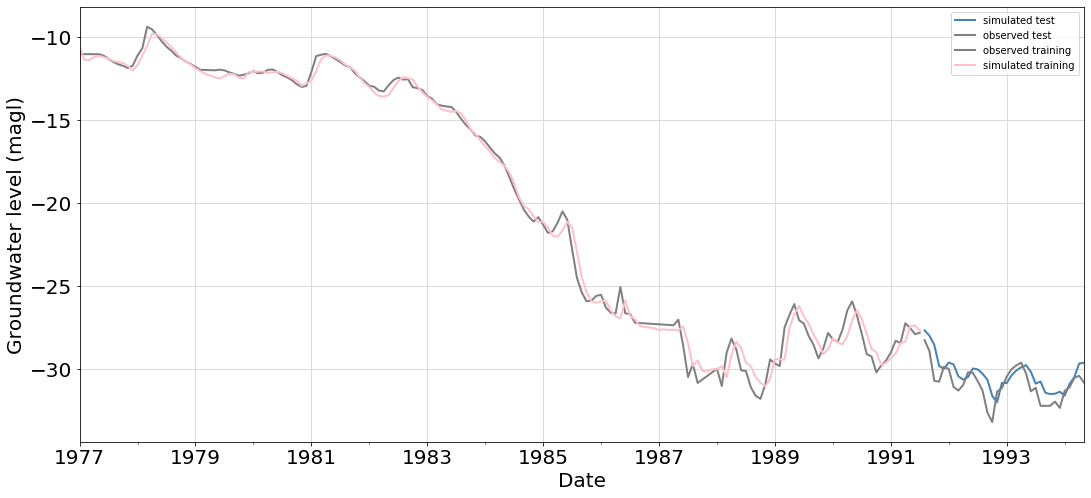

In [73]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[175:209].index)
df1['observed test']      = pima.iloc[175:209, 0].values

df2 = pd.DataFrame(pima.iloc[0:175, 0].values, columns = ['observed training'],index =pima.iloc[0:175].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [74]:
y_gru = out_df['simulated test']

### FFNN

In [75]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(34,6)

    #running function
    gwl = -0.834686
    test_forecast = X_test
    steps_ahead = 34
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)

     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(175, 6)
Train on 175 samples, validate on 34 samples
Epoch 1/1000
 96/175 [===============>..............] - ETA: 1s - loss: 1.1356 - mean_squared_error: 1.1356
Epoch 00001: val_loss improved from inf to 0.88995, saving model to model.h5
175/175 [==============================] - 7s 42ms/sample - loss: 1.0870 - mean_squared_error: 1.0870 - val_loss: 0.8899 - val_mean_squared_error: 0.8899
Epoch 2/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.8940 - mean_squared_error: 0.8940
Epoch 00002: val_loss improved from 0.88995 to 0.71373, saving model to model.h5
175/175 [==============================] - 0s 467us/sample - loss: 0.9192 - mean_squared_error: 0.9192 - val_loss: 0.7137 - val_mean_squared_error: 0.7137
Epoch 3/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.8368 - mean_squared_error: 0.8368
Epoch 00003: val_loss improved from 0.71373 to 0.55970, saving model to model.h5
175/175 [==============================] - 0s 538us/sample 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00025: val_loss did not improve from 0.01059
175/175 [==============================] - 0s 128us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 26/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00026: val_loss did not improve from 0.01059
175/175 [==============================] - 0s 135us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 27/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00027: val_loss did not improve from 0.01059
175/175 [==============================] - 0s 190us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 28/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 51/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00051: val_loss did not improve from 0.00847
175/175 [==============================] - 0s 126us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 52/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00052: val_loss did not improve from 0.00847
175/175 [==============================] - 0s 110us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 53/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00053: val_loss did not improve from 0.00847
175/175 [==============================] - 0s 130us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 54/1000
 96/175 [===============>..............] 

Epoch 77/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00077: val_loss did not improve from 0.00739
175/175 [==============================] - 0s 135us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 78/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00078: val_loss did not improve from 0.00739
175/175 [==============================] - 0s 112us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 79/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00079: val_loss did not improve from 0.00739
175/175 [==============================] - 0s 125us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 80/1000
 96/175 [===============>..............] 

Epoch 103/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00103: val_loss did not improve from 0.00739
175/175 [==============================] - 0s 111us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 104/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00104: val_loss did not improve from 0.00739
175/175 [==============================] - 0s 102us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 105/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00105: val_loss improved from 0.00739 to 0.00712, saving model to model.h5
175/175 [==============================] - 0s 270us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 106/1000
 96/175

Epoch 129/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00129: val_loss did not improve from 0.00709
175/175 [==============================] - 0s 228us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 130/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00130: val_loss did not improve from 0.00709
175/175 [==============================] - 0s 222us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 131/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00131: val_loss improved from 0.00709 to 0.00706, saving model to model.h5
175/175 [==============================] - 0s 396us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 132/1000
 96/175

Epoch 155/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00155: val_loss did not improve from 0.00706
175/175 [==============================] - 0s 108us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 156/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00156: val_loss did not improve from 0.00706
175/175 [==============================] - 0s 101us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 157/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 00157: val_loss did not improve from 0.00706
175/175 [==============================] - 0s 108us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 158/1000
 96/175 [===============>............

Epoch 181/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00181: val_loss did not improve from 0.00706
175/175 [==============================] - 0s 214us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 182/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00182: val_loss did not improve from 0.00706
175/175 [==============================] - 0s 170us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 183/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00183: val_loss did not improve from 0.00706
175/175 [==============================] - 0s 122us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 184/1000
 96/175 [===============>............

Epoch 207/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00207: val_loss did not improve from 0.00706
175/175 [==============================] - 0s 112us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 208/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00208: val_loss did not improve from 0.00706
175/175 [==============================] - 0s 108us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 209/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00209: val_loss did not improve from 0.00706
175/175 [==============================] - 0s 97us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 210/1000
 96/175 [===============>.............

Epoch 2/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.6634 - mean_squared_error: 0.6634
Epoch 00002: val_loss improved from 1.71403 to 1.55273, saving model to model.h5
175/175 [==============================] - 0s 642us/sample - loss: 0.6009 - mean_squared_error: 0.6009 - val_loss: 1.5527 - val_mean_squared_error: 1.5527
Epoch 3/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.4241 - mean_squared_error: 0.4241
Epoch 00003: val_loss improved from 1.55273 to 1.43782, saving model to model.h5
175/175 [==============================] - 0s 414us/sample - loss: 0.4691 - mean_squared_error: 0.4691 - val_loss: 1.4378 - val_mean_squared_error: 1.4378
Epoch 4/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.3636 - mean_squared_error: 0.3636
Epoch 00004: val_loss improved from 1.43782 to 1.35172, saving model to model.h5
175/175 [==============================] - 0s 372us/sample - loss: 0.3786 - mean_squared_error: 0.3786 - val_loss: 1.3517 -

Epoch 26/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00026: val_loss improved from 0.06313 to 0.05101, saving model to model.h5
175/175 [==============================] - 0s 353us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 27/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00027: val_loss improved from 0.05101 to 0.04920, saving model to model.h5
175/175 [==============================] - 0s 500us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 28/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00028: val_loss improved from 0.04920 to 0.03817, saving model to model.h5
175/175 [==============================] - 0s 550us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.038

 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00051: val_loss did not improve from 0.01700
175/175 [==============================] - 0s 208us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 52/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00052: val_loss did not improve from 0.01700
175/175 [==============================] - 0s 132us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 53/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00053: val_loss did not improve from 0.01700
175/175 [==============================] - 0s 133us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 54/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 77/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00077: val_loss did not improve from 0.01116
175/175 [==============================] - 0s 172us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 78/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00078: val_loss did not improve from 0.01116
175/175 [==============================] - 0s 150us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 79/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00079: val_loss did not improve from 0.01116
175/175 [==============================] - 0s 122us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 80/1000
 96/175 [===============>..............] 

Epoch 103/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00103: val_loss did not improve from 0.00895
175/175 [==============================] - 0s 153us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 104/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00104: val_loss did not improve from 0.00895
175/175 [==============================] - 0s 125us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 105/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00105: val_loss did not improve from 0.00895
175/175 [==============================] - 0s 148us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 106/1000
 96/175 [===============>............

Epoch 129/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00129: val_loss did not improve from 0.00895
175/175 [==============================] - 0s 126us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 130/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00130: val_loss did not improve from 0.00895
175/175 [==============================] - 0s 108us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 131/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00131: val_loss did not improve from 0.00895
175/175 [==============================] - 0s 111us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 132/1000
 96/175 [===============>............

Epoch 155/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00155: val_loss did not improve from 0.00697
175/175 [==============================] - 0s 138us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 156/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00156: val_loss did not improve from 0.00697
175/175 [==============================] - 0s 121us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 157/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00157: val_loss did not improve from 0.00697
175/175 [==============================] - 0s 120us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 158/1000
 96/175 [===============>............

Epoch 181/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00181: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 125us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 182/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00182: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 138us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 183/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00183: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 112us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 184/1000
 96/175 [===============>............

Epoch 207/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00207: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 195us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 208/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 00208: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 181us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 209/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00209: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 284us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 210/1000
 96/175 [===============>............

Epoch 233/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00233: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 120us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 234/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00234: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 137us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 235/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00235: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 190us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 236/1000
 96/175 [===============>............

Epoch 259/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00259: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 131us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 260/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 00260: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 114us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 261/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00261: val_loss did not improve from 0.00682
175/175 [==============================] - 0s 122us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 262/1000
 96/175 [===============>............

175/175 [==============================] - 0s 738us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1561 - val_mean_squared_error: 0.1561
Epoch 17/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00017: val_loss improved from 0.15609 to 0.08992, saving model to model.h5
175/175 [==============================] - 0s 544us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0899 - val_mean_squared_error: 0.0899
Epoch 18/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00018: val_loss improved from 0.08992 to 0.05739, saving model to model.h5
175/175 [==============================] - 0s 593us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0574 - val_mean_squared_error: 0.0574
Epoch 19/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00019: val_loss improved from 0.05739 to

Epoch 42/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00042: val_loss did not improve from 0.00986
175/175 [==============================] - 0s 141us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 43/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00043: val_loss did not improve from 0.00986
175/175 [==============================] - 0s 114us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 44/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00044: val_loss did not improve from 0.00986
175/175 [==============================] - 0s 124us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 45/1000
 96/175 [===============>..............] 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00068: val_loss did not improve from 0.00986
175/175 [==============================] - 0s 197us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 69/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00069: val_loss did not improve from 0.00986
175/175 [==============================] - 0s 119us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 70/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00070: val_loss did not improve from 0.00986
175/175 [==============================] - 0s 117us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 71/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 94/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00094: val_loss did not improve from 0.00686
175/175 [==============================] - 0s 117us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 95/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00095: val_loss did not improve from 0.00686
175/175 [==============================] - 0s 130us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 96/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00096: val_loss did not improve from 0.00686
175/175 [==============================] - 0s 117us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 97/1000
 96/175 [===============>..............] 

Epoch 120/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00120: val_loss did not improve from 0.00657
175/175 [==============================] - 0s 130us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 121/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00121: val_loss did not improve from 0.00657
175/175 [==============================] - 0s 133us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 122/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00122: val_loss did not improve from 0.00657
175/175 [==============================] - 0s 136us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 123/1000
 96/175 [===============>............

Epoch 146/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00146: val_loss did not improve from 0.00657
175/175 [==============================] - 0s 137us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 147/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00147: val_loss did not improve from 0.00657
175/175 [==============================] - 0s 125us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 148/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00148: val_loss did not improve from 0.00657
175/175 [==============================] - 0s 193us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 149/1000
 96/175 [===============>............

Epoch 172/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00172: val_loss did not improve from 0.00657
175/175 [==============================] - 0s 129us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 173/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00173: val_loss did not improve from 0.00657
175/175 [==============================] - 0s 125us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 174/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00174: val_loss did not improve from 0.00657
175/175 [==============================] - 0s 149us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 175/1000
 96/175 [===============>............

Epoch 198/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00198: val_loss did not improve from 0.00637
175/175 [==============================] - 0s 119us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 199/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00199: val_loss did not improve from 0.00637
175/175 [==============================] - 0s 127us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 200/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00200: val_loss did not improve from 0.00637
175/175 [==============================] - 0s 130us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 201/1000
 96/175 [===============>............

Epoch 224/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00224: val_loss did not improve from 0.00616
175/175 [==============================] - 0s 123us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 225/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00225: val_loss did not improve from 0.00616
175/175 [==============================] - 0s 124us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 226/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00226: val_loss did not improve from 0.00616
175/175 [==============================] - 0s 138us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 227/1000
 96/175 [===============>............

Epoch 250/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00250: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 127us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 251/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00251: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 131us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 252/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00252: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 127us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 253/1000
 96/175 [===============>............

Epoch 276/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00276: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 126us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 277/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00277: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 130us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 278/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00278: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 119us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 279/1000
 96/175 [===============>............

Epoch 302/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00302: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 240us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 303/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00303: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 237us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 304/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00304: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 267us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 305/1000
 96/175 [===============>............

Epoch 328/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00328: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 125us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 329/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00329: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 232us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 330/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00330: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 244us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 331/1000
 96/175 [===============>............

Epoch 19/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00019: val_loss did not improve from 0.01288
175/175 [==============================] - 0s 225us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 20/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00020: val_loss did not improve from 0.01288
175/175 [==============================] - 0s 170us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 21/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00021: val_loss did not improve from 0.01288
175/175 [==============================] - 0s 171us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0634 - val_mean_squared_error: 0.0634
Epoch 22/1000
 96/175 [===============>..............] 

Epoch 45/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00045: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 193us/sample - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 46/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00046: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 176us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 47/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00047: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 168us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 48/1000
 96/175 [===============>..............] 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00071: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 146us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 72/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00072: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 278us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 73/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00073: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 215us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 74/1000
 96/175 [===============>..............] - ETA: 0s - lo

 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00097: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 136us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 98/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00098: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 148us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 99/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00099: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 138us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 100/1000
 96/175 [===============>..............] - ETA: 0s - l

Epoch 123/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00123: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 140us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 124/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00124: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 137us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 125/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00125: val_loss did not improve from 0.00643
175/175 [==============================] - 0s 135us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 126/1000
 96/175 [===============>............

Epoch 149/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 00149: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 135us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 150/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00150: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 129us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 151/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00151: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 170us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 152/1000
 96/175 [===============>............

Epoch 175/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00175: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 192us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 176/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00176: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 146us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 177/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00177: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 165us/sample - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 178/1000
 96/175 [===============>............

Epoch 201/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00201: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 130us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 202/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00202: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 143us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 203/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00203: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 249us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0527 - val_mean_squared_error: 0.0527
Epoch 204/1000
 96/175 [===============>............

Epoch 227/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00227: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 162us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 228/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00228: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 144us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 229/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00229: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 191us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 230/1000
 96/175 [===============>............

 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00011: val_loss did not improve from 0.01590
175/175 [==============================] - 0s 150us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 12/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00012: val_loss did not improve from 0.01590
175/175 [==============================] - 0s 135us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 13/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00013: val_loss improved from 0.01590 to 0.00825, saving model to model.h5
175/175 [==============================] - 0s 521us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 14/1000
 96/175 [===============>

Epoch 37/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00037: val_loss did not improve from 0.00752
175/175 [==============================] - 0s 158us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 38/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00038: val_loss did not improve from 0.00752
175/175 [==============================] - 0s 129us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 39/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00039: val_loss did not improve from 0.00752
175/175 [==============================] - 0s 198us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 40/1000
 96/175 [===============>..............] 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00063: val_loss did not improve from 0.00752
175/175 [==============================] - 0s 201us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0594 - val_mean_squared_error: 0.0594
Epoch 64/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00064: val_loss did not improve from 0.00752
175/175 [==============================] - 0s 174us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 65/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00065: val_loss did not improve from 0.00752
175/175 [==============================] - 0s 165us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 66/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 89/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00089: val_loss did not improve from 0.00707
175/175 [==============================] - 0s 193us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 90/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00090: val_loss did not improve from 0.00707
175/175 [==============================] - 0s 166us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 91/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 00091: val_loss did not improve from 0.00707
175/175 [==============================] - 0s 168us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 92/1000
 96/175 [===============>..............] 

Epoch 115/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00115: val_loss did not improve from 0.00610
175/175 [==============================] - 0s 149us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 116/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00116: val_loss did not improve from 0.00610
175/175 [==============================] - 0s 140us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0600 - val_mean_squared_error: 0.0600
Epoch 117/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00117: val_loss did not improve from 0.00610
175/175 [==============================] - 0s 156us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 118/1000
 96/175 [===============>............

Epoch 141/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00141: val_loss did not improve from 0.00610
175/175 [==============================] - 0s 237us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 142/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00142: val_loss improved from 0.00610 to 0.00604, saving model to model.h5
175/175 [==============================] - 0s 1ms/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 143/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00143: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 266us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 144/1000
 96/175 [

Epoch 167/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00167: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 153us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 168/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00168: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 217us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 169/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00169: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 181us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 170/1000
 96/175 [===============>............

Epoch 193/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00193: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 141us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 194/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00194: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 165us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 195/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00195: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 169us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 196/1000
 96/175 [===============>............

Epoch 219/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00219: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 160us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 220/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00220: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 144us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 221/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00221: val_loss did not improve from 0.00604
175/175 [==============================] - 0s 137us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 222/1000
 96/175 [===============>............

Epoch 245/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00245: val_loss did not improve from 0.00602
175/175 [==============================] - 0s 151us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 246/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00246: val_loss did not improve from 0.00602
175/175 [==============================] - 0s 143us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 247/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 00247: val_loss did not improve from 0.00602
175/175 [==============================] - 0s 140us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 248/1000
 96/175 [===============>............

Epoch 271/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00271: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 192us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 272/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 00272: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 141us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 273/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 00273: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 149us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 274/1000
 96/175 [===============>............

Epoch 297/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00297: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 140us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 298/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00298: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 136us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 299/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00299: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 144us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 300/1000
 96/175 [===============>............

Epoch 323/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00323: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 146us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 324/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00324: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 158us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 325/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00325: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 141us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 326/1000
 96/175 [===============>............

Epoch 349/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00349: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 160us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 350/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00350: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 141us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0588 - val_mean_squared_error: 0.0588
Epoch 351/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00351: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 130us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 352/1000
 96/175 [===============>............

 96/175 [===============>..............] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 00009: val_loss improved from 0.02474 to 0.01243, saving model to model.h5
175/175 [==============================] - 0s 785us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 10/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00010: val_loss improved from 0.01243 to 0.00754, saving model to model.h5
175/175 [==============================] - 0s 789us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 11/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00011: val_loss did not improve from 0.00754
175/175 [==============================] - 0s 157us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 12/

Epoch 35/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00035: val_loss did not improve from 0.00638
175/175 [==============================] - 0s 140us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 36/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00036: val_loss did not improve from 0.00638
175/175 [==============================] - 0s 188us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 37/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00037: val_loss did not improve from 0.00638
175/175 [==============================] - 0s 196us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 38/1000
 96/175 [===============>..............] 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00061: val_loss did not improve from 0.00638
175/175 [==============================] - 0s 165us/sample - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 62/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00062: val_loss did not improve from 0.00638
175/175 [==============================] - 0s 186us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 63/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00063: val_loss did not improve from 0.00638
175/175 [==============================] - 0s 182us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 64/1000
 96/175 [===============>..............] - ETA: 0s - lo

 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00087: val_loss did not improve from 0.00638
175/175 [==============================] - 0s 187us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 88/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00088: val_loss did not improve from 0.00638
175/175 [==============================] - 0s 178us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 89/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00089: val_loss did not improve from 0.00638
175/175 [==============================] - 0s 180us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 90/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 113/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00113: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 150us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0825 - val_mean_squared_error: 0.0825
Epoch 114/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00114: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 170us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 115/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00115: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 198us/sample - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 116/1000
 96/175 [===============>............

Epoch 139/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00139: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 163us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 140/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00140: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 149us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 141/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00141: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 155us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 142/1000
 96/175 [===============>............

Epoch 165/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00165: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 176us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 166/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00166: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 314us/sample - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 167/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00167: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 277us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 168/1000
 96/175 [===============>............

Epoch 191/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00191: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 176us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 192/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00192: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 157us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 193/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00193: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 155us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 194/1000
 96/175 [===============>............

Epoch 217/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00217: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 173us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 218/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00218: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 160us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 219/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00219: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 152us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 220/1000
 96/175 [===============>............

Epoch 243/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00243: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 221us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 244/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00244: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 196us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 245/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00245: val_loss did not improve from 0.00590
175/175 [==============================] - 0s 204us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 246/1000
 96/175 [===============>............

Epoch 269/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00269: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 262us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 270/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00270: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 228us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 271/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00271: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 258us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 272/1000
 96/175 [===============>............

Epoch 295/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00295: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 162us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 296/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00296: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 167us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 297/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00297: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 161us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 298/1000
 96/175 [===============>............

Epoch 321/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00321: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 343us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 322/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00322: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 418us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 323/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00323: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 207us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 324/1000
 96/175 [===============>............

Epoch 347/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00347: val_loss did not improve from 0.00586
175/175 [==============================] - 0s 226us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 348/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00348: val_loss did not improve from 0.00586
175/175 [==============================] - 0s 196us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 349/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00349: val_loss did not improve from 0.00586
175/175 [==============================] - 0s 219us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 350/1000
 96/175 [===============>............

Epoch 373/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00373: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 207us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 374/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00374: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 172us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 375/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00375: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 235us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 376/1000
 96/175 [===============>............

Epoch 399/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 00399: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 171us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 400/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00400: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 158us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 401/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00401: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 155us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 402/1000
 96/175 [===============>............

Epoch 425/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00425: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 169us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 426/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00426: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 209us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 427/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00427: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 194us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 428/1000
 96/175 [===============>............

Epoch 451/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 00451: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 186us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0614 - val_mean_squared_error: 0.0614
Epoch 452/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00452: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 170us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 453/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00453: val_loss did not improve from 0.00582
175/175 [==============================] - 0s 164us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 454/1000
 96/175 [===============>............

175/175 [==============================] - 0s 831us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 17/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00017: val_loss improved from 0.02135 to 0.01511, saving model to model.h5
175/175 [==============================] - 0s 693us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 18/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00018: val_loss did not improve from 0.01511
175/175 [==============================] - 0s 150us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 19/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00019: val_loss improved from 0.01511 to 0.00915, saving model to mode

 96/175 [===============>..............] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00042: val_loss did not improve from 0.00614
175/175 [==============================] - 0s 271us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 43/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00043: val_loss did not improve from 0.00614
175/175 [==============================] - 0s 183us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 44/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00044: val_loss did not improve from 0.00614
175/175 [==============================] - 0s 217us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 45/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 68/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00068: val_loss did not improve from 0.00583
175/175 [==============================] - 0s 163us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 69/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00069: val_loss did not improve from 0.00583
175/175 [==============================] - 0s 169us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0804 - val_mean_squared_error: 0.0804
Epoch 70/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00070: val_loss did not improve from 0.00583
175/175 [==============================] - 0s 178us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 71/1000
 96/175 [===============>..............] 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 00094: val_loss did not improve from 0.00583
175/175 [==============================] - 0s 171us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 95/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 00095: val_loss did not improve from 0.00583
175/175 [==============================] - 0s 157us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 96/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00096: val_loss did not improve from 0.00583
175/175 [==============================] - 0s 162us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 97/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 120/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00120: val_loss did not improve from 0.00583
175/175 [==============================] - 0s 186us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 121/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00121: val_loss did not improve from 0.00583
175/175 [==============================] - 0s 213us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 122/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00122: val_loss did not improve from 0.00583
175/175 [==============================] - 0s 148us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 123/1000
 96/175 [===============>............

Running fold 8
(175, 6)
Train on 175 samples, validate on 34 samples
Epoch 1/1000
 96/175 [===============>..............] - ETA: 4s - loss: 1.0169 - mean_squared_error: 1.0169
Epoch 00001: val_loss improved from inf to 0.80893, saving model to model.h5
175/175 [==============================] - 13s 73ms/sample - loss: 0.9793 - mean_squared_error: 0.9793 - val_loss: 0.8089 - val_mean_squared_error: 0.8089
Epoch 2/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.7434 - mean_squared_error: 0.7434
Epoch 00002: val_loss improved from 0.80893 to 0.22206, saving model to model.h5
175/175 [==============================] - 0s 960us/sample - loss: 0.7735 - mean_squared_error: 0.7735 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 3/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.5911 - mean_squared_error: 0.5911
Epoch 00003: val_loss improved from 0.22206 to 0.03397, saving model to model.h5
175/175 [==============================] - 0s 955us/sample

 96/175 [===============>..............] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00026: val_loss did not improve from 0.00636
175/175 [==============================] - 0s 189us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 27/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00027: val_loss did not improve from 0.00636
175/175 [==============================] - 0s 212us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 28/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00028: val_loss did not improve from 0.00636
175/175 [==============================] - 0s 191us/sample - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 29/1000
 96/175 [===============>..............] - ETA: 0s - lo

 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00052: val_loss did not improve from 0.00636
175/175 [==============================] - 0s 217us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 53/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00053: val_loss did not improve from 0.00636
175/175 [==============================] - 0s 180us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 54/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00054: val_loss did not improve from 0.00636
175/175 [==============================] - 0s 190us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 55/1000
 96/175 [===============>..............] - ETA: 0s - lo

 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00078: val_loss did not improve from 0.00636
175/175 [==============================] - 0s 174us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 79/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00079: val_loss did not improve from 0.00636
175/175 [==============================] - 0s 179us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 80/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00080: val_loss did not improve from 0.00636
175/175 [==============================] - 0s 248us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 81/1000
 96/175 [===============>..............] - ETA: 0s - lo

Epoch 104/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00104: val_loss did not improve from 0.00618
175/175 [==============================] - 0s 243us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 105/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00105: val_loss did not improve from 0.00618
175/175 [==============================] - 0s 236us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 106/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00106: val_loss did not improve from 0.00618
175/175 [==============================] - 0s 227us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 107/1000
 96/175 [===============>............

Epoch 130/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00130: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 173us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 131/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00131: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 175us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0861 - val_mean_squared_error: 0.0861
Epoch 132/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00132: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 196us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0618 - val_mean_squared_error: 0.0618
Epoch 133/1000
 96/175 [===============>............

Epoch 156/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00156: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 218us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0858 - val_mean_squared_error: 0.0858
Epoch 157/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00157: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 199us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 158/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00158: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 257us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 159/1000
 96/175 [===============>............

Epoch 182/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00182: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 348us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 183/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00183: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 202us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 184/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00184: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 180us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 185/1000
 96/175 [===============>............

Epoch 208/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00208: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 213us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 209/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00209: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 161us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 210/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00210: val_loss did not improve from 0.00601
175/175 [==============================] - 0s 209us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 211/1000
 96/175 [===============>............

Epoch 234/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00234: val_loss did not improve from 0.00595
175/175 [==============================] - 0s 224us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 235/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00235: val_loss did not improve from 0.00595
175/175 [==============================] - 0s 180us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0654 - val_mean_squared_error: 0.0654
Epoch 236/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00236: val_loss did not improve from 0.00595
175/175 [==============================] - 0s 169us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 237/1000
 96/175 [===============>............

Epoch 260/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00260: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 232us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 261/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00261: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 182us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 262/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00262: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 170us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 263/1000
 96/175 [===============>............

Epoch 286/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00286: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 180us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 287/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00287: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 216us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 288/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00288: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 196us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 289/1000
 96/175 [===============>............

Epoch 312/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00312: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 243us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 313/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00313: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 258us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 314/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00314: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 330us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 315/1000
 96/175 [===============>............

Epoch 338/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00338: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 214us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 339/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00339: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 186us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 340/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00340: val_loss did not improve from 0.00589
175/175 [==============================] - 0s 180us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 341/1000
 96/175 [===============>............

 96/175 [===============>..............] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00021: val_loss improved from 0.00716 to 0.00676, saving model to model.h5
175/175 [==============================] - 0s 961us/sample - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 22/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00022: val_loss did not improve from 0.00676
175/175 [==============================] - 0s 171us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 23/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00023: val_loss did not improve from 0.00676
175/175 [==============================] - 0s 246us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 24/1000
 96/175 [===============>

Epoch 47/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00047: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 197us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 48/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00048: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 180us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 49/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00049: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 180us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 50/1000
 96/175 [===============>..............] 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00073: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 242us/sample - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 74/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00074: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 195us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 75/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00075: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 225us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 76/1000
 96/175 [===============>..............] - ETA: 0s - lo

 96/175 [===============>..............] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00099: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 207us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 100/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00100: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 392us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 101/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00101: val_loss did not improve from 0.00596
175/175 [==============================] - 0s 342us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 102/1000
 96/175 [===============>..............] - ETA: 0s -

Epoch 125/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00125: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 178us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 126/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00126: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 192us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 127/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00127: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 248us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 128/1000
 96/175 [===============>............

Epoch 151/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 00151: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 219us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 152/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00152: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 176us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.1536 - val_mean_squared_error: 0.1536
Epoch 153/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00153: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 204us/sample - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 154/1000
 96/175 [===============>............

Epoch 177/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00177: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 190us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0704 - val_mean_squared_error: 0.0704
Epoch 178/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00178: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 179us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 179/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00179: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 179us/sample - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 180/1000
 96/175 [===============>............

Epoch 203/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 00203: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 182us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 204/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00204: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 185us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 205/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00205: val_loss did not improve from 0.00592
175/175 [==============================] - 0s 217us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 206/1000
 96/175 [===============>............

 96/175 [===============>..............] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00021: val_loss did not improve from 0.00922
175/175 [==============================] - 0s 200us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 22/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00022: val_loss improved from 0.00922 to 0.00598, saving model to model.h5
175/175 [==============================] - 0s 1ms/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 23/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00023: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 216us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 24/1000
 96/175 [===============>..

Epoch 47/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00047: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 272us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 48/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00048: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 249us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0777 - val_mean_squared_error: 0.0777
Epoch 49/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00049: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 202us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0692 - val_mean_squared_error: 0.0692
Epoch 50/1000
 96/175 [===============>..............] 

 96/175 [===============>..............] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00073: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 208us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 74/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00074: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 241us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 75/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00075: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 264us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 76/1000
 96/175 [===============>..............] - ETA: 0s - lo

 96/175 [===============>..............] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00099: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 218us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 100/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00100: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 199us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 101/1000
 96/175 [===============>..............] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00101: val_loss did not improve from 0.00598
175/175 [==============================] - 0s 211us/sample - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 102/1000
 96/175 [===============>..............] - ETA: 0s -

In [76]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.017    0.132 -0.084   0.110
1   Iteration_2   0.014    0.117  0.146   0.096
2   Iteration_3   0.007    0.082  0.576   0.067
3   Iteration_4   0.011    0.106  0.292   0.088
4   Iteration_5   0.017    0.132 -0.091   0.112
5   Iteration_6   0.026    0.161 -0.619   0.143
6   Iteration_7   0.044    0.210 -1.766   0.196
7   Iteration_8   0.013    0.115  0.176   0.094
8   Iteration_9   0.008    0.091  0.481   0.074
9  Iteration_10   0.014    0.118  0.128   0.097

In [77]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[175:209, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      1.240919    1.272896    1.275881    1.157147    1.201936    1.289193   
1      1.223968    1.276935    1.277458    1.157832    1.204657    1.292316   
2      1.217882    1.280482    1.295242    1.180025    1.235130    1.332871   
3      1.246582    1.279510    1.287989    1.176663    1.212262    1.315864   
4      1.257685    1.293692    1.302814    1.189698    1.225903    1.332069   
..          ...         ...         ...         ...         ...         ...   
170   -0.822799   -0.852872   -0.898930   -0.850961   -0.809232   -0.771558   
171   -0.833802   -0.873290   -0.932342   -0.885538   -0.845655   -0.813072   
172   -0.716205   -0.743191   -0.779773   -0.743284   -0.706102   -0.673060   
173   -0.739455   -0.777111   -0.830441   -0.795517   -0.762082   -0.735996   
174   -0.771044   -0.812456   -0.871159   -0.832765   -0.797523   -0.770793   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.345674    1.347860    1.295316  1.269647  0.058741  1.328387   
1      1.343139    1.352746    1.298999  1.269783  0.060193  1.329976   
2      1.390601    1.401084    1.348495  1.297979  0.072703  1.370682   
3      1.383427    1.366251    1.314390  1.286993  0.063782  1.350775   
4      1.402408    1.382299    1.330008  1.301842  0.065535  1.367377   
..          ...         ...         ...       ...       ...       ...   
170   -0.727957   -0.866998   -0.834952 -0.826251  0.048640 -0.777611   
171   -0.762108   -0.910581   -0.874964 -0.859039  0.048892 -0.810148   
172   -0.635618   -0.757183   -0.736518 -0.721215  0.041934 -0.679281   
173   -0.688695   -0.824187   -0.800187 -0.772630  0.043337 -0.729293   
174   -0.720312   -0.862552   -0.834380 -0.808109  0.045757 -0.762353   

          Min  
0    1.210906  
1    1.209590  
2    1.225277  
3    1.223211  
4    1.236306  
..        ...  
170 -0.874891  
171 -0.907931  
172 -0.763149  
173 -0.815967  
174 -0.853866  

[175 rows x 13 columns]

In [78]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[175:209, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -0.757492   -0.795514   -0.846863   -0.808269   -0.771231   -0.741790   
1    -0.810647   -0.850425   -0.901523   -0.867436   -0.839070   -0.819735   
2    -0.867560   -0.909883   -0.966741   -0.926098   -0.893500   -0.868739   
3    -1.010880   -1.048092   -1.116317   -1.080661   -1.051398   -1.023155   
4    -0.998967   -1.030554   -1.084491   -1.043251   -1.009229   -0.976444   
5    -0.960385   -0.989818   -1.030843   -0.983715   -0.947888   -0.917925   
6    -0.982416   -1.009114   -1.056624   -1.012084   -0.978300   -0.947248   
7    -1.066153   -1.080525   -1.138939   -1.095694   -1.064997   -1.030324   
8    -1.071991   -1.081718   -1.133186   -1.087381   -1.054385   -1.016897   
9    -1.043137   -1.052478   -1.096507   -1.049060   -1.014426   -0.976389   
10   -0.981959   -0.998797   -1.034588   -0.986048   -0.949659   -0.914508   
11   -1.013398   -1.034449   -1.084962   -1.040475   -1.006565   -0.974092   
12   -1.058667   -1.082500   -1.144181   -1.101797   -1.067892   -1.036190   
13   -1.101463   -1.120967   -1.187839   -1.146037   -1.113142   -1.079975   
14   -1.214027   -1.218224   -1.301483   -1.262351   -1.233473   -1.197278   
15   -1.248519   -1.250982   -1.336318   -1.296937   -1.267222   -1.230355   
16   -1.094461   -1.114620   -1.168858   -1.122346   -1.082480   -1.046326   
17   -1.120652   -1.131852   -1.195295   -1.151327   -1.115078   -1.078144   
18   -1.058439   -1.075630   -1.123695   -1.075821   -1.034804   -0.998026   
19   -1.028967   -1.048252   -1.094693   -1.047419   -1.007463   -0.972106   
20   -1.009780   -1.031395   -1.075853   -1.028405   -0.988320   -0.953706   
21   -0.995224   -1.018157   -1.060870   -1.013327   -0.973528   -0.939499   
22   -1.052378   -1.071143   -1.127002   -1.082417   -1.045541   -1.011121   
23   -1.127102   -1.135237   -1.199454   -1.155756   -1.122354   -1.085084   
24   -1.081376   -1.087422   -1.133883   -1.085616   -1.049365   -1.009799   
25   -1.175271   -1.176078   -1.249009   -1.207634   -1.178885   -1.141006   
26   -1.182869   -1.185899   -1.254622   -1.210792   -1.176750   -1.137663   
27   -1.178457   -1.183002   -1.252625   -1.209653   -1.177161   -1.139285   
28   -1.157726   -1.160178   -1.222021   -1.176716   -1.142557   -1.102600   
29   -1.193934   -1.189950   -1.257730   -1.212715   -1.181415   -1.141836   
30   -1.101408   -1.109263   -1.158670   -1.110059   -1.073200   -1.035522   
31   -1.065194   -1.085278   -1.142966   -1.098846   -1.067570   -1.036564   
32   -0.975824   -1.014983   -1.066452   -1.021867   -0.989960   -0.964332   
33   -0.985876   -1.021779   -1.076866   -1.033390   -1.002290   -0.975827   

    Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0    -0.695417   -0.831734   -0.805865 -0.783797  0.044627 -0.739171   
1    -0.775022   -0.889427   -0.864176 -0.846385  0.037716 -0.808669   
2    -0.820912   -0.949600   -0.916460 -0.902166  0.042490 -0.859676   
3    -0.963216   -1.117435   -1.076622 -1.054198  0.047403 -1.006794   
4    -0.928093   -1.062930   -1.025230 -1.017688  0.044141 -0.973547   
5    -0.873302   -0.996993   -0.961446 -0.962479  0.043741 -0.918739   
6    -0.898316   -1.031512   -0.994577 -0.990021  0.044051 -0.945971   
7    -0.973971   -1.124146   -1.081802 -1.072950  0.046370 -1.026580   
8    -0.965783   -1.107949   -1.066906 -1.065133  0.046663 -1.018469   
9    -0.929657   -1.063342   -1.024441 -1.027715  0.046839 -0.980876   
10   -0.872337   -0.994431   -0.958528 -0.965650  0.045936 -0.919715   
11   -0.922835   -1.062042   -1.023376 -1.018021  0.045172 -0.972850   
12   -0.978918   -1.129537   -1.087995 -1.076409  0.046834 -1.029575   
13   -1.019383   -1.178165   -1.134278 -1.120139  0.048286 -1.071852   
14   -1.124172   -1.311242   -1.260101 -1.235817  0.053784 -1.182033   
15   -1.157357   -1.346146   -1.294231 -1.269785  0.054365 -1.215421   
16   -0.997033   -1.136010   -1.095819 -1.095328 

In [79]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:175]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[175:209]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.006
Root mean squared error is: 0.074
Mean absolute error is: 0.056
R^2 score is:  0.994

The model performance for the test set
--------------------------------------
R^2 score is:  -0.076
Mean squared error is: 0.017
Root mean squared error is: 0.126
Mean absolute error is: 0.108
Stdv    0.012
dtype: float32


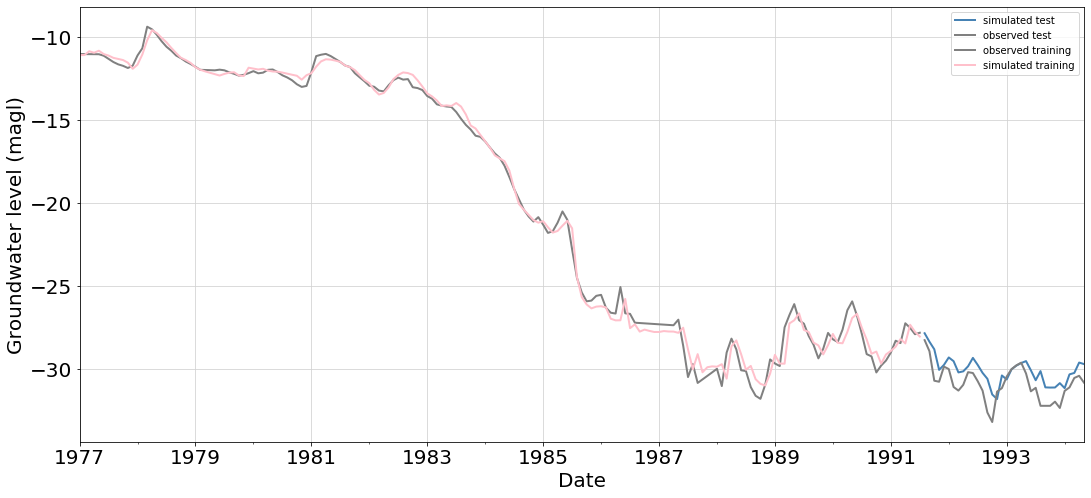

In [80]:
mse_ff = summary['mse_ff'].mean(axis=0)
rmse_ff= summary['rmse_ff'].mean(axis=0)
mae_ff = summary['mae_ff'].mean(axis=0)
r2_ff  = summary['r2_ff'].mean(axis=0)
stdv_ff= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[175:209].index)
df1['observed test']      = pima.iloc[175:209, 0].values

df2 = pd.DataFrame(pima.iloc[0:175, 0].values, columns = ['observed training'],index =pima.iloc[0:175].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [81]:
y_ff = out_df['simulated test']

## Static Models

In [82]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0112']]

In [83]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0112'].values
y = y.reshape(-1,1)

In [84]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(175, 6) (175, 1)
(34, 6) (34, 1)


In [85]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [86]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(175, 6)
Running fold 2
(175, 6)
Running fold 3
(175, 6)
Running fold 4
(175, 6)
Running fold 5
(175, 6)
Running fold 6
(175, 6)
Running fold 7
(175, 6)
Running fold 8
(175, 6)
Running fold 9
(175, 6)
Running fold 10
(175, 6)


In [87]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   6.085    2.467 -4.708   1.546
1   Iteration_2   6.208    2.492 -4.824   1.615
2   Iteration_3   5.551    2.356 -4.208   1.624
3   Iteration_4   5.586    2.363 -4.240   1.633
4   Iteration_5   6.836    2.615 -5.413   1.702
5   Iteration_6   5.432    2.331 -4.096   1.557
6   Iteration_7   5.643    2.375 -4.294   1.660
7   Iteration_8   5.554    2.357 -4.210   1.610
8   Iteration_9   5.387    2.321 -4.054   1.600
9  Iteration_10   6.276    2.505 -4.887   1.707

In [88]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[175:209, 6].values

In [89]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[175:209, 6].values

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  -4.493
Mean squared error is: 5.856
Root mean squared error is: 2.418
Mean absolute error is: 1.625


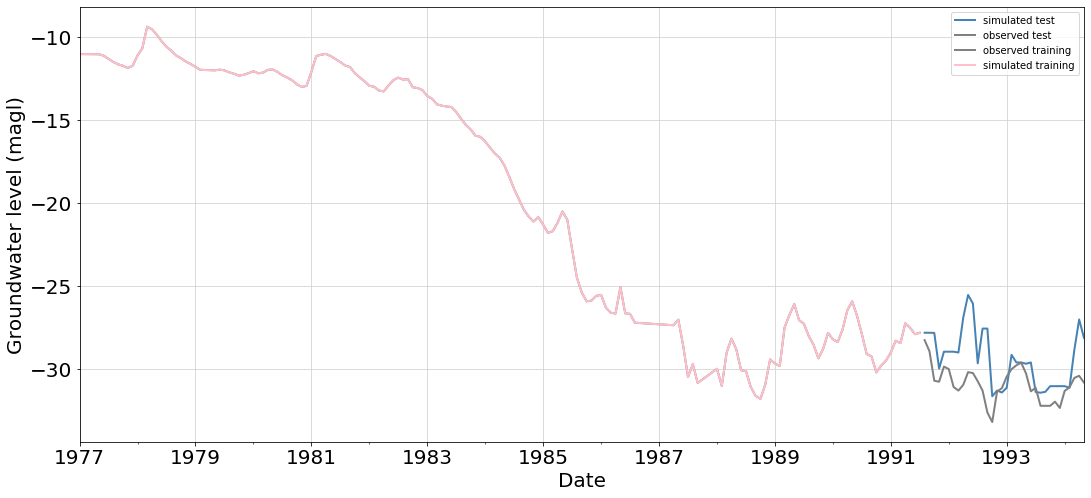

In [90]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[175:209].index)
df1['observed test']      = pima.iloc[175:209, 0].values

df2 = pd.DataFrame(pima.iloc[0:175, 0].values, columns = ['observed training'],index =pima.iloc[0:175].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [91]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(175, 6)
Running fold 2
(175, 6)
Running fold 3
(175, 6)
Running fold 4
(175, 6)
Running fold 5
(175, 6)
Running fold 6
(175, 6)
Running fold 7
(175, 6)
Running fold 8
(175, 6)
Running fold 9
(175, 6)
Running fold 10
(175, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [92]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1   15.997       4.0 -14.008    3.051
1   Iteration_2   15.997       4.0 -14.008    3.051
2   Iteration_3   15.997       4.0 -14.008    3.051
3   Iteration_4   15.997       4.0 -14.008    3.051
4   Iteration_5   15.997       4.0 -14.008    3.051
5   Iteration_6   15.997       4.0 -14.008    3.051
6   Iteration_7   15.997       4.0 -14.008    3.051
7   Iteration_8   15.997       4.0 -14.008    3.051
8   Iteration_9   15.997       4.0 -14.008    3.051
9  Iteration_10   15.997       4.0 -14.008    3.051

In [93]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[175:209, 6].values

In [94]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 2.189
Root mean squared error is: 1.48
Mean absolute error is: 0.687
R^2 score is:  0.963

The model performance for the test set
--------------------------------------
R^2 score is:  -14.008
Mean squared error is: 15.997
Root mean squared error is: 4.0
Mean absolute error is: 3.051


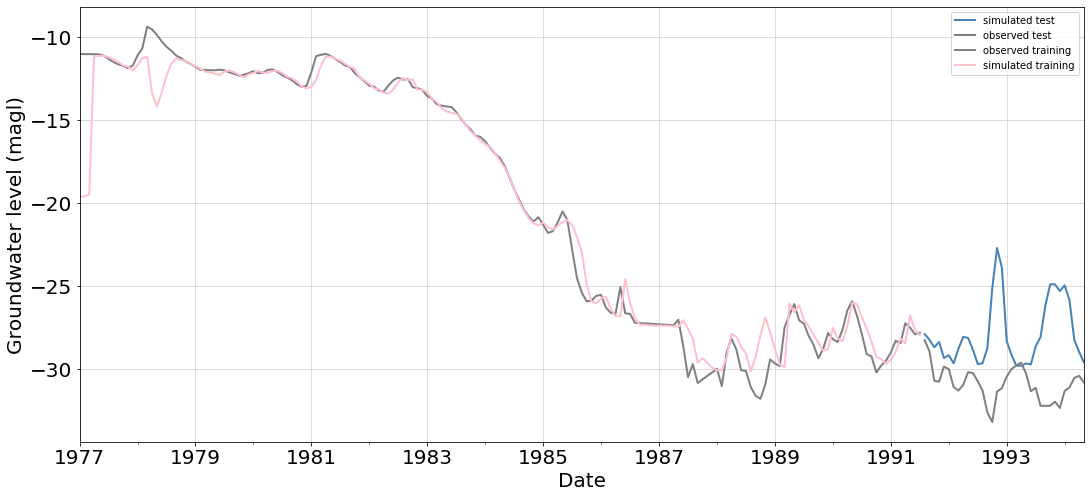

In [95]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[175:209].index)
df1['observed test']      = pima.iloc[175:209, 0].values

df2 = pd.DataFrame(pima.iloc[0:175, 0].values, columns = ['observed training'],index =pima.iloc[0:175].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(175, 6)
Running fold 2
(175, 6)
Running fold 3
(175, 6)
Running fold 4
(175, 6)
Running fold 5
(175, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 6
(175, 6)
Running fold 7
(175, 6)
Running fold 8
(175, 6)
Running fold 9
(175, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 10
(175, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [97]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   2.709    1.646 -1.541   1.404
1   Iteration_2   2.649    1.627 -1.485   1.379
2   Iteration_3   2.902    1.703 -1.722   1.448
3   Iteration_4   2.785    1.669 -1.613   1.432
4   Iteration_5   2.660    1.631 -1.496   1.387
5   Iteration_6   2.882    1.698 -1.704   1.446
6   Iteration_7   2.859    1.691 -1.682   1.444
7   Iteration_8   2.425    1.557 -1.275   1.298
8   Iteration_9   2.965    1.722 -1.782   1.477
9  Iteration_10   2.675    1.635 -1.509   1.381

In [98]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[175:209, 6].values

In [99]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.023
Root mean squared error is: 0.151
Mean absolute error is: 0.112
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  -1.581
Mean squared error is: 2.751
Root mean squared error is: 1.658
Mean absolute error is: 1.41


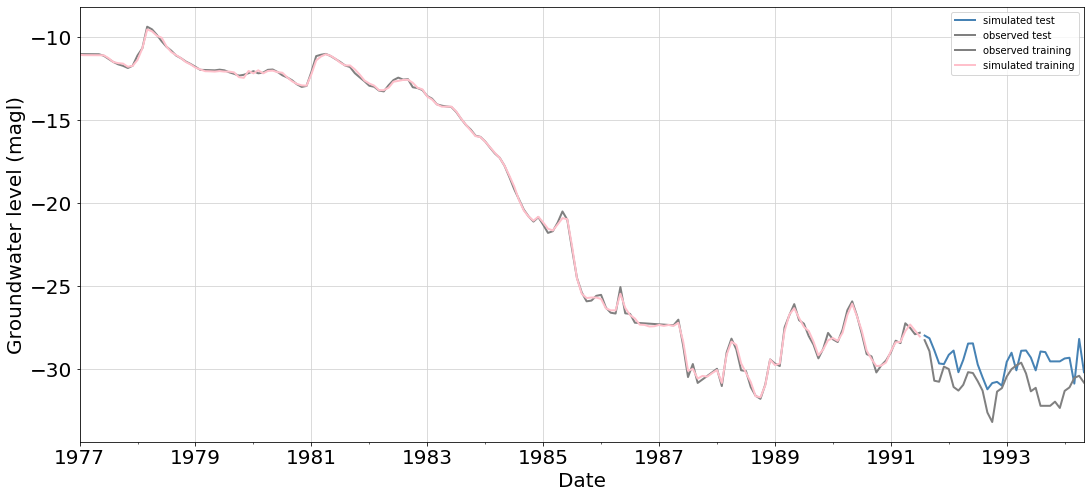

In [100]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[175:209].index)
df1['observed test']      = pima.iloc[175:209, 0].values

df2 = pd.DataFrame(pima.iloc[0:175, 0].values, columns = ['observed training'],index =pima.iloc[0:175].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(175, 6)
Running fold 2
(175, 6)
Running fold 3
(175, 6)
Running fold 4
(175, 6)
Running fold 5
(175, 6)
Running fold 6
(175, 6)
Running fold 7
(175, 6)
Running fold 8
(175, 6)
Running fold 9
(175, 6)
Running fold 10
(175, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

In [102]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   3.605    1.899 -2.382   1.614
1   Iteration_2   1.470    1.212 -0.379   1.012
2   Iteration_3   1.793    1.339 -0.682   1.059
3   Iteration_4   2.544    1.595 -1.387   1.321
4   Iteration_5   2.999    1.732 -1.813   1.400
5   Iteration_6   1.951    1.397 -0.831   1.140
6   Iteration_7   2.924    1.710 -1.743   1.293
7   Iteration_8   2.993    1.730 -1.808   1.424
8   Iteration_9   2.917    1.708 -1.736   1.390
9  Iteration_10   3.039    1.743 -1.851   1.435

In [103]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[175:209, 6].values

In [104]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.023
Root mean squared error is: 0.151
Mean absolute error is: 0.112
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  -1.461
Mean squared error is: 2.624
Root mean squared error is: 1.607
Mean absolute error is: 1.309


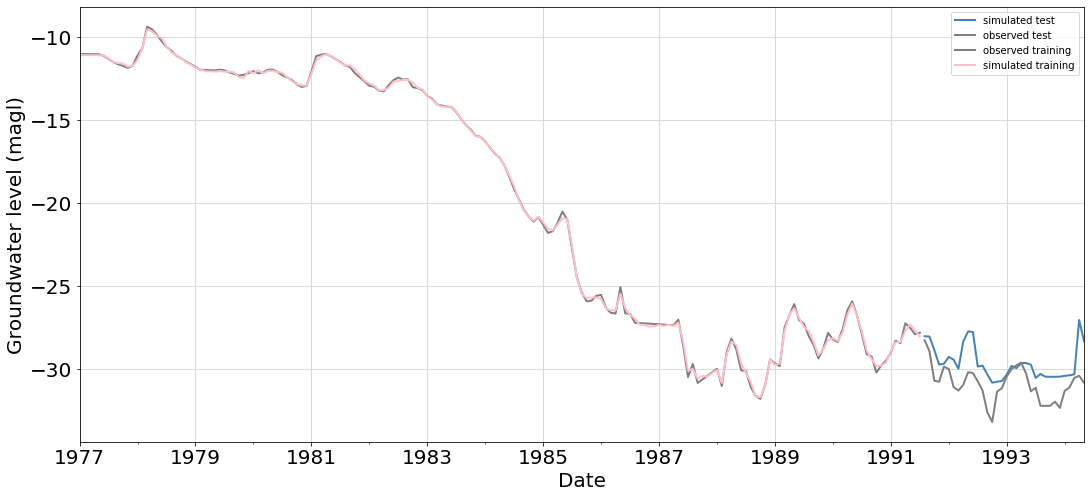

In [105]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[175:209].index)
df1['observed test']      = pima.iloc[175:209, 0].values

df2 = pd.DataFrame(pima.iloc[0:175, 0].values, columns = ['observed training'],index =pima.iloc[0:175].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [106]:
vs = pd.DataFrame(pima.iloc[175:209, 0].values, columns = ['Observed'],index =pima.iloc[175:209].index)
vs['FFNN'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

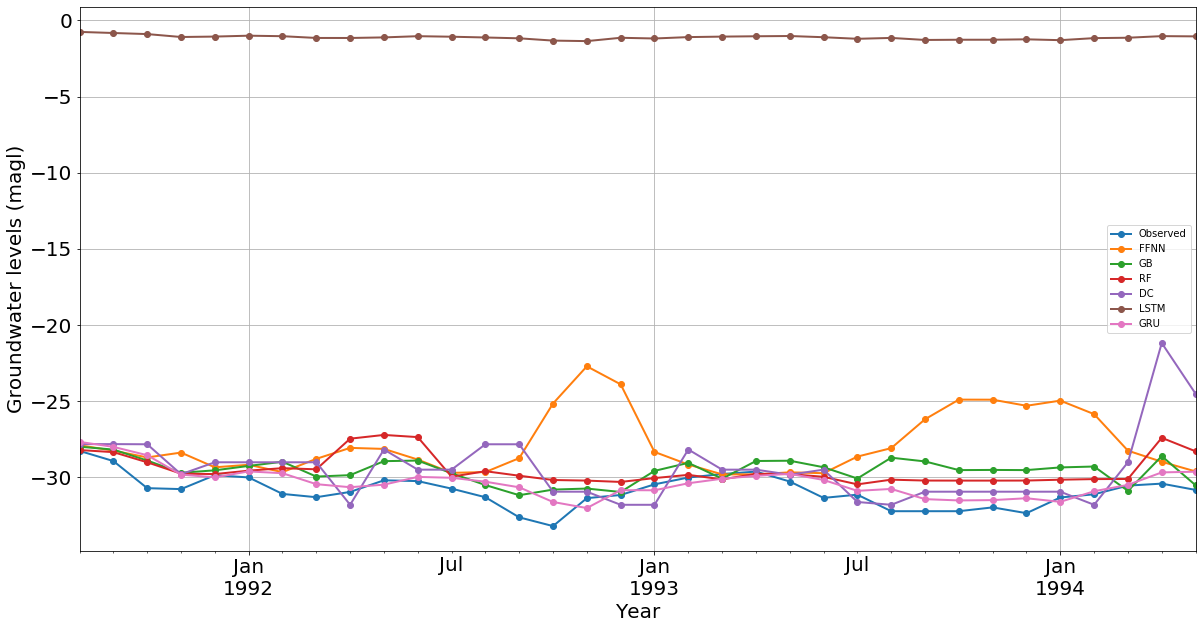

In [107]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)